[![Vehicle Detection & Tracking - Self-Driving Car NanoDegree](https://s3.amazonaws.com/udacity-sdc/github/shield-carnd.svg)](http://www.udacity.com/drive)
## Dean Webb - Vehicle Detection & Tracking  Pipeline
#### Self-Driving Car Engineer Nanodegee - Project 5
In this project, my goal is to write a software pipeline to extract features from a Dataset and identify the lane boundaries within an input video. In this project, my ultimate goal was to write a software pipeline that starts with ***minimal scaling parameters*** (e.g. a linear combination of various scaled windows) and automatically extract bounding boxes from the images. The implementation would ideally detect vehicles in a video (start with the test_video.mp4 and later implement on full project_video.mp4). Suprrisingly, I was able to install and configure the YOLO library ("You only look once") To detect vehicles! It is not optimized yet (I'm currentl loading the weights for each frame, but it was a fun project! I implemented tracking using Sliding Windows, Hog subsampling, Frame smoothing and now YOLO. I hope my submission is enough to meet the project requirements. The project goals are listed in detail below.

---

![alt text][image8]

---

### <font color='green'>Project Goals</font>

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

---

### Dependencies

Here are links to the labeled data for [vehicle](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip) and [non-vehicle](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip) examples to train your classifier.  These example images come from a combination of the [GTI vehicle image database](http://www.gti.ssr.upm.es/data/Vehicle_database.html), the [KITTI vision benchmark suite](http://www.cvlibs.net/datasets/kitti/), and examples extracted from the project video itself.   You are welcome and encouraged to take advantage of the recently released [Udacity labeled dataset](https://github.com/udacity/self-driving-car/tree/master/annotations) to augment your training data.  

Some example images for testing your pipeline on single frames are located in the `test_images` folder.  To help the reviewer examine your work, please save examples of the output from each stage of your pipeline in the folder called `ouput_images`, and include them in your writeup for the project by describing what each image shows.    The video called `project_video.mp4` is the video your pipeline should work well on. 

---

[//]: # (Image References)
[image1]: ./examples/car_not_car.png
[image2]: ./examples/HOG_example.jpg
[image3]: ./examples/sliding_windows.jpg
[image4]: ./examples/sliding_window.jpg
[image5]: ./examples/bboxes_and_heat.png
[image6]: ./examples/labels_map.png
[image7]: ./examples/output_bboxes.png
[image8]: examples/yolo_predicts.jpg
[video1]: output_images/project_output_yolo.mp4
[video1]: output_images/test_output_yolo.mp4


## <font color='red'> Rubric Points</font>
### Here I will consider the [rubric](https://review.udacity.com/#!/rubrics/513/view) points individually and describe how I addressed each point in my implementation below!

---
### Writeup / README

#### 1. <font color='green'>Provide a Writeup / README</font> that includes all the rubric points and how you addressed each one.  You can submit your writeup as markdown or pdf.

**Done!** - *See below.*


### Histogram of Oriented Gradients (HOG)


#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained in the first code cell of the IPython notebook (or in lines # through # of the file called `some_file.py`).  

I started by reading in all the `vehicle` and `non-vehicle` images.  Here is an example of one of each of the `vehicle` and `non-vehicle` classes:

![alt text][image1]

I then explored different color spaces and different `skimage.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).  I grabbed random images from each of the two classes and displayed them to get a feel for what the `skimage.hog()` output looks like.

Here is an example using the `YCrCb` color space and HOG parameters of `orientations=8`, `pixels_per_cell=(8, 8)` and `cells_per_block=(2, 2)`:


![alt text][image2]

#### 2. Explain how you settled on your final choice of HOG parameters.

I tried various combinations of parameters and...

#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

I trained a linear SVM using...

### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

I decided to search random window positions at random scales all over the image and came up with this (ok just kidding I didn't actually ;):

![alt text][image3]

#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

Ultimately I searched on two scales using YCrCb 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result.  Here are some example images:

![alt text][image4]
---

### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)
Here's a [link to my video result](./project_video.mp4)


#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

I recorded the positions of positive detections in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Here's an example result showing the heatmap from a series of frames of video, the result of `scipy.ndimage.measurements.label()` and the bounding boxes then overlaid on the last frame of video:

### Here are six frames and their corresponding heatmaps:

![alt text][image5]

### Here is the output of `scipy.ndimage.measurements.label()` on the integrated heatmap from all six frames:
![alt text][image6]

### Here the resulting bounding boxes are drawn onto the last frame in the series:
![alt text][image7]



---

### Discussion / Learnings / Shortcomings

####1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.  


##  Load Dataset and Preproceses Images

### Imports

In [2]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from PIL import Image
import time
import os
import zipfile as zf
import tarfile
import csv
import pickle
import urllib
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd

### Constants

In [3]:
## Dataset Parameters ##
TRAINING_DATASET_DIRECTORY = 'training_set/'
PIPELINE_SETUP_DIRECTORY = 'pipeline_setup_images/'
WORKING_DIRECTORY = 'data/'
NON_VEHICLES_TOKEN = 'non-vehicles'
dataset_path = "{}{}{}{}".format(WORKING_DIRECTORY, TRAINING_DATASET_DIRECTORY,'**/', '*.png')
DATACACHE_DIRECTORY = os.path.join(WORKING_DIRECTORY, 'datacache/')
PROJECT_SOURCE_URL = 'https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking'
VEHICLES_ZIPFILE = 'vehicles.zip'
NONVEHICLES_ZIPFILE = 'non-vehicles.zip'


## Udacity Dataset Extraction Parameters ##
LABELS_CSV = 'data/object-detection-crowdai/labels.csv'
UDACITY_SOURCE_URL = 'http://bit.ly/udacity-annoations-crowdai'
DATASET_ZIPFILE = 'object-detection-crowdai.tar.gz'
UDACITY_DATASET_DIRECTORY = 'udacity-set'
APPEND_UDACITY_DATASET = False
UDACITY_AUGMENT_PCT = 0.05

## Image Processing ##
DEFAULT_LENGTH, DEFAULT_WIDTH, DEFAULT_DEPTH = (64, 64, 3)
if DEFAULT_DEPTH > 1:
    DEFAULT_RESOLUTION = (DEFAULT_LENGTH, DEFAULT_WIDTH, DEFAULT_DEPTH)
else:
    DEFAULT_RESOLUTION = (DEFAULT_LENGTH, DEFAULT_WIDTH)

## Feature Extraction Parameters ##
# Spatial Binning
SPATIAL = 32
BIN_SPATIAL_SIZE = (SPATIAL, SPATIAL)
# Color Histogram
HIST_NBINS = 128
COLOR_SPACE = 'HSV'
# HOG Parameters
HOG_ORIENTATIONS = 9
HOG_PIXELS_PER_CELL = 8
HOG_CELLS_PER_BLOCK = 2
HOG_CHANNEL = 'ALL' # Can be 0, 1, 2, or "ALL"
SW_SPATIAL_FEAT_FLAG = True
SW_HOG_FEAT_FLAG = True
SW_COLOR_HIST_FEAT_FLAG = True

## Training Parameters ##
# SVC Parameters
VALIDATION_PORTION = .2
N_PREDICTIONS = 100
OVERWRITE_DATACACHE = True

### Helper Functions - Udacity Dataset Loading & Augmentation

In [4]:
# Define a function to scale .PNG and JPEG Files both to 0 to 1 
def normalize_pixels(img):
    max_pixel_value = np.max(img)
    if max_pixel_value > 1.0:
        img = np.copy(np.multiply(img, 1.0 / 255.0)).astype(np.float64) 
    return img

# Define a function to scale .PNG and JPEG Files both to 0 to 1 
def denormalize_pixels(img):
    max_pixel_value = np.max(img)
    if max_pixel_value <= 1.0:
        img = np.copy(np.multiply(img, 255.0)).astype(np.float64) 
    return img

In [5]:
def maybe_download(source_url, filename):
    if not os.path.exists(WORKING_DIRECTORY):
        os.mkdir(WORKING_DIRECTORY)
    
    filepath = os.path.join(WORKING_DIRECTORY, filename)
    if not os.path.exists(filepath):
        filepath, _ = urllib.request.urlretrieve(source_url, filepath)
        statinfo = os.stat(filepath)
        print('')
        print('Succesfully downloaded:', filepath, '| % d MB.' % int(statinfo.st_size*1e-6))
    return filepath

In [6]:
def unzip_file(zip_file, source_dir_name=None, destination=WORKING_DIRECTORY):
    if 'tar.gz' in zip_file:
        head, tail = os.path.splitext(zip_file)
        if not os.path.exists(os.path.join(os.path.splitext(head)[0])):
            print('unzipping file:', zip_file, 'to directory:', os.path.join( os.path.splitext(head)[0]))
            tar = tarfile.open(zip_file, "r:*")
            tar.extractall(destination)
            tar.close()
    else: #.zip extension
        head, tail = os.path.splitext(zip_file)
        #print('Target Dir', os.path.join(destination, head))
        if not os.path.exists(os.path.join(destination, head)):
            print('File does not exist: ', os.path.join(destination, head), ': Extracting')
            zipf = zf.ZipFile(os.path.join(WORKING_DIRECTORY,zip_file))
            print('Loaded zipf',zipf, ': Extracting')
            zipf.extractall(os.path.join(destination, head))
            zipf.close()

In [ ]:
## __main()__ method:
## Download and Extract Training Datasets
## Create Training Set Directories to Project Datasets
## Gather more extreriance pulling and building from source and extracting augmentation features

In [7]:
vehicles_zipfile = maybe_download(os.path.join(PROJECT_SOURCE_URL,VEHICLES_ZIPFILE), VEHICLES_ZIPFILE)
source_dir_name, fname = os.path.split(vehicles_zipfile)
unzip_file(fname, source_dir_name=source_dir_name, destination=os.path.join(WORKING_DIRECTORY, TRAINING_DATASET_DIRECTORY))

non_vehicles_zipfile = maybe_download(os.path.join(PROJECT_SOURCE_URL,NONVEHICLES_ZIPFILE), NONVEHICLES_ZIPFILE)
source_dir_name, fname = os.path.split(non_vehicles_zipfile)
unzip_file(fname, source_dir_name=source_dir_name, destination=os.path.join(WORKING_DIRECTORY, TRAINING_DATASET_DIRECTORY))

## Udacity Dataset
tar_file = maybe_download(UDACITY_SOURCE_URL, DATASET_ZIPFILE)
unzip_file(tar_file)

cars_dir = os.path.join(WORKING_DIRECTORY, TRAINING_DATASET_DIRECTORY, 
                         'vehicles', UDACITY_DATASET_DIRECTORY)
os.makedirs(cars_dir, exist_ok=True)
noncars_dir = os.path.join(WORKING_DIRECTORY, TRAINING_DATASET_DIRECTORY, 
                         'non-vehicles', UDACITY_DATASET_DIRECTORY)
os.makedirs(os.path.join(noncars_dir, 'skies'), exist_ok=True)
os.makedirs(os.path.join(noncars_dir, 'roads'), exist_ok=True)

In [ ]:
## Extract Labels ##
HEADER_ROW=['xstart', 'ystart', 'xstop', 'ystop', 'frame', 'label', 'preview_url']
annotations = pd.read_csv(LABELS_CSV, names=HEADER_ROW, skiprows=1)
annotations.head()

In [ ]:
## Verify this is working, until then, do not use Dataset
## It works! ## 

def extract_and_preprocess_image(filepath, cars_dir, noncars_dir, xstart, ystart, xstop, ystop,
                                 img_size=(DEFAULT_LENGTH, DEFAULT_WIDTH), img_ext = '.png'):
    full_path = os.path.join(WORKING_DIRECTORY, 'object-detection-crowdai', filepath)
    # Image read in from mpimg + .jpg -> (0 to 255)
    if os.path.exists(full_path):
        img = mpimg.imread(full_path) # Prev - img = cv2.imread(full_path)
        img = np.copy(img)
        img_shape = img.shape
            
        # Extract Car Image. Note: numpy arrays are (row, col)
        car_img = img[ystart:ystop, xstart:xstop]
        resized_car_img = cv2.resize(car_img, img_size, interpolation=cv2.INTER_AREA)
        im = Image.fromarray(resized_car_img)
        # Save Car Image to corresponding Directory
        filename, ext = os.path.splitext(filepath)
        new_filename =  "{}_{}_{}_{}_{}_{}{}".format(filename,'car', xstart, ystart, xstop, ystop, img_ext)
        im.save(os.path.join(cars_dir, new_filename)) # Save as .png
        im.close
        
        # Auto-Generate a 'Non-Car' Image to keep dataset balanced
        i_lrc = np.random.randint(3) # 66% chance of auto generating non-car features
        if (i_lrc == 0):
            xstart_mod, ystart_mod, xstop_mod, ystop_mod = xstart, \
                                                    (0 if ystart-(ystop-ystart) < 0 else ystart-(ystop-ystart)), xstop, ystart
            new_filename =  "{}_{}_{}_{}_{}_{}{}".format(filename,'sky', xstart_mod, ystart_mod, xstop_mod, ystop_mod, img_ext)
            path_file = os.path.join(noncars_dir,'skies', new_filename)
        elif (i_lrc == 1):
            xstart_mod, ystart_mod, xstop_mod, ystop_mod = xstart, ystop, xstop, \
                                                    (img_shape[0] if ystop+(ystop-ystart) > img_shape[0] else ystop+(ystop-ystart))
            new_filename =  "{}_{}_{}_{}_{}_{}{}".format(filename,'road', xstart_mod, ystart_mod, xstop_mod, ystop_mod, img_ext)
            path_file = os.path.join(noncars_dir, 'roads', new_filename)
            
        noncar_img = scaled_img[ystart_mod:ystop_mod, xstart_mod:xstop_mod]
        resized_noncar_img = cv2.resize(noncar_img, img_size, interpolation=cv2.INTER_AREA)
        # Save noncar image to corresponding Directory
        im = Image.fromarray(resized_noncar_img)
        filename, ext = os.path.splitext(filepath)
        im.save(path_file) # Save as .png
        im.close

### Extract Features from Dataset

In [ ]:
## Extract Labels ##      
for label in annotations.as_matrix():
    filename, ext = os.path.splitext(label[4])
    new_filename =  "{}_{}_{}_{}_{}_{}{}".format(filename,'car', label[0], label[1], label[2], label[3], '.png')
    if not os.path.exists(os.path.join(cars_dir, new_filename)) and label[5].lower() == 'car':
        try:
            extract_and_preprocess_image(label[4], cars_dir, noncars_dir, xstart=label[0], ystart=label[1],
                                     xstop=label[2], ystop=label[3])
        except:
            print("Error extracting label:", label, " Moving on..")

### Helper Functions - Spatial Binning

Define a function to compute binned color features:

In [ ]:
def bin_spatial(img, size=BIN_SPATIAL_SIZE):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3)) 


### Extract Features from Dataset - Helper Functions

Define a function to compute binned color features:

In [14]:
# Define a function to compute color histogram features  
def color_hist(img, nbins=HIST_NBINS):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    return hist_features


In [ ]:
# Define a function to return HOG features and visualization --
def get_hog_features(img, orient=HOG_ORIENTATIONS,
                     pix_per_cell=HOG_PIXELS_PER_CELL,
                     cell_per_block=HOG_CELLS_PER_BLOCK, 
                     vis=False, feature_vec=True):
    if vis == True:
    denormalized_img = denormalize_pixels(img)
        features, hog_image = hog(denormalized_img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        features = hog(denormalized_img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

### Download and Preprocess Udacity Dataset

In [20]:
# Define a function to extract features from a list of images
def extract_features(imgs, cspace=COLOR_SPACE, spatial_size=BIN_SPATIAL_SIZE,
                        hist_bins=HIST_NBINS):
    # Create a list to append feature vectors
    features = []
    for file in imgs:       
        image = mpimg.imread(file)
        
        # Image read in from cv2 + .png -> (0 to 1) scaled
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)
        
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins)
        
        # Call get_hog_features() with vis=False, feature_vec=True
        hog_image = np.copy(image)
        hog_shape = np.asarray(hog_image.shape)
        if HOG_CHANNEL == 'ALL':
            hog_features = []
            for channel in range(len(hog_shape)):
                hog_features.append(get_hog_features(hog_image[:,:,channel]))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(hog_image[:,:,HOG_CHANNEL])
        
        # Append the new feature vector to the features list
        # Allow for flagged setting of feature vectors (spatial, hist, hog) must maintain the ordering
        if(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == True):
            features.append(np.concatenate((spatial_features, hist_features, hog_features)))
        elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == True):
            features.append(np.concatenate((hist_features, hog_features)))
        elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == True):
            features.append(np.array(hog_features))
        elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == True):
            features.append(np.concatenate((spatial_features, hog_features)))
        elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == False):
            features.append(np.array(spatial_features))
        elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == False):
            features.append(np.concatenate((spatial_features, hist_features)))
        elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == False):
            features.append(np.array(hist_features))
        else:
            features.append(np.concatenate(feature_image))
        
    # Return list of feature vectors
    return features

### Begin Training Pipeline

In [18]:
## Starting Training Pipeline ##
# Load Image Paths 
images = glob.glob(dataset_path, recursive=True)
cars = []
notcars = []
udacity_cars = []
udacity_notcars = []
for image in images:
    if UDACITY_DATASET_DIRECTORY in image:
        if NON_VEHICLES_TOKEN in image:
            udacity_notcars.append(image)
        else:
            udacity_cars.append(image)
    else:
        if NON_VEHICLES_TOKEN in image:
            notcars.append(image)
        else:
            cars.append(image)

assert len(images) == len(cars) + len(notcars) + len(udacity_cars) + len(udacity_notcars), 'The subarrays have not split the dataset correctly.'
print('Number of Vehicle Images Found:',len(cars))
print('Number of Non-Vehicle Images Found:',len(notcars))
    
if APPEND_UDACITY_DATASET == True: #Using to Keep Dataset separate
    udacity_augment_size = np.int(len(udacity_cars)*UDACITY_AUGMENT_PCT)
    udacity_cars, udacity_notcars = np.array(udacity_cars), np.array(udacity_notcars)
    
    ind = np.random.random_integers(0, len(udacity_cars)-1, udacity_augment_size)
    cars.extend(list(udacity_cars[ind]))
    ind = np.random.random_integers(0, len(udacity_notcars)-1, udacity_augment_size)
    notcars.extend(list(udacity_notcars[ind]))
else:
    num_udacity_features = np.int(len(udacity_cars)*UDACITY_AUGMENT_PCT)
    udacity_cars, udacity_notcars = np.array(udacity_cars), np.array(udacity_notcars)
    
    udacity_features_ind = np.random.randint(0, len(udacity_cars), size=num_udacity_features)
    udacity_cars = list(udacity_cars[udacity_features_ind])
    udacity_features_ind = np.random.randint(0, len(udacity_notcars), size=num_udacity_features)
    udacity_notcars = list(udacity_notcars[udacity_features_ind])
    
    
print('Number of Udacity Vehicle Images Found:',len(udacity_cars))
print('Number of Udacity Non-Vehicle Images Found:',len(udacity_notcars))
print('')
print('Size of Vehicle Images Dataset:',len(cars))
print('Size of Non-Vehicle Images Dataset:',len(notcars))

Number of Vehicle Images Found: 8792
Number of Non-Vehicle Images Found: 8968
Number of Udacity Vehicle Images Found: 314
Number of Udacity Non-Vehicle Images Found: 314

Size of Vehicle Images Dataset: 8792
Size of Non-Vehicle Images Dataset: 8968


Feature Vector size for Cars: 8748
Using Spatial Binning of: 32 and 128 histogram bins


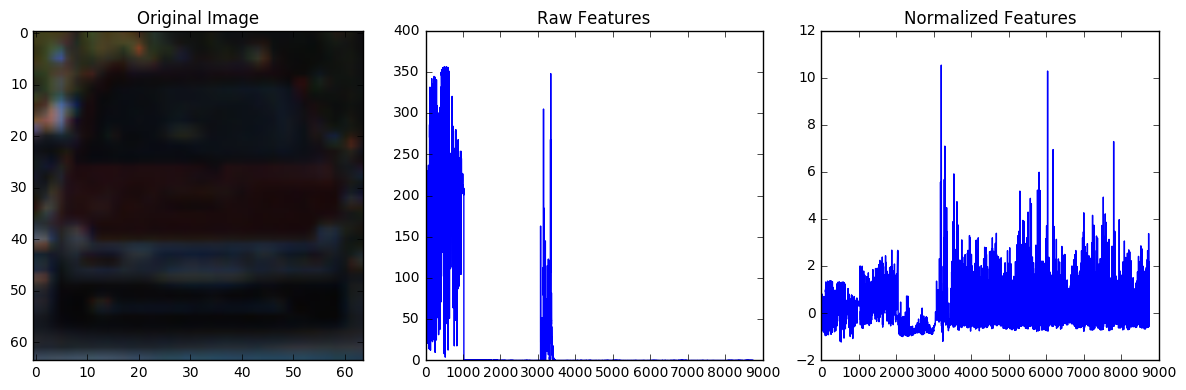

In [23]:
# Start Pipeline - Combine and Normalilze Features
car_features = extract_features(cars)
notcar_features = extract_features(notcars)

# Seperately Extract Feature from Udacity Dataset
if APPEND_UDACITY_DATASET == False:
    udacity_car_features = extract_features(udacity_cars)
    udacity_notcar_features = extract_features(udacity_notcars)
    
# Create an array stack of feature vectors
X = np.vstack((np.array(car_features), np.array(notcar_features))).astype(np.float64)

# Fit a per-column scaler
X_scaler = RobustScaler().fit(X)

# Apply the scaler to X
scaled_X = X_scaler.transform(X)
car_ind = np.random.randint(0, len(cars))
# Plot an example of raw and scaled features
fig = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(mpimg.imread(cars[car_ind]))
plt.title('Car Image')
plt.subplot(132)
plt.imshow(mpimg.imread(not_cars[car_ind]))
plt.title('Not-Car Image')
plt.subplot(133)
plt.plot(X[car_ind])
plt.title('Raw Features')
plt.subplot(134)
plt.plot(scaled_X[car_ind])
plt.title('Normalized Features')
fig.tight_layout()

print('Feature Vector size for Cars:', len(car_features[car_ind]))
print('Using Spatial Binning of:',BIN_SPATIAL_SIZE[0],
    'and', HIST_NBINS,'histogram bins')

In [24]:
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

In [25]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=VALIDATION_PORTION, random_state=rand_state)
print('Feature vector length:', len(X_train[0]))

Feature vector length: 8748


### Train using  Support Vector Classifier

In [26]:
svc = LinearSVC()
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = N_PREDICTIONS
print('SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

45.7 Seconds to train SVC...
Test Accuracy of SVC =  0.9935
SVC predicts:  [ 1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.
  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.
  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.
  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.
  1.  1.  0.  0.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.
  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.]
For these 100 labels:  [ 1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.
  1.  1.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  0.
  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.
  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1.  0.
  1.  1.  0.  0.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.
  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.]
0.03851 Seconds to predict 100 labels with SVC


In [27]:
#Save Support Vector Classifier to Datacache
def save_to_datacache(support_vector_classifier, datacache_dir=DATACACHE_DIRECTORY, 
                      override_datacache=OVERWRITE_DATACACHE):
    os.makedirs(datacache_dir, exist_ok=True)
    svc_pickle = os.path.join(datacache_dir,"svc_pickle.p")
    if override_datacache or not os.path.exists(svc_pickle): 
        svc_hyperparameters = {'svc': svc,
                               'X_SCALER':X_scaler,
                               'SPATIAL': SPATIAL, 
                               'HIST_NBINS': HIST_NBINS,
                               'COLOR_SPACE': COLOR_SPACE,
                               'HOG_ORIENTATIONS': HOG_ORIENTATIONS,
                               'HOG_PIXELS_PER_CELL': HOG_PIXELS_PER_CELL,
                               'HOG_CELLS_PER_BLOCK': HOG_CELLS_PER_BLOCK,
                               'HOG_CHANNEL': HOG_CHANNEL,
                               'SW_SPATIAL_FEAT_FLAG': SW_SPATIAL_FEAT_FLAG,
                               'SW_HOG_FEAT_FLAG': SW_HOG_FEAT_FLAG,
                               'SW_COLOR_HIST_FEAT_FLAG': SW_COLOR_HIST_FEAT_FLAG
                              }

        pickle.dump(svc_hyperparameters, open(svc_pickle, "wb"))
    
# Save classifier and parameters to datacache directory  
save_to_datacache(svc)

# Vehicle Detection and Tracking

### Re-Initialize Imports

In [28]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
import os
import pickle
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label

### Re-initialize Constants from Pickle File

In [176]:
## Directories ##
WORKING_DIRECTORY = 'data/'
DATACACHE_DIRECTORY = os.path.join(WORKING_DIRECTORY, 'datacache/')
svc_pickle = os.path.join(DATACACHE_DIRECTORY,"svc_pickle.p")
TESTING_DATASET_DIRECTORY = 'testing_dataset/'
TESTING_PIPELINE_SETUP_DIR= 'test_images/'
testset_path = "{}{}{}".format(WORKING_DIRECTORY, TESTING_PIPELINE_SETUP_DIR, '*.jpg')
with open(svc_pickle, mode='rb') as f:
    svc_hyperparameters = pickle.load(f)
    
## Feature Extraction Parameters ##
SVC = svc_hyperparameters['svc']
X_SCALER = svc_hyperparameters['X_SCALER']
# Spatial Binning
SW_SPATIAL_FEAT_FLAG = svc_hyperparameters['SW_SPATIAL_FEAT_FLAG'] 
SPATIAL = svc_hyperparameters['SPATIAL']
BIN_SPATIAL_SIZE = (SPATIAL, SPATIAL)
# Color Histogram
SW_COLOR_HIST_FEAT_FLAG = svc_hyperparameters['SW_COLOR_HIST_FEAT_FLAG']
HIST_NBINS = svc_hyperparameters['HIST_NBINS']
COLOR_SPACE = svc_hyperparameters['COLOR_SPACE']
# HOG Parameters
SW_HOG_FEAT_FLAG = svc_hyperparameters['SW_HOG_FEAT_FLAG']
HOG_ORIENTATIONS = svc_hyperparameters['HOG_ORIENTATIONS']
HOG_PIXELS_PER_CELL = svc_hyperparameters['HOG_PIXELS_PER_CELL']
HOG_CELLS_PER_BLOCK = svc_hyperparameters['HOG_CELLS_PER_BLOCK']
HOG_CHANNEL = svc_hyperparameters['HOG_CHANNEL']


## Sliding Windows Parameters ##
SW_XSTART_STOPS = [(200, None), (256, 1000)]
SW_YSTART_STOPS = [(384, 640), (384, None)]
SW_XY_WINDOWS = [(96,96),(128,128)]
SW_XY_OVERLAPS = [(.450,.480),(.21,.280)] 

## Parameters - HOG Sub-Sampling ##
SW_YSTART = 400
SW_YSTOP = 656
SW_SCALES = [1.1,1.5, 1.75]

## Vehicle Detection & Smoothing Parameters ##
BBOX_COLOR = (0, 255, 0)
BBOX_THICK = 5
SMOOTHING_FACTOR = 13

SyntaxError: invalid syntax (<ipython-input-176-acbeaa5d0047>, line 34)

## Explore Detection Technique (1) - Sliding Windows 

In [74]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=BBOX_COLOR, thick=BBOX_THICK):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, (bbox[0][0], bbox[0][1]), (bbox[1][0],bbox[1][1]), color, thick)
    return imcopy

In [112]:
# Define a wrapper function for passing in a list of slidw_window parameters
def slide_windows(img, x_start_stops=[[None, None]],
                  y_start_stops=[[None, None]],
                  xy_windows=[(64, 64)],
                  xy_overlaps=[(0.5, 0.5)]):
    windows = []
    for i in range(len(x_start_stops)):
        if len(x_start_stops) == len(xy_windows) and len(x_start_stops) == len(xy_overlaps):
            windows.extend(slide_window(img, np.asarray(x_start_stops[i]), np.asarray(y_start_stops[i]),
                                np.asarray(xy_windows[i]), np.asarray(xy_overlaps[i])))
        else:
            windows.extend(slide_window(img, np.asarray(x_start_stops[i]), np.asarray(y_start_stops[i]),
                                np.asarray(xy_windows[0]), np.asarray(xy_overlaps[0])))
    return np.concatenate(windows)

In [113]:
# Define a function that takes an image, start and stop positions in both x and y, 
# window size (x and y dimensions), and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None],
                 y_start_stop=[None, None], 
                 xy_window=(64, 64), 
                 xy_overlap=(0.5, 0.5)):
    window_list=[]
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None or x_start_stop[1] >= img.shape[1]:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None or y_start_stop[1] >= img.shape[0]:
        y_start_stop[1] = img.shape[0]

    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 

    # Loop through finding x and y window positions
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append([[(startx, starty), (endx, endy)]])
    return window_list

### Visualize Method 
This method is to be used by the Debugging code cells throught the notebook. This is to make it wasier to plot lists of images

In [114]:
def visualize(fig, rows, cols, imgs, titles):
    for i, img in enumerate(imgs):
        plt.subplot(rows, cols, i+1)
        plt.title(i+1)
        img_dims = len(img.shape)
        if img_dims < 3:
            plt.imshow(img, cmap='hot')
            plt.title(titles[i])
        else:
            plt.imshow(img)
            plt.title(titles[i])

#### Feature Extractor Function - Single Image
This function is very similar to the `extract_features()` function noted above accept that it requires a single image to check against rather than list of images

In [115]:
def single_img_features(img, color_space=COLOR_SPACE, 
                        spatial_size=BIN_SPATIAL_SIZE,
                        hist_bins=HIST_NBINS, 
                        orient=HOG_ORIENTATIONS, 
                        pix_per_cell=HOG_PIXELS_PER_CELL, 
                        cell_per_block=HOG_CELLS_PER_BLOCK,
                        hog_channel=HOG_CHANNEL, 
                        spatial_feat=SW_SPATIAL_FEAT_FLAG,
                        hist_feat=SW_COLOR_HIST_FEAT_FLAG, 
                        hog_feat=SW_HOG_FEAT_FLAG):
    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      

    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        #img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
        hog_image = np.copy(img)
        hog_shape = np.asarray(hog_image.shape)
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(len(hog_shape)):
                hog_features.append(get_hog_features(hog_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            
        # Append the new feature vector to the features list
        # Allow for flagged setting of feature vectors (spatial, hist, hog) must maintain the ordering
        if(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == True):
            img_features.append(np.concatenate((spatial_features, hist_features, hog_features)))
        elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == True):
            img_features.append(np.concatenate((hist_features, hog_features)))
        elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == True):
            img_features.append(np.array(hog_features))
        elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == True):
            img_features.append(np.concatenate((spatial_features, hog_features)))
        elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == False):
            img_features.append(np.array(spatial_features))
        elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == False):
            img_features.append(np.concatenate((spatial_features, hist_features)))
        elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == False):
            img_features.append(np.array(hist_features))
        else:
            img_features.append(np.concatenate(feature_image))
    #9) Return concatenated array of features
    return np.concatenate(img_features)

### Search Windows Function - Key Utilization in my functions
To implement a robust window detection algorithm, we require a function you that accepts an image as well as an arbitrary number of windows and performs a search on the windows, utilizing the SVC to predict bounding boxes for Cars. This can be a handy tool for any of the following detection techniques. In fact all 3 algortihms I perform utilizer search windows to some capacity.

In [ ]:
def search_windows(img, windows, svc=SVC, 
                   X_scaler=X_SCALER, 
                   color_space=COLOR_SPACE, 
                   spatial_size=BIN_SPATIAL_SIZE, 
                   hist_bins=HIST_NBINS, 
                   orient=HOG_ORIENTATIONS, 
                   pix_per_cell=HOG_PIXELS_PER_CELL, 
                   cell_per_block=HOG_CELLS_PER_BLOCK, 
                   hog_channel=HOG_CHANNEL, 
                   spatial_feat=SW_SPATIAL_FEAT_FLAG, 
                   hist_feat=SW_COLOR_HIST_FEAT_FLAG, 
                   hog_feat=SW_HOG_FEAT_FLAG):
            
    #1) Create an empty list to receive positive detection windows
    on_windows = []
    heatmap = np.zeros_like(img[:,:,0])    
    #2) Iterate over all windows in the list
    for window in windows:
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], 
                              (DEFAULT_LENGTH, DEFAULT_WIDTH)) 
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img)
        #5) Scale extracted features to be fed to classifier
        test_features = X_scaler.transform(list(np.array(features).reshape(1, -1)))
        #6) Predict using classifier
        prediction = svc.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1: # Car detected
            on_windows.append(window)
            heatmap[window[0][1]:window[1][1], window[0][0]:window[1][0]] +=1

    #8) Return windows for positive detections
    return on_windows, heatmap
    

#### Select images to test Sliding Windows Implementation

In [117]:
# Try Scaling Windows on Test Images
image_paths = glob.glob(testset_path, recursive=True)
print('Found',len(image_paths),'images in directory:', testset_path)

Found 6 images in directory: data/test_images/*.jpg


In [118]:
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    return heatmap

def draw_single_frame_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for label in labels:
        for car_number in range(1, label[1] + 1):
            #Find pixels with each car_number label value
            nonzero = (label[0] == car_number).nonzero()
            # Identify x and y values of those pixels
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])
            #Define a bounding box based on min/max x and y
            bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
            #Draw the box on the image
            cv2.rectangle(img, bbox[0], bbox[1], BBOX_COLOR, BBOX_THICK)
        # Return the image
    return img

### Sliding Windows Visualization - (Great for Debugging)
#### Define a single function that can extract features using sliding windows and make predictions
Note: This function is essentially duplicate code from my previous slide wiindows techniques implemented throughout.

BBoxes Found: 250
1.937682867050171 seconds to process one image search 273 windows
BBoxes Found: 265
1.861745834350586 seconds to process one image search 273 windows
BBoxes Found: 262
1.7890410423278809 seconds to process one image search 273 windows
BBoxes Found: 250
2.086477041244507 seconds to process one image search 273 windows
BBoxes Found: 259
2.096482992172241 seconds to process one image search 273 windows
BBoxes Found: 268
1.8385570049285889 seconds to process one image search 273 windows


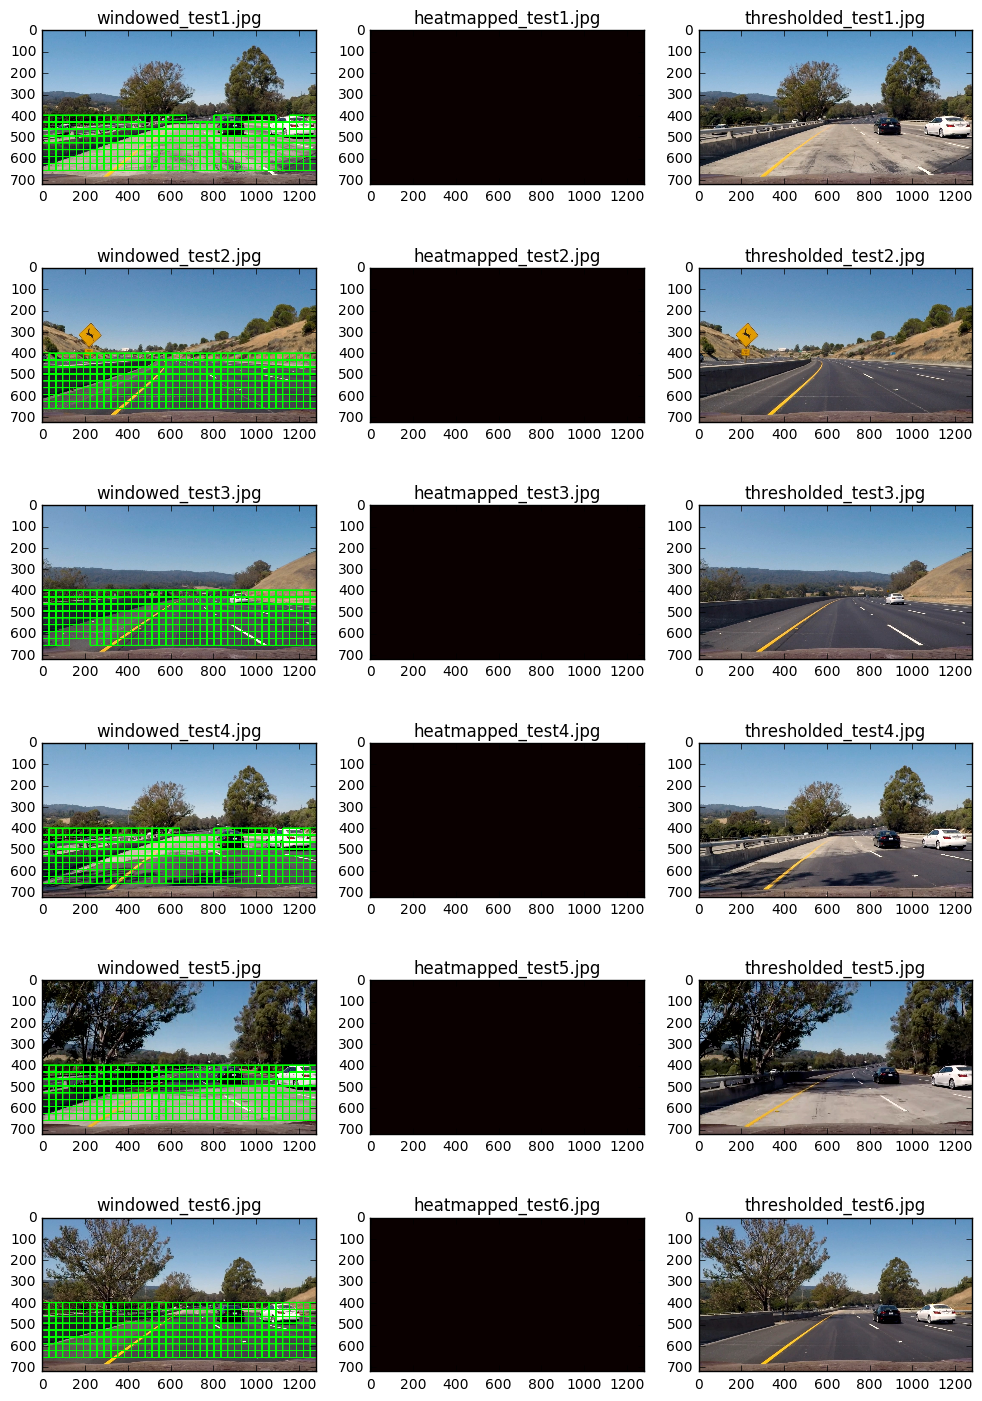

In [156]:
carslist = []
out_images = []
out_titles = []
labels = []


for img_path in image_paths:
    t1 = time.time()
    img = mpimg.imread(img_path)
    img_shape = img.shape
    img = np.copy(img)
    draw_img = np.copy(img)
    #Make a heatmap of zeros
    heatmap = np.zeros_like(img[:,:,0])
    threshold = 2
    filename = os.path.split(img_path)[-1]
    denorm_img = denormalize_pixels(img)
    
    windows = slide_windows(denorm_img, x_start_stops=SW_XSTART_STOPS, 
                              y_start_stops=SW_YSTART_STOPS, 
                              xy_windows=SW_XY_WINDOWS, 
                              xy_overlaps=SW_XY_OVERLAPS)
    
    hot_windows, heatmap = search_windows(denorm_img, windows)
    print('BBoxes Found:', len(hot_windows))
    
    window_img = draw_boxes(denorm_img, hot_windows, color=BBOX_COLOR, thick=BBOX_THICK)
    labels = label(apply_threshold(heatmap, threshold))
    
    # Draw bounding boxes on a copy of the input image       
    window_img_thresh = draw_single_frame_labeled_bboxes(draw_img, [labels])

    out_images.append(window_img)
    out_titles.append('windowed_'+filename)
    out_images.append(heatmap)
    out_titles.append('heatmapped_'+filename)
    out_images.append(window_img_thresh)
    out_titles.append('thresholded_'+filename)
    
    print(time.time()-t1, 'seconds to process one image search', len(windows), 'windows')

fig = plt.figure(figsize=(12,24))
visualize(fig, 8, 3, out_images, out_titles)

## Explore Vehicle Dectection Technique (2) - HOG Sub-Sampling Window Search 

We want a more efficient way to detect vehicles. This approach will allow for only a single call to get HOG features. The pipeline will then find a sub sample

In [150]:
def convert_color(img, conv=SW_CONVERT_COLOR):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(np.copy(img), cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(np.copy(img), cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(np.copy(img), cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(np.copy(img), cv2.COLOR_RGB2HSV)

#### Define a single function for debugging that can extract features using hog sub-sampling and make predictions
Note: This function is essentially duplicate code from my primary HOG subsampling implemented below

0.38428306579589844 seconds to run, total windows =  10
0.39461207389831543 seconds to run, total windows =  20
0.4045569896697998 seconds to run, total windows =  30
0.4143989086151123 seconds to run, total windows =  40
0.42676305770874023 seconds to run, total windows =  50
0.4378371238708496 seconds to run, total windows =  60
0.4496769905090332 seconds to run, total windows =  70
0.46471309661865234 seconds to run, total windows =  80
0.4795570373535156 seconds to run, total windows =  90
0.49379897117614746 seconds to run, total windows =  100
0.5073180198669434 seconds to run, total windows =  110
0.5178709030151367 seconds to run, total windows =  120
0.5347299575805664 seconds to run, total windows =  130
0.5514271259307861 seconds to run, total windows =  140
0.5653929710388184 seconds to run, total windows =  150
0.579003095626831 seconds to run, total windows =  160
0.5945401191711426 seconds to run, total windows =  170
0.6121439933776855 seconds to run, total windows =  1

ValueError: num must be 1 <= num <= 16, not 17

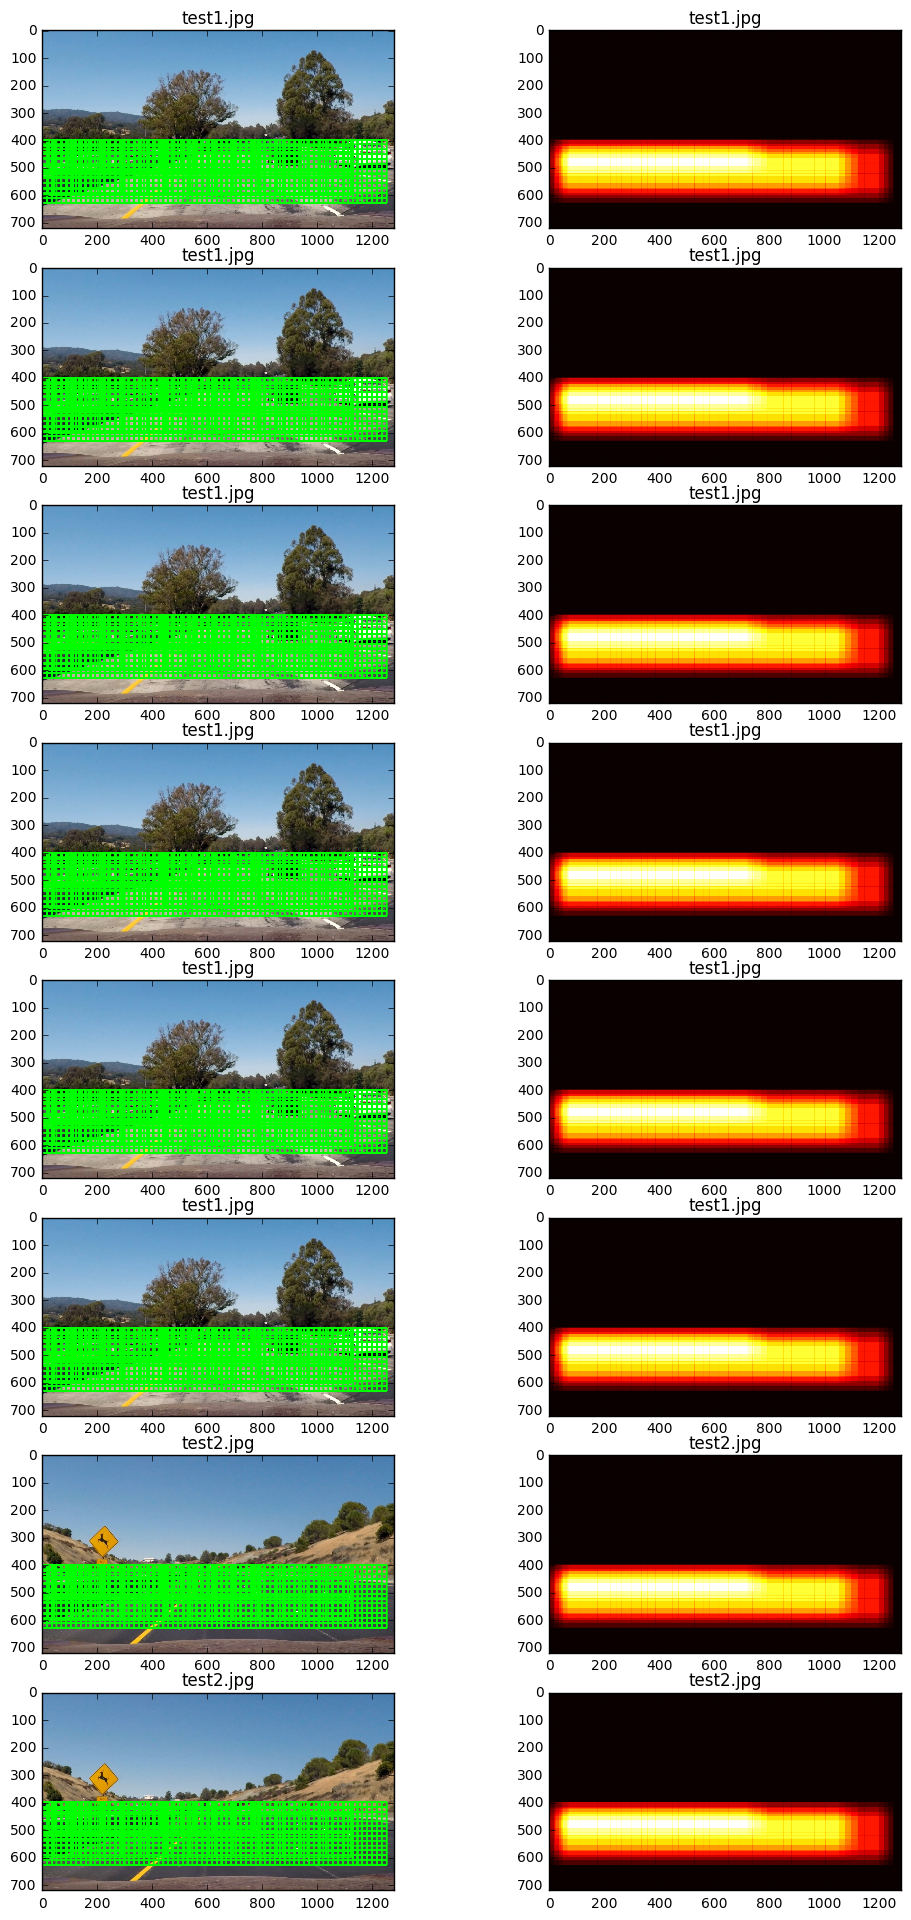

In [151]:
out_images = []
out_maps = []
out_titles = []
out_boxes = []

## Parameters - HOG Sub-Sampling ##
ystart = SW_YSTART
ystop = SW_YSTOP
scale = SW_SCALES
spatial_size=BIN_SPATIAL_SIZE
hist_bins=HIST_NBINS
orient=HOG_ORIENTATIONS
pix_per_cell=HOG_PIXELS_PER_CELL
cell_per_block=HOG_CELLS_PER_BLOCK
hog_channel=HOG_CHANNEL
spatial_feat=SW_SPATIAL_FEAT_FLAG
hog_feat=SW_HOG_FEAT_FLAG
hist_feat=SW_COLOR_HIST_FEAT_FLAG


#Iterate over the test images
for img_path in image_paths:
    img_boxes = []
    t1 = time.time()
    count = 0
    img = mpimg.imread(img_path)
    img = np.copy(img)
    denorm_img = denormalize_pixels(img)
    draw_img = np.copy(denorm_img)
    
    #Make a heatmap of zeros
    heatmap = np.zeros_like(denorm_img[:,:,0])
    img_to_search = denorm_img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_to_search, conv=SW_CONVERT_COLOR)
    
    if type(scale) == 'float':
        scale = [scale]

    for scle in scale:
        if scle != 1:
            imshape = ctrans_tosearch.shape
            ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scle), np.int(imshape[0]/scle)))

        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]

        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell)-1
        nyblocks = (ch1.shape[0] // pix_per_cell)-1 
        nfeat_per_block = orient*cell_per_block**2
        window = 64 # HOG_PIXELS_PER_CELL*HOG_PIXELS_PER_CELL # 8 cells and 8 pix per cell
        nblocks_per_window = (window // pix_per_cell)-1  # The // division is used for integers (for indices)
        cells_per_step = 2  # Instead of overlap, define how many cells to step
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step # The // division is used for integers (for indices)
        nysteps = (nyblocks - nblocks_per_window) // cells_per_step # The // division is used for integers (for indices)

        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)


        for xb in range(nxsteps):
            for yb in range(nysteps):
                count += 1
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step

                # Extract HOG for this particular patch
                if SW_HOG_FEAT_FLAG == True: # Should always be true
                    hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                    hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                    hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                    hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (DEFAULT_LENGTH, DEFAULT_WIDTH))

                # Get color features
                if SW_SPATIAL_FEAT_FLAG == True:
                    spatial_features = bin_spatial(subimg, size=BIN_SPATIAL_SIZE)
                if SW_COLOR_HIST_FEAT_FLAG == True:    
                    hist_features = color_hist(subimg, nbins=HIST_NBINS)


                # Append the new feature vector to the features list
                # Allow for flagged setting of feature vectors (spatial, hist, hog) must maintain the ordering
                if(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == True):
                    test_feats = np.hstack((spatial_features, hist_features, hog_features))
                elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == True):
                    test_feats = np.hstack((hist_features, hog_features))
                elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == True):
                    test_feats = np.hstack((hog_features))
                elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == True):
                    test_feats = np.hstack((spatial_features, hog_features))
                elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == False):
                    test_feats = np.hstack((spatial_features))
                elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == False):
                    test_feats = np.hstack((spatial_features, hist_features))
                elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == False):
                    test_feats = np.hstack((hist_features))
                else:
                    test_feats = np.hstack((np.ravel(img)))


                # Scale features and make a prediction
                test_features = X_SCALER.transform(test_feats.reshape(1, -1))
                test_prediction = SVC.predict(test_features)

                if test_prediction == 1:
                    xbox_left = np.int(xleft*scle)
                    ytop_draw = np.int(ytop*scle)
                    win_draw = np.int(window*scle)
                    cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),
                                  (xbox_left+win_draw, ytop_draw+win_draw+ystart),BBOX_COLOR,6)
                    img_boxes.append(((xbox_left, ytop_draw+ystart),
                                  (xbox_left+win_draw,ytop_draw+win_draw+ystart)))

                    heatmap[ytop_draw+ystart:ytop_draw+win_draw+ystart, xbox_left:xbox_left+win_draw] +=1
            print(time.time()-t1, 'seconds to run, total windows = ', count)

        out_images.append(draw_img)

        out_titles.append(os.path.split(img_path)[-1])
        out_titles.append(os.path.split(img_path)[-1])
        out_images.append(heatmap)
        out_maps.append(heatmap)
        out_boxes.append(img_boxes)
    
fig = plt.figure(figsize=(12,24))
visualize(fig, 8, 2, out_images, out_titles)

In [169]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart=SW_YSTART,
              ystop=SW_YSTOP, 
              scale=SW_SCALES, 
              svc=SVC, 
              X_scaler=X_SCALER,
              orient=HOG_ORIENTATIONS, 
              pix_per_cell=HOG_PIXELS_PER_CELL, 
              cell_per_block=HOG_CELLS_PER_BLOCK,
              spatial_size=BIN_SPATIAL_SIZE, 
              hist_bins=HIST_NBINS,
              spatial_feat=SW_SPATIAL_FEAT_FLAG,
              hog_feat=SW_HOG_FEAT_FLAG,
              hist_feat=SW_COLOR_HIST_FEAT_FLAG):
    
    # If y start/stop positions not defined, set to image size      
    if ystart == None or ystart < 0:
        ystart = 384
    if ystop == None or ystop > img.shape[0]:
        ystop = img.shape[0]
    draw_img = np.copy(img)
    denormalized_img = denormalize_pixels(img)
    

    #Make a heatmap of zeros
    heatmap = np.zeros_like(denormalized_img[:,:,0])
    img_to_search = denormalized_img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_to_search, conv=SW_CONVERT_COLOR)
    
    # For each scale
    if type(scale) == 'float':
        scale = [scale]

    for scle in scale:
        if scle != 1:
            imshape = ctrans_tosearch.shape
            ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scle), np.int(imshape[0]/scle)))

        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]

        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell)-1
        nyblocks = (ch1.shape[0] // pix_per_cell)-1 
        nfeat_per_block = orient*cell_per_block**2
        window = 64 # 8 cells and 8 pix per cell
        nblocks_per_window = (window // pix_per_cell)-1  # The // division is used for integers (for indices)
        cells_per_step = 1 # HOG_CELLS_PER_BLOCK  # Instead of overlap, define how many cells to step
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step # The // division is used for integers (for indices)
        nysteps = (nyblocks - nblocks_per_window) // cells_per_step # The // division is used for integers (for indices)

        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)


        for xb in range(nxsteps):
            for yb in range(nysteps):
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step

                # Extract HOG for this particular patch
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (DEFAULT_LENGTH, DEFAULT_WIDTH))

                # Get color features
                if SW_SPATIAL_FEAT_FLAG == True:
                    spatial_features = bin_spatial(subimg, size=BIN_SPATIAL_SIZE)
                if SW_COLOR_HIST_FEAT_FLAG == True:    
                    hist_features = color_hist(subimg, nbins=HIST_NBINS)


                # Append the new feature vector to the features list
                # Allow for flagged setting of feature vectors (spatial, hist, hog) must maintain the ordering
                if(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == True):
                    test_feats = np.hstack((spatial_features, hist_features, hog_features))
                elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == True):
                    test_feats = np.hstack((hist_features, hog_features))
                elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == True):
                    test_feats = np.hstack((hog_features))
                elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == True):
                    test_feats = np.hstack((spatial_features, hog_features))
                elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == False and SW_HOG_FEAT_FLAG == False):
                    test_feats = np.hstack((spatial_features))
                elif(SW_SPATIAL_FEAT_FLAG == True and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == False):
                    test_feats = np.hstack((spatial_features, hist_features))
                elif(SW_SPATIAL_FEAT_FLAG == False and SW_COLOR_HIST_FEAT_FLAG == True and SW_HOG_FEAT_FLAG == False):
                    test_feats = np.hstack((hist_features))
                else:
                    test_feats = np.hstack((np.ravel(img)))

                # Scale features and make a prediction
                test_features = X_scaler.transform(test_feats.reshape(1, -1))
                test_prediction = svc.predict(test_features)


                ## Check against classifier ## 
                if test_prediction == 1:
                    xbox_left = np.int(xleft*scle)
                    ytop_draw = np.int(ytop*scle)
                    win_draw = np.int(window*scle)
                    cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),
                                  (xbox_left+win_draw, ytop_draw+win_draw+ystart),BBOX_COLOR,BBOX_THICK)
                    heatmap[ytop_draw+ystart:ytop_draw+win_draw+ystart, xbox_left:xbox_left+win_draw] +=1
    return draw_img, heatmap

In [170]:
# DEFINE A CLASS TO RECEIVE THE CHARACTERISTICS OF EACH VEHICLE DETECTION
# Objects defined as "Vehicles" will be where multiple overlaping detections exists in the heatmap
class Vehicle():
    def __init__(self, bbox):
        car_lens = [car.car_number for car in carslist]
        if len(car_lens) > 0: 
            self.car_number = np.max(car_lens) + 1
        else: self.car_number = 0
        self.prev_detected = False # Flag sets if the Vehicle was detected in the last iteration
        self.cur_detected = True # Flag sets if the Vehicle is detected in the current iteration
        self.n_detections = 1 # number of times this vehicle has been detected
        self.n_non_detections = 0 # number of consecutive times this vehicle has not been detected
        self.xpixels = np.arange(bbox[0][0], bbox[1][0]+1) # Pixel x values of last detection
        self.ypixels = np.arange(bbox[0][1], bbox[1][1]+1) # Pixel y values of last detection
        self.recent_xfitted = []
        self.recent_xfitted.append(bbox[0][0]) # x position of the last n fits of the bounding box
        self.bestx = bbox[0][0] # X position of the current fit
        self.recent_yfitted = []
        self.recent_yfitted.append(bbox[0][1]) # Y position of the last n fits of the bounding box
        self.besty = bbox[0][1] # Average y position of the current fit
        self.recent_wfitted = []
        self.recent_wfitted.append(bbox[1][0])
        self.bestw = bbox[1][0] # Average width of the last n fits
        self.recent_hfitted = []
        self.recent_hfitted.append(bbox[1][1]) # Height of the last n fits of the bounding box
        self.besth = bbox[1][1] # Average height of the last n fits
        self.bounding_box = bbox


In [171]:
# Define a function that Implements Smoothing Factor for Multi-Fram Object Tracking
def draw_multi_frame_labeled_bboxes(img, labels, smoothing_factor=1, keep_weight=15, remove_threshold = 15, debug=False):
    noisy_pix_thresh= 4e2
    img = np.copy(img)
    # Set all cur_detected values to false for current frame
    for car in carslist:
        car.cur_detected = False
    
    for label in labels:
        # Iterate through all detected labels
        for car_number in range(1, label[1] + 1):
            # Find pixels with each car_number label value
            nonzero = (label[0] == car_number).nonzero()
            # Identify x and y values of those pixels
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])
            # Define a bounding box based on min/max x and y
            bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))

            # Check if bounding box appears in carslist
            found_match = False
            for car in carslist:               
                # Create comparison matrix
                bbox_flatten = []
                bbox_flatten.append(bbox[0])
                bbox_flatten.append(bbox[1])
                bbox_flatten = [x for xs in bbox_flatten for x in xs]
                
                car_bbox_flat = []
                car_bbox_flat.append(car.bounding_box[0])
                car_bbox_flat.append(car.bounding_box[1])
                car_bbox_flat = [x for xs in car_bbox_flat for x in xs]
                
                if(np.allclose(bbox_flatten, car_bbox_flat, atol=13)):
                    found_match = True
                    if debug:
                        print('Found a match. Car Bounding Box', car.bounding_box, '| length nonzerox:',len(nonzerox),
                             '| length nonzeroy:',len(nonzeroy))
                        print('Checked against Bounding box:',bbox)

                    car.n_detections += 1                
                    car.prev_detected = found_match
                    car.cur_detected = found_match
                    car.n_non_detections = 0 # Reset non_detections value
                    car.xpixels = nonzerox # Pixel x values of current detection
                    car.ypixels = nonzeroy # Pixel y values of current detection
                   
                    car.recent_xfitted.append(bbox[0][0])
                    car.bestx = int(np.mean(car.recent_xfitted)*.25 + bbox[0][0]*.75) # Average x position of the last n fits
                    car.recent_yfitted.append(bbox[0][1]) # Y position of the last n fits of the bounding box
                    car.besty = int(np.mean(car.recent_yfitted)*.25 + bbox[0][1]*.75) # Average y position of the current fit
                    car.recent_wfitted.append(bbox[1][0])
                    car.bestw = int(np.mean(car.recent_wfitted)*.25 + bbox[1][0]*.75) # Average width of the last n fits
                    car.recent_hfitted.append(bbox[1][1]) # Height of the last n fits of the bounding box
                    car.besth = int(np.mean(car.recent_hfitted)*.25 + bbox[1][1]*.75) # Average height of the last n fits

                    car.bounding_box = ((car.bestx, car.besty),
                                            (car.bestw, car.besth))
                    break

            # After searching for existing car, add new Vehicle         
            if found_match == False and len(nonzerox) > noisy_pix_thresh and len(nonzeroy) < 1e5: 
                # Add New Vehicle
                car = Vehicle(bbox)
                car.xpixels = nonzerox
                car.ypixels = nonzeroy
                car.n_non_detections +=1 
                car.prev_detected = found_match
                car.cur_detected = True

                # Add car to carslist
                carslist.append(car)
            
        
    # After searching through labels and updating carslist, draw labels
    for car in carslist:
        ## Remove Stale cars ##
        car_lens = [car.car_number for car in carslist]
        if len(car_lens) > 0: 
            max_car_number = np.max(car_lens)
            min_car_number = np.min(car_lens)
        else: 
            max_car_number = 1
            min_car_number = 0
        if (car.n_non_detections >= remove_threshold \
            or len(car.xpixels) < noisy_pix_thresh
            or (np.abs(max_car_number - car.car_number) > keep_weight and \
                car.cur_detected == False and car.prev_detected == False) and 
                car.n_non_detections > 3):
            if debug: 
                print('Removing Car:', car.bounding_box)
                print('Carlist now has size:', len(carslist))
            carslist.remove(car)
            
        # Set n_non_detections+=1 for each car in carslist that wasn't prev_detected
        if (car.prev_detected == True and car.cur_detected == False):
            if debug:
                print('Found possible false positive for car:', car.bounding_box, 'checking against smoothing factor')
                print( 'Car number:', car.car_number)
            car.prev_detected == False
            car.n_non_detections +=1
        
        ## Apply noise filtering to object detections
        #Process cars within the smoothing factor range
        if (car.n_detections >= smoothing_factor//2 \
            and car.n_detections > car.n_non_detections #prev had this as an or
            and len(car.xpixels) > noisy_pix_thresh
            and len(car.ypixels) < 1e5):
            cv2.rectangle(img, car.bounding_box[0], car.bounding_box[1], BBOX_COLOR, BBOX_THICK)
            

            
    # Return the image
    return img

In [172]:
# Calibration Constants #
IMAGE_EXTENSION = '.jpg'
CALIBRATION_DIRECTORY = 'camera_cal/'
CALIBRATION_PREFIX = 'corners_found'
calibration_path = "{}{}{}".format(DATACACHE_DIRECTORY, CALIBRATION_DIRECTORY, '*'+IMAGE_EXTENSION)
dist_pickle_file = os.path.join(DATACACHE_DIRECTORY, "calibration_pickle.p")
CHESSBOARD_SIZE = (9,6)

### Camera Calibration

In [163]:
# Calibrate the camera using a 9x6 checkerboard
objp = np.zeros((CHESSBOARD_SIZE[1]*CHESSBOARD_SIZE[0], 3), np.float32)
objp[:,:2] = np.mgrid[0:CHESSBOARD_SIZE[0], 0:CHESSBOARD_SIZE[1]].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = [] # 3-Dim points in real-world space
imgpoints = [] # 2-Dim points in virtual image plane

# Load Calibration Images 
calibration_images = glob.glob(calibration_path, recursive=True)

# Walk through images and search for checkerboard corners
for idx, fname in enumerate(calibration_images):
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Find the checkerboard corners
    ret, corners = cv2.findChessboardCorners(gray, CHESSBOARD_SIZE, None)
    
    # If found, add object points, image points
    if ret == True:
        print('Calibrating image:', fname)
        imgpoints.append(corners)
        objpoints.append(objp)
        
        # Draw and display found corners
        cv2.drawChessboardCorners(img, CHESSBOARD_SIZE, corners, ret)
        output_img_path = "{}{}{}{}{}".format(DATACACHE_DIRECTORY, CALIBRATION_DIRECTORY, CALIBRATION_PREFIX
                                              ,str(idx), IMAGE_EXTENSION)
        print('Saving Calibrated image:', output_img_path)

        os.makedirs(os.path.join(DATACACHE_DIRECTORY, CALIBRATION_DIRECTORY), exist_ok=True)    
        cv2.imwrite(output_img_path, img)

Calibrating image: data/datacache/camera_cal/calibration10.jpg
Saving Calibrated image: data/datacache/camera_cal/corners_found1.jpg
Calibrating image: data/datacache/camera_cal/calibration11.jpg
Saving Calibrated image: data/datacache/camera_cal/corners_found2.jpg
Calibrating image: data/datacache/camera_cal/calibration12.jpg
Saving Calibrated image: data/datacache/camera_cal/corners_found3.jpg
Calibrating image: data/datacache/camera_cal/calibration13.jpg
Saving Calibrated image: data/datacache/camera_cal/corners_found4.jpg
Calibrating image: data/datacache/camera_cal/calibration14.jpg
Saving Calibrated image: data/datacache/camera_cal/corners_found5.jpg
Calibrating image: data/datacache/camera_cal/calibration15.jpg
Saving Calibrated image: data/datacache/camera_cal/corners_found6.jpg
Calibrating image: data/datacache/camera_cal/calibration16.jpg
Saving Calibrated image: data/datacache/camera_cal/corners_found7.jpg
Calibrating image: data/datacache/camera_cal/calibration17.jpg
Saving

In [164]:
# Load image for reference
if os.path.exists(dist_pickle_file):
    dist_pickle = pickle.load( open(dist_pickle_file, "rb"))
else:
    dist_pickle = {}

img = cv2.imread(calibration_images[1])
img_size = (img.shape[1], img.shape[0])

# Perform calibration given object points and image points
if ("mtx" in dist_pickle and "dist" in dist_pickle):
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
else:
    ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Save camera calibration result data
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist

pickle.dump(dist_pickle, open(dist_pickle_file, "wb"))

In [165]:
# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open(dist_pickle_file, "rb"))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [173]:
def process_image(img):
    if (img is not None):
        labels = []
        carslist = []
        bboxes = []
        SMOOTHING_FACTOR = 13
                
        if (len(CARS_PREV_FRAMES) > SMOOTHING_FACTOR):
            flattened_carslist = np.ravel(lambda x,y:  x+y, CARS_PREV_FRAMES[:-SMOOTHING_FACTOR]) 
            CARS_PREV_FRAMES.remove(CARS_PREV_FRAMES[0])
        else:
            flattened_carslist = np.ravel(lambda x,y:  x+y, CARS_PREV_FRAMES)

        
        # Search for cars from previous frame Gather previous bboxes from carslist
        heatmap_1 = np.zeros_like(img[:,:,2])
        heatmap_2 = np.zeros_like(img[:,:,2])
        heatmap_3 = np.zeros_like(img[:,:,2])
        img = cv2.undistort(img, mtx, dist, None, mtx)
                
        ## Search for previously detected cars in current frame ##
        for car_ind in range(0, len(flattened_carslist)-1):
            if flattened_carslist[car_ind].n_non_detections == 0:
                bboxes.append(list(flattened_carslist[car_ind].bounding_box)) # Grab previous frames for feedback loop
            
        detected_cars_threshold = SMOOTHING_FACTOR # Divide by two to account for error
        _, heatmap_1 = search_windows(img, bboxes)
        labels.append(label(apply_threshold(heatmap_1, detected_cars_threshold)))
        
        ## Detect with HOG subsampling ##
        hog_subsampling_threshold = 3
        _, heatmap_2 = find_cars(img, ystart=SW_YSTART, ystop=SW_YSTOP, scale=SW_SCALES)
        labels.append(label(apply_threshold(heatmap_2, hog_subsampling_threshold)))
        
        ## Detect with Sliding Windows ##
        sliding_windows_threshold = 4
        windows = slide_windows(img, x_start_stops=SW_XSTART_STOPS, 
                              y_start_stops=SW_YSTART_STOPS, 
                              xy_windows=SW_XY_WINDOWS, 
                              xy_overlaps=SW_XY_OVERLAPS)
        _, heatmap_3 = search_windows(img, windows)
        labels.append(label(apply_threshold(heatmap_3, sliding_windows_threshold)))
        
        combined_threshold = 1
        combined_heatmap = cv2.add(heatmap_1, heatmap_2, heatmap_3)
        labels.append(label(apply_threshold(combined_heatmap, combined_threshold)))
        draw_img = draw_multi_frame_labeled_bboxes(img, labels, smoothing_factor=SMOOTHING_FACTOR, debug=True)
        CARS_PREV_FRAMES.append(carslist)
        return draw_img
    else:
        return img

In [174]:
#Import packages to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

test_ouput = 'test_output.mp4'
VIDEO_OUTPUT_PATH = os.path.join(WORKING_DIRECTORY, test_ouput)

TEST_VIDEO = 'test_video.mp4'
VIDEO_FILE_PATH = os.path.join(WORKING_DIRECTORY, TEST_VIDEO)
clip = VideoFileClip(VIDEO_FILE_PATH)
CARS_PREV_FRAMES = []
test_clip = clip.fl_image(process_image)
#%time
test_clip.write_videofile(VIDEO_OUTPUT_PATH, audio=False)
clip = VideoFileClip(VIDEO_FILE_PATH)
CARS_PREV_FRAMES = None

HTML("""
<video width="960" height="540" controls>
 <source src="{0}">
</video>
""".format(VIDEO_OUTPUT_PATH))

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 1/39 [00:06<04:03,  6.41s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▌         | 2/39 [00:12<03:55,  6.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 3/39 [00:18<03:44,  6.24s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|█         | 4/39 [00:24<03:35,  6.15s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117856 | length nonzeroy: 117856
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 5/39 [00:30<03:24,  6.00s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▌        | 6/39 [00:35<03:14,  5.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 7/39 [00:41<03:08,  5.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 8/39 [00:47<03:04,  5.96s/it]

Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119232 | length nonzeroy: 119232
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1280 | length nonzeroy: 1280
Checked against Bounding box: ((256, 448), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 9/39 [00:53<02:52,  5.75s/it]

Found a match. Car Bounding Box ((256, 445), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 10/39 [00:59<02:48,  5.79s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 11/39 [01:04<02:41,  5.77s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 12/39 [01:10<02:38,  5.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 33%|███▎      | 13/39 [01:16<02:33,  5.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 36%|███▌      | 14/39 [01:22<02:25,  5.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 38%|███▊      | 15/39 [01:28<02:17,  5.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 41%|████      | 16/39 [01:33<02:11,  5.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▎     | 17/39 [01:39<02:09,  5.86s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 46%|████▌     | 18/39 [01:47<02:12,  6.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 49%|████▊     | 19/39 [01:53<02:04,  6.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118896 | length nonzeroy: 118896
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████▏    | 20/39 [01:59<01:58,  6.24s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118896 | length nonzeroy: 118896
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 21/39 [02:06<01:55,  6.44s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118896 | length nonzeroy: 118896
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▋    | 22/39 [02:14<01:55,  6.79s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118480 | length nonzeroy: 118480
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 23/39 [02:19<01:43,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 24/39 [02:26<01:36,  6.45s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 25/39 [02:31<01:26,  6.16s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118368 | length nonzeroy: 118368
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 26/39 [02:37<01:18,  6.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118368 | length nonzeroy: 118368
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 27/39 [02:44<01:17,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118304 | length nonzeroy: 118304
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 28/39 [02:50<01:08,  6.23s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118304 | length nonzeroy: 118304
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 29/39 [02:56<01:02,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117360 | length nonzeroy: 117360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 77%|███████▋  | 30/39 [03:03<00:56,  6.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117360 | length nonzeroy: 117360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 79%|███████▉  | 31/39 [03:09<00:49,  6.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116944 | length nonzeroy: 116944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 82%|████████▏ | 32/39 [03:15<00:43,  6.24s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 106752 | length nonzeroy: 106752
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((304, 488), (347, 531)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((304, 488), (347, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((25

 85%|████████▍ | 33/39 [03:22<00:38,  6.41s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (347, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((304, 436), (347, 479))
Found a match. Car Bounding Box ((356, 436), (399, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((356, 436), (399, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 108256 | length nonzeroy: 108256
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((92

 87%|████████▋ | 34/39 [03:29<00:33,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (347, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((304, 436), (347, 479))
Found a match. Car Bounding Box ((356, 436), (399, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((356, 436), (399, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 108256 | length nonzeroy: 108256
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((320, 488), (347, 531)) | length nonzerox: 1232 | length nonzeroy: 1232
Checked against Bounding box: ((320, 488), (347, 531))
Found a match. Car Bounding Box ((92

 90%|████████▉ | 35/39 [03:37<00:28,  7.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (347, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((304, 436), (347, 479))
Found a match. Car Bounding Box ((356, 436), (399, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((356, 436), (399, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 108256 | length nonzeroy: 108256
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((320, 488), (347, 531)) | length nonzerox: 1232 | length nonzeroy: 1232
Checked against Bounding box: ((320, 488), (347, 531))
Found a match. Car Bounding Box ((92

 92%|█████████▏| 36/39 [03:44<00:20,  6.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (347, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((304, 436), (347, 479))
Found a match. Car Bounding Box ((356, 436), (399, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((356, 436), (399, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 108256 | length nonzeroy: 108256
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((320, 488), (347, 531)) | length nonzerox: 1232 | length nonzeroy: 1232
Checked against Bounding box: ((320, 488), (347, 531))
Found a match. Car Bounding Box ((92

 95%|█████████▍| 37/39 [03:51<00:13,  6.87s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (347, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((304, 436), (347, 479))
Found a match. Car Bounding Box ((356, 436), (399, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((356, 436), (399, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 97600 | length nonzeroy: 97600
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((320, 488), (347, 531)) | length nonzerox: 1232 | length nonzeroy: 1232
Checked against Bounding box: ((320, 488), (347, 531))
Found a match. Car Bounding Box ((928,

 97%|█████████▋| 38/39 [03:59<00:07,  7.18s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (347, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((304, 436), (347, 479))
Found a match. Car Bounding Box ((356, 436), (399, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((356, 436), (399, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 107840 | length nonzeroy: 107840
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((320, 488), (347, 531)) | length nonzerox: 1232 | length nonzeroy: 1232
Checked against Bounding box: ((320, 488), (347, 531))
Found a match. Car Bounding Box ((92

[MoviePy] Done.
[MoviePy] >>>> Video ready: data/test_output.mp4 



### Process Project Video

In [175]:
project_ouput = 'project_output_no_yolo.mp4'
PROJECT_VIDEO = 'project_video.mp4'
VIDEO_FILE_PATH = os.path.join(WORKING_DIRECTORY, PROJECT_VIDEO)
VIDEO_OUTPUT_PATH = os.path.join(WORKING_DIRECTORY, project_ouput)

CARS_PREV_FRAMES = []
clip = VideoFileClip(VIDEO_FILE_PATH)
project_clip = clip.fl_image(process_image)
project_clip.write_videofile(VIDEO_OUTPUT_PATH, audio=False)
CARS_PREV_FRAMES = None

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  0%|          | 1/1261 [00:06<2:17:36,  6.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  0%|          | 2/1261 [00:12<2:14:46,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114240 | length nonzeroy: 114240
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  0%|          | 3/1261 [00:19<2:19:46,  6.67s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118048 | length nonzeroy: 118048
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  0%|          | 4/1261 [00:27<2:25:13,  6.93s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118048 | length nonzeroy: 118048
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  0%|          | 5/1261 [00:34<2:23:01,  6.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118048 | length nonzeroy: 118048
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  0%|          | 6/1261 [00:41<2:26:27,  7.00s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|          | 7/1261 [00:47<2:22:39,  6.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|          | 8/1261 [00:53<2:16:35,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|          | 9/1261 [01:00<2:15:38,  6.50s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118048 | length nonzeroy: 118048
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|          | 10/1261 [01:06<2:14:06,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117184 | length nonzeroy: 117184
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|          | 11/1261 [01:12<2:13:41,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117184 | length nonzeroy: 117184
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|          | 12/1261 [01:20<2:19:25,  6.70s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117184 | length nonzeroy: 117184
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|          | 13/1261 [01:25<2:12:07,  6.35s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117664 | length nonzeroy: 117664
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|          | 14/1261 [01:32<2:14:20,  6.46s/it]

Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115040 | length nonzeroy: 115040
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1280 | length nonzeroy: 1280
Checked against Bounding box: ((256, 448), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|          | 15/1261 [01:39<2:15:41,  6.53s/it]

Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 110944 | length nonzeroy: 110944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 445), (295, 479)) | length nonzerox: 1280 | length nonzeroy: 1280
Checked against Bounding box: ((256, 448), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|▏         | 16/1261 [01:45<2:12:42,  6.40s/it]

Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112192 | length nonzeroy: 112192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 445), (295, 479)) | length nonzerox: 1280 | length nonzeroy: 1280
Checked against Bounding box: ((256, 448), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|▏         | 17/1261 [01:51<2:10:24,  6.29s/it]

Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 110240 | length nonzeroy: 110240
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 445), (295, 479)) | length nonzerox: 1280 | length nonzeroy: 1280
Checked against Bounding box: ((256, 448), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  1%|▏         | 18/1261 [01:57<2:07:20,  6.15s/it]

Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116976 | length nonzeroy: 116976
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 445), (295, 479)) | length nonzerox: 1280 | length nonzeroy: 1280
Checked against Bounding box: ((256, 448), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 19/1261 [02:02<2:04:01,  5.99s/it]

Found a match. Car Bounding Box ((256, 445), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118016 | length nonzeroy: 118016
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 20/1261 [02:08<2:01:51,  5.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118880 | length nonzeroy: 118880
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((256, 488), (295, 531)) checking against smoothing factor
Car number: 2
Found possible false positive for car: ((256, 540), (295, 583)) checking against smo

  2%|▏         | 21/1261 [02:14<2:02:03,  5.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 583)) | length nonzerox: 1440 | length nonzeroy: 1440
Checked against Bounding box: ((256, 540), (295, 575))
Found a match. Car Bounding Box ((92

  2%|▏         | 22/1261 [02:19<1:59:50,  5.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 576)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 23/1261 [02:26<2:02:10,  5.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 24/1261 [02:32<2:02:24,  5.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 25/1261 [02:37<1:59:35,  5.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 26/1261 [02:43<2:01:08,  5.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 27/1261 [02:49<2:02:10,  5.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116800 | length nonzeroy: 116800
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 28/1261 [02:55<2:01:47,  5.93s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116800 | length nonzeroy: 116800
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 29/1261 [03:01<2:00:06,  5.85s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 30/1261 [03:07<2:00:00,  5.85s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  2%|▏         | 31/1261 [03:13<2:04:11,  6.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 32/1261 [03:19<2:05:16,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 33/1261 [03:26<2:09:02,  6.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 34/1261 [03:32<2:05:30,  6.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 35/1261 [03:38<2:04:12,  6.08s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 36/1261 [03:44<2:03:56,  6.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 37/1261 [03:50<2:02:04,  5.98s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 38/1261 [03:55<2:01:01,  5.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 39/1261 [04:01<1:58:44,  5.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 40/1261 [04:07<1:59:10,  5.86s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 41/1261 [04:13<1:58:52,  5.85s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 42/1261 [04:19<1:58:49,  5.85s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 43/1261 [04:25<1:59:26,  5.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  3%|▎         | 44/1261 [04:31<2:00:45,  5.95s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▎         | 45/1261 [04:36<1:59:09,  5.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▎         | 46/1261 [04:43<2:05:01,  6.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▎         | 47/1261 [04:49<2:04:23,  6.15s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▍         | 48/1261 [04:55<2:03:46,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▍         | 49/1261 [05:01<2:01:53,  6.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▍         | 50/1261 [05:07<2:01:06,  6.00s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▍         | 51/1261 [05:15<2:11:58,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▍         | 52/1261 [05:23<2:18:47,  6.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▍         | 53/1261 [05:29<2:15:32,  6.73s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▍         | 54/1261 [05:36<2:19:09,  6.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▍         | 55/1261 [05:43<2:14:22,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  4%|▍         | 56/1261 [05:49<2:11:44,  6.56s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▍         | 57/1261 [05:55<2:10:26,  6.50s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▍         | 58/1261 [06:01<2:06:31,  6.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▍         | 59/1261 [06:08<2:12:40,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▍         | 60/1261 [06:14<2:07:25,  6.37s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▍         | 61/1261 [06:20<2:05:36,  6.28s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▍         | 62/1261 [06:26<2:04:57,  6.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▍         | 63/1261 [06:32<2:00:56,  6.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▌         | 64/1261 [06:38<1:58:46,  5.95s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▌         | 65/1261 [06:43<1:56:38,  5.85s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117440 | length nonzeroy: 117440
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▌         | 66/1261 [06:50<1:58:32,  5.95s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118688 | length nonzeroy: 118688
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▌         | 67/1261 [06:56<2:03:00,  6.18s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▌         | 68/1261 [07:03<2:03:46,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  5%|▌         | 69/1261 [07:10<2:08:14,  6.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▌         | 70/1261 [07:17<2:14:35,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▌         | 71/1261 [07:24<2:13:14,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▌         | 72/1261 [07:31<2:13:51,  6.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▌         | 73/1261 [07:37<2:11:03,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▌         | 74/1261 [07:43<2:05:43,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▌         | 75/1261 [07:48<2:03:01,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▌         | 76/1261 [07:54<2:01:20,  6.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116608 | length nonzeroy: 116608
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▌         | 77/1261 [08:01<2:00:56,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▌         | 78/1261 [08:07<1:59:51,  6.08s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113632 | length nonzeroy: 113632
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▋         | 79/1261 [08:14<2:07:43,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112960 | length nonzeroy: 112960
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▋         | 80/1261 [08:21<2:08:58,  6.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113280 | length nonzeroy: 113280
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  6%|▋         | 81/1261 [08:27<2:09:45,  6.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113696 | length nonzeroy: 113696
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 82/1261 [08:33<2:06:26,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 83/1261 [08:39<2:03:30,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117568 | length nonzeroy: 117568
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 84/1261 [08:45<2:01:16,  6.18s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 85/1261 [08:51<1:59:20,  6.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 86/1261 [08:57<1:55:31,  5.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 87/1261 [09:06<2:15:24,  6.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 88/1261 [09:11<2:07:16,  6.51s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117568 | length nonzeroy: 117568
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 89/1261 [09:18<2:08:19,  6.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117536 | length nonzeroy: 117536
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 90/1261 [09:24<2:01:19,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115456 | length nonzeroy: 115456
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 91/1261 [09:30<1:59:38,  6.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116192 | length nonzeroy: 116192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 92/1261 [09:35<1:58:13,  6.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118272 | length nonzeroy: 118272
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 93/1261 [09:41<1:54:55,  5.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  7%|▋         | 94/1261 [09:46<1:52:12,  5.77s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 95/1261 [09:52<1:50:22,  5.68s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 96/1261 [09:58<1:53:08,  5.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 97/1261 [10:04<1:52:56,  5.82s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 98/1261 [10:09<1:51:37,  5.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 99/1261 [10:15<1:50:14,  5.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 100/1261 [10:21<1:49:11,  5.64s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 101/1261 [10:26<1:48:01,  5.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115456 | length nonzeroy: 115456
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 102/1261 [10:32<1:50:47,  5.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115456 | length nonzeroy: 115456
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 103/1261 [10:38<1:50:06,  5.71s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116192 | length nonzeroy: 116192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 104/1261 [10:44<1:50:45,  5.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116192 | length nonzeroy: 116192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 105/1261 [10:50<1:51:55,  5.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116512 | length nonzeroy: 116512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 106/1261 [10:55<1:50:51,  5.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  8%|▊         | 107/1261 [11:01<1:52:45,  5.86s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▊         | 108/1261 [11:07<1:53:25,  5.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▊         | 109/1261 [11:13<1:52:58,  5.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▊         | 110/1261 [11:19<1:51:30,  5.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▉         | 111/1261 [11:25<1:51:44,  5.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▉         | 112/1261 [11:31<1:57:35,  6.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▉         | 113/1261 [11:38<1:59:53,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▉         | 114/1261 [11:45<2:04:57,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▉         | 115/1261 [11:52<2:07:19,  6.67s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▉         | 116/1261 [11:59<2:05:45,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112448 | length nonzeroy: 112448
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

  9%|▉         | 117/1261 [12:05<2:04:16,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▉         | 118/1261 [12:12<2:06:09,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

  9%|▉         | 119/1261 [12:18<2:03:21,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|▉         | 120/1261 [12:24<2:01:26,  6.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|▉         | 121/1261 [12:30<1:55:41,  6.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|▉         | 122/1261 [12:36<2:00:20,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|▉         | 123/1261 [12:43<2:03:53,  6.53s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|▉         | 124/1261 [12:50<2:06:38,  6.68s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|▉         | 125/1261 [12:57<2:04:42,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|▉         | 126/1261 [13:03<2:02:54,  6.50s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|█         | 127/1261 [13:10<2:03:14,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118880 | length nonzeroy: 118880
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|█         | 128/1261 [13:17<2:07:55,  6.77s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115872 | length nonzeroy: 115872
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|█         | 129/1261 [13:23<2:04:52,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119296 | length nonzeroy: 119296
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

 10%|█         | 130/1261 [13:29<2:00:18,  6.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|█         | 131/1261 [13:36<2:04:23,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 10%|█         | 132/1261 [13:42<2:01:16,  6.44s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118592 | length nonzeroy: 118592
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█         | 133/1261 [13:49<2:03:40,  6.58s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█         | 134/1261 [13:55<2:00:27,  6.41s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█         | 135/1261 [14:01<1:57:05,  6.24s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█         | 136/1261 [14:07<1:54:57,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█         | 137/1261 [14:13<1:55:55,  6.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█         | 138/1261 [14:19<1:52:58,  6.04s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█         | 139/1261 [14:26<1:59:40,  6.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█         | 140/1261 [14:34<2:07:59,  6.85s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119296 | length nonzeroy: 119296
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█         | 141/1261 [14:43<2:18:01,  7.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117920 | length nonzeroy: 117920
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█▏        | 142/1261 [14:49<2:11:00,  7.02s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119168 | length nonzeroy: 119168
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█▏        | 143/1261 [14:56<2:08:46,  6.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119168 | length nonzeroy: 119168
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█▏        | 144/1261 [15:04<2:17:59,  7.41s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118464 | length nonzeroy: 118464
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 11%|█▏        | 145/1261 [15:12<2:21:26,  7.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118464 | length nonzeroy: 118464
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 146/1261 [15:18<2:12:01,  7.10s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118048 | length nonzeroy: 118048
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 147/1261 [15:24<2:07:38,  6.87s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114368 | length nonzeroy: 114368
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 148/1261 [15:30<2:00:54,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 149/1261 [15:36<1:57:13,  6.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118592 | length nonzeroy: 118592
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 150/1261 [15:42<1:54:38,  6.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118592 | length nonzeroy: 118592
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 151/1261 [15:49<1:59:55,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 152/1261 [15:57<2:05:22,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 153/1261 [16:04<2:07:36,  6.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 154/1261 [16:12<2:17:08,  7.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118880 | length nonzeroy: 118880
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

 12%|█▏        | 155/1261 [16:19<2:10:40,  7.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 156/1261 [16:25<2:07:58,  6.95s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 12%|█▏        | 157/1261 [16:32<2:06:24,  6.87s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 158/1261 [16:39<2:07:34,  6.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 159/1261 [16:45<2:04:04,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 160/1261 [16:53<2:08:12,  6.99s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 161/1261 [16:59<2:02:17,  6.67s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 162/1261 [17:06<2:03:01,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 163/1261 [17:12<1:58:37,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 164/1261 [17:18<1:56:45,  6.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 165/1261 [17:24<1:55:56,  6.35s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 166/1261 [17:30<1:52:32,  6.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 167/1261 [17:36<1:50:41,  6.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116512 | length nonzeroy: 116512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 168/1261 [17:41<1:49:11,  5.99s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 169/1261 [17:47<1:47:47,  5.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 13%|█▎        | 170/1261 [17:52<1:43:56,  5.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▎        | 171/1261 [17:58<1:42:42,  5.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▎        | 172/1261 [18:04<1:42:14,  5.63s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▍        | 174/1261 [18:17<1:50:54,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▍        | 175/1261 [18:23<1:50:47,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▍        | 176/1261 [18:29<1:52:13,  6.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▍        | 177/1261 [18:35<1:51:32,  6.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▍        | 178/1261 [18:41<1:49:41,  6.08s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▍        | 179/1261 [18:47<1:48:56,  6.04s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▍        | 180/1261 [18:53<1:47:17,  5.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▍        | 181/1261 [19:00<1:53:16,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 14%|█▍        | 182/1261 [19:06<1:51:37,  6.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▍        | 183/1261 [19:14<2:01:10,  6.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▍        | 184/1261 [19:21<1:59:57,  6.68s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▍        | 185/1261 [19:27<1:59:13,  6.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▍        | 186/1261 [19:33<1:55:42,  6.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▍        | 187/1261 [19:39<1:52:09,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▍        | 188/1261 [19:45<1:49:27,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▍        | 189/1261 [19:52<1:56:47,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116864 | length nonzeroy: 116864
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▌        | 190/1261 [20:00<2:00:38,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▌        | 191/1261 [20:06<1:56:17,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▌        | 192/1261 [20:12<1:54:31,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▌        | 193/1261 [20:18<1:54:04,  6.41s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▌        | 194/1261 [20:23<1:47:42,  6.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 15%|█▌        | 195/1261 [20:31<1:55:15,  6.49s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▌        | 196/1261 [20:36<1:48:58,  6.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▌        | 197/1261 [20:43<1:54:05,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▌        | 198/1261 [20:50<1:53:47,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▌        | 199/1261 [20:56<1:53:13,  6.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▌        | 200/1261 [21:03<1:56:54,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▌        | 201/1261 [21:11<2:03:18,  6.98s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▌        | 202/1261 [21:18<2:00:44,  6.84s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▌        | 203/1261 [21:24<1:57:14,  6.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▌        | 204/1261 [21:31<2:00:09,  6.82s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▋        | 205/1261 [21:38<2:00:05,  6.82s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▋        | 206/1261 [21:44<1:59:15,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▋        | 207/1261 [21:51<1:55:37,  6.58s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 16%|█▋        | 208/1261 [21:57<1:53:32,  6.47s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 209/1261 [22:03<1:52:34,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 210/1261 [22:09<1:51:32,  6.37s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 211/1261 [22:17<1:57:38,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 212/1261 [22:24<2:00:46,  6.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 213/1261 [22:31<2:00:00,  6.87s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 214/1261 [22:38<1:59:50,  6.87s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 215/1261 [22:44<1:58:02,  6.77s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116192 | length nonzeroy: 116192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 216/1261 [22:50<1:54:21,  6.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116512 | length nonzeroy: 116512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 217/1261 [22:58<1:58:15,  6.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 218/1261 [23:05<1:57:52,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117568 | length nonzeroy: 117568
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 219/1261 [23:12<2:00:55,  6.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 17%|█▋        | 220/1261 [23:20<2:07:13,  7.33s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 221/1261 [23:28<2:11:23,  7.58s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117568 | length nonzeroy: 117568
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 222/1261 [23:36<2:13:02,  7.68s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113696 | length nonzeroy: 113696
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 223/1261 [23:45<2:16:14,  7.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117568 | length nonzeroy: 117568
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 224/1261 [23:54<2:25:15,  8.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 225/1261 [24:02<2:24:33,  8.37s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117984 | length nonzeroy: 117984
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 226/1261 [24:10<2:20:38,  8.15s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116096 | length nonzeroy: 116096
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 227/1261 [24:18<2:16:55,  7.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117504 | length nonzeroy: 117504
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 228/1261 [24:26<2:18:21,  8.04s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117504 | length nonzeroy: 117504
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 229/1261 [24:34<2:19:47,  8.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117568 | length nonzeroy: 117568
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 230/1261 [24:43<2:20:39,  8.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117568 | length nonzeroy: 117568
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 231/1261 [24:49<2:12:14,  7.70s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117984 | length nonzeroy: 117984
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 232/1261 [24:57<2:12:11,  7.71s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 18%|█▊        | 233/1261 [25:04<2:09:17,  7.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117984 | length nonzeroy: 117984
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▊        | 234/1261 [25:12<2:12:32,  7.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117984 | length nonzeroy: 117984
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▊        | 235/1261 [25:19<2:09:57,  7.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▊        | 236/1261 [25:26<2:06:23,  7.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▉        | 237/1261 [25:33<2:04:03,  7.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▉        | 238/1261 [25:41<2:04:54,  7.33s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▉        | 239/1261 [25:48<2:02:59,  7.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117536 | length nonzeroy: 117536
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▉        | 240/1261 [25:55<2:02:28,  7.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▉        | 241/1261 [26:02<2:01:05,  7.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▉        | 242/1261 [26:09<2:01:45,  7.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▉        | 243/1261 [26:17<2:02:53,  7.24s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▉        | 244/1261 [26:24<2:01:43,  7.18s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 19%|█▉        | 245/1261 [26:31<2:00:39,  7.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|█▉        | 246/1261 [26:37<1:56:42,  6.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|█▉        | 247/1261 [26:43<1:53:48,  6.73s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|█▉        | 248/1261 [26:50<1:53:54,  6.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|█▉        | 249/1261 [26:56<1:51:28,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|█▉        | 250/1261 [27:03<1:49:42,  6.51s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119104 | length nonzeroy: 119104
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|█▉        | 251/1261 [27:09<1:50:17,  6.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|█▉        | 252/1261 [27:16<1:51:49,  6.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|██        | 253/1261 [27:23<1:51:14,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|██        | 254/1261 [27:29<1:48:49,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|██        | 255/1261 [27:36<1:49:28,  6.53s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|██        | 256/1261 [27:42<1:49:56,  6.56s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|██        | 257/1261 [27:49<1:50:33,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 20%|██        | 258/1261 [27:56<1:52:47,  6.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 259/1261 [28:03<1:55:19,  6.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 260/1261 [28:09<1:51:17,  6.67s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 261/1261 [28:17<1:57:37,  7.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 262/1261 [28:25<1:58:24,  7.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119104 | length nonzeroy: 119104
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 263/1261 [28:34<2:08:55,  7.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 264/1261 [28:41<2:04:51,  7.51s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118688 | length nonzeroy: 118688
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 265/1261 [28:47<2:00:24,  7.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 266/1261 [28:54<1:55:20,  6.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██        | 267/1261 [29:00<1:51:54,  6.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██▏       | 268/1261 [29:06<1:48:30,  6.56s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██▏       | 269/1261 [29:11<1:42:52,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██▏       | 270/1261 [29:19<1:47:00,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 21%|██▏       | 271/1261 [29:25<1:48:47,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 272/1261 [29:34<1:57:39,  7.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 273/1261 [29:42<2:00:14,  7.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 274/1261 [29:51<2:11:16,  7.98s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 275/1261 [30:01<2:21:29,  8.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 276/1261 [30:09<2:15:40,  8.26s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113696 | length nonzeroy: 113696
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((87

 22%|██▏       | 277/1261 [30:16<2:09:10,  7.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118688 | length nonzeroy: 118688
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 278/1261 [30:21<1:58:34,  7.24s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 279/1261 [30:27<1:50:33,  6.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 280/1261 [30:33<1:47:46,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 281/1261 [30:40<1:49:30,  6.70s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 282/1261 [30:46<1:46:28,  6.53s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 22%|██▏       | 283/1261 [30:54<1:50:55,  6.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 284/1261 [31:00<1:50:43,  6.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 285/1261 [31:08<1:52:32,  6.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 286/1261 [31:14<1:50:32,  6.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 287/1261 [31:22<1:55:54,  7.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118688 | length nonzeroy: 118688
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 288/1261 [31:29<1:55:38,  7.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118272 | length nonzeroy: 118272
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 289/1261 [31:36<1:55:17,  7.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 290/1261 [31:43<1:52:53,  6.98s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116512 | length nonzeroy: 116512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 291/1261 [31:49<1:50:03,  6.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 292/1261 [31:55<1:45:45,  6.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 293/1261 [32:03<1:50:31,  6.85s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 294/1261 [32:08<1:44:01,  6.45s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 295/1261 [32:14<1:41:10,  6.28s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 23%|██▎       | 296/1261 [32:21<1:44:17,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▎       | 297/1261 [32:28<1:44:24,  6.50s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▎       | 298/1261 [32:35<1:45:36,  6.58s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▎       | 299/1261 [32:41<1:43:23,  6.45s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▍       | 300/1261 [32:47<1:41:44,  6.35s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117632 | length nonzeroy: 117632
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

 24%|██▍       | 301/1261 [32:53<1:39:57,  6.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116320 | length nonzeroy: 116320
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

 24%|██▍       | 302/1261 [32:59<1:37:59,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▍       | 303/1261 [33:05<1:36:20,  6.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▍       | 304/1261 [33:12<1:45:04,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▍       | 305/1261 [33:19<1:45:06,  6.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▍       | 306/1261 [33:26<1:48:07,  6.79s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▍       | 307/1261 [33:33<1:49:32,  6.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 24%|██▍       | 308/1261 [33:40<1:50:06,  6.93s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▍       | 309/1261 [33:47<1:49:54,  6.93s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▍       | 310/1261 [33:53<1:45:19,  6.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▍       | 311/1261 [33:59<1:42:16,  6.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▍       | 312/1261 [34:06<1:44:59,  6.64s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117440 | length nonzeroy: 117440
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▍       | 313/1261 [34:13<1:42:50,  6.51s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▍       | 314/1261 [34:19<1:44:25,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▍       | 315/1261 [34:26<1:44:00,  6.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▌       | 316/1261 [34:32<1:41:18,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▌       | 317/1261 [34:39<1:45:05,  6.68s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▌       | 318/1261 [34:47<1:48:10,  6.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▌       | 319/1261 [34:55<1:53:46,  7.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▌       | 320/1261 [35:01<1:48:27,  6.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 25%|██▌       | 321/1261 [35:08<1:46:50,  6.82s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 322/1261 [35:14<1:43:33,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 323/1261 [35:20<1:42:39,  6.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 324/1261 [35:26<1:39:27,  6.37s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117440 | length nonzeroy: 117440
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 325/1261 [35:34<1:45:46,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

 26%|██▌       | 326/1261 [35:40<1:44:43,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 327/1261 [35:47<1:43:13,  6.63s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 328/1261 [35:54<1:44:43,  6.73s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 329/1261 [36:01<1:46:06,  6.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 330/1261 [36:07<1:43:31,  6.67s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▌       | 331/1261 [36:14<1:43:47,  6.70s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▋       | 332/1261 [36:21<1:44:25,  6.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▋       | 333/1261 [36:27<1:40:03,  6.47s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 26%|██▋       | 334/1261 [36:33<1:41:53,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 335/1261 [36:40<1:39:52,  6.47s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 336/1261 [36:46<1:39:04,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 337/1261 [36:52<1:37:27,  6.33s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 338/1261 [36:58<1:37:14,  6.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 339/1261 [37:04<1:35:49,  6.24s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 340/1261 [37:11<1:37:35,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 341/1261 [37:17<1:34:53,  6.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 342/1261 [37:23<1:33:33,  6.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 343/1261 [37:28<1:29:57,  5.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 344/1261 [37:39<1:55:16,  7.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 345/1261 [37:45<1:45:44,  6.93s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 27%|██▋       | 346/1261 [37:52<1:48:08,  7.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 347/1261 [37:58<1:42:42,  6.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 348/1261 [38:04<1:39:31,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 349/1261 [38:11<1:39:29,  6.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 350/1261 [38:17<1:35:42,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 351/1261 [38:23<1:34:14,  6.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 352/1261 [38:28<1:29:29,  5.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 353/1261 [38:33<1:26:20,  5.70s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 354/1261 [38:38<1:24:13,  5.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 355/1261 [38:46<1:32:49,  6.15s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 356/1261 [38:52<1:32:39,  6.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 357/1261 [38:58<1:33:18,  6.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 358/1261 [39:09<1:51:20,  7.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 28%|██▊       | 359/1261 [39:15<1:48:33,  7.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▊       | 360/1261 [39:21<1:43:22,  6.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▊       | 361/1261 [39:27<1:35:53,  6.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▊       | 362/1261 [39:33<1:34:12,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▉       | 363/1261 [39:38<1:31:22,  6.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▉       | 364/1261 [39:45<1:31:19,  6.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▉       | 365/1261 [39:50<1:28:08,  5.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▉       | 366/1261 [39:56<1:27:53,  5.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▉       | 367/1261 [40:01<1:24:37,  5.68s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▉       | 368/1261 [40:06<1:22:23,  5.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▉       | 369/1261 [40:11<1:20:54,  5.44s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▉       | 370/1261 [40:17<1:19:53,  5.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 29%|██▉       | 371/1261 [40:23<1:21:46,  5.51s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|██▉       | 372/1261 [40:29<1:27:30,  5.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|██▉       | 373/1261 [40:36<1:31:44,  6.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|██▉       | 374/1261 [40:42<1:30:36,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|██▉       | 375/1261 [40:51<1:40:52,  6.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|██▉       | 376/1261 [40:58<1:42:44,  6.97s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|██▉       | 377/1261 [41:04<1:39:51,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|██▉       | 378/1261 [41:13<1:47:27,  7.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|███       | 379/1261 [41:21<1:51:00,  7.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|███       | 380/1261 [41:27<1:45:12,  7.16s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|███       | 381/1261 [41:34<1:41:16,  6.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|███       | 382/1261 [41:39<1:34:31,  6.45s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|███       | 383/1261 [41:44<1:30:37,  6.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 30%|███       | 384/1261 [41:50<1:26:14,  5.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117440 | length nonzeroy: 117440
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 385/1261 [41:57<1:32:41,  6.35s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 386/1261 [42:03<1:30:24,  6.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 387/1261 [42:09<1:29:19,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 388/1261 [42:15<1:28:02,  6.05s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 389/1261 [42:20<1:24:11,  5.79s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 390/1261 [42:25<1:22:02,  5.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 391/1261 [42:33<1:32:11,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 392/1261 [42:41<1:35:50,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 393/1261 [42:47<1:34:34,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███       | 394/1261 [42:54<1:37:23,  6.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███▏      | 395/1261 [43:01<1:37:36,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███▏      | 396/1261 [43:09<1:42:39,  7.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 111200 | length nonzeroy: 111200
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 31%|███▏      | 397/1261 [43:16<1:43:34,  7.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117440 | length nonzeroy: 117440
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 32%|███▏      | 398/1261 [43:25<1:48:23,  7.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 32%|███▏      | 399/1261 [43:34<1:54:54,  8.00s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 32%|███▏      | 400/1261 [43:41<1:52:05,  7.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 32%|███▏      | 401/1261 [43:49<1:54:28,  7.99s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 32%|███▏      | 402/1261 [43:56<1:46:19,  7.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116640 | length nonzeroy: 116640
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 32%|███▏      | 403/1261 [44:03<1:45:33,  7.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116928 | length nonzeroy: 116928
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 32%|███▏      | 404/1261 [44:09<1:41:22,  7.10s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116640 | length nonzeroy: 116640
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 32%|███▏      | 405/1261 [44:16<1:41:13,  7.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117888 | length nonzeroy: 117888
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 32%|███▏      | 406/1261 [44:22<1:34:28,  6.63s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117888 | length nonzeroy: 117888
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 32%|███▏      | 407/1261 [44:29<1:37:39,  6.86s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114192 | length nonzeroy: 114192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 32%|███▏      | 408/1261 [44:37<1:41:28,  7.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smoothing

 32%|███▏      | 409/1261 [44:44<1:40:56,  7.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113280 | length nonzeroy: 113280
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 33%|███▎      | 410/1261 [44:53<1:47:23,  7.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 33%|███▎      | 411/1261 [45:00<1:45:19,  7.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 33%|███▎      | 412/1261 [45:06<1:41:12,  7.15s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 33%|███▎      | 413/1261 [45:13<1:37:21,  6.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 33%|███▎      | 414/1261 [45:19<1:36:06,  6.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 33%|███▎      | 415/1261 [45:26<1:35:23,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 33%|███▎      | 416/1261 [45:33<1:36:48,  6.87s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 33%|███▎      | 417/1261 [45:40<1:35:05,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 33%|███▎      | 418/1261 [45:46<1:32:49,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 33%|███▎      | 419/1261 [45:52<1:30:29,  6.45s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((9

 33%|███▎      | 420/1261 [45:58<1:29:23,  6.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((9

 33%|███▎      | 421/1261 [46:05<1:30:15,  6.45s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smoothing

 33%|███▎      | 422/1261 [46:11<1:28:02,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118720 | length nonzeroy: 118720
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1152 | length nonzeroy: 1152
Checked against Bounding box: ((928, 540), (959, 575))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 34%|███▎      | 423/1261 [46:17<1:28:29,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 34%|███▎      | 424/1261 [46:23<1:28:29,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 34%|███▎      | 425/1261 [46:30<1:27:46,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 34%|███▍      | 426/1261 [46:37<1:31:18,  6.56s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118720 | length nonzeroy: 118720
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 34%|███▍      | 427/1261 [46:43<1:30:34,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 34%|███▍      | 428/1261 [46:50<1:31:48,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118720 | length nonzeroy: 118720
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 34%|███▍      | 429/1261 [46:57<1:33:45,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118720 | length nonzeroy: 118720
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 34%|███▍      | 430/1261 [47:04<1:35:08,  6.87s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115152 | length nonzeroy: 115152
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 34%|███▍      | 431/1261 [47:13<1:43:08,  7.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112096 | length nonzeroy: 112096
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256,

 34%|███▍      | 432/1261 [47:20<1:39:56,  7.23s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115872 | length nonzeroy: 115872
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 34%|███▍      | 433/1261 [47:27<1:39:13,  7.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117600 | length nonzeroy: 117600
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 34%|███▍      | 434/1261 [47:34<1:37:16,  7.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 34%|███▍      | 435/1261 [47:41<1:36:28,  7.01s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 35%|███▍      | 436/1261 [47:48<1:38:09,  7.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 35%|███▍      | 437/1261 [47:55<1:36:57,  7.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 35%|███▍      | 438/1261 [48:02<1:37:32,  7.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 35%|███▍      | 439/1261 [48:09<1:35:03,  6.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 35%|███▍      | 440/1261 [48:16<1:36:30,  7.05s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 35%|███▍      | 441/1261 [48:23<1:36:19,  7.05s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 35%|███▌      | 442/1261 [48:30<1:35:05,  6.97s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115568 | length nonzeroy: 115568
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 35%|███▌      | 443/1261 [48:38<1:38:56,  7.26s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112512 | length nonzeroy: 112512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 35%|███▌      | 444/1261 [48:44<1:35:14,  6.99s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114192 | length nonzeroy: 114192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 35%|███▌      | 445/1261 [48:52<1:38:00,  7.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114192 | length nonzeroy: 114192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smoot

 35%|███▌      | 446/1261 [48:57<1:31:20,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 35%|███▌      | 447/1261 [49:03<1:26:33,  6.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 36%|███▌      | 448/1261 [49:09<1:24:38,  6.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 36%|███▌      | 449/1261 [49:16<1:29:39,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 36%|███▌      | 450/1261 [49:23<1:29:33,  6.63s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 36%|███▌      | 451/1261 [49:31<1:35:26,  7.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 36%|███▌      | 452/1261 [49:39<1:40:22,  7.44s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 36%|███▌      | 453/1261 [49:47<1:39:56,  7.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 36%|███▌      | 454/1261 [49:54<1:38:15,  7.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112512 | length nonzeroy: 112512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((876, 436), (895, 479)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 436), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 36%|███▌      | 455/1261 [50:01<1:36:17,  7.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112512 | length nonzeroy: 112512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((876, 436), (895, 479)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 436), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 36%|███▌      | 456/1261 [50:07<1:32:52,  6.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112512 | length nonzeroy: 112512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((876, 436), (895, 479)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 436), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 36%|███▌      | 457/1261 [50:14<1:34:33,  7.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114192 | length nonzeroy: 114192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smoot

 36%|███▋      | 458/1261 [50:21<1:33:57,  7.02s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 445), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 36%|███▋      | 459/1261 [50:29<1:35:11,  7.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 36%|███▋      | 460/1261 [50:36<1:37:09,  7.28s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 37%|███▋      | 461/1261 [50:43<1:34:10,  7.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 37%|███▋      | 462/1261 [50:50<1:32:35,  6.95s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 37%|███▋      | 463/1261 [50:57<1:33:56,  7.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 37%|███▋      | 464/1261 [51:04<1:32:50,  6.99s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 37%|███▋      | 465/1261 [51:10<1:30:48,  6.84s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 37%|███▋      | 466/1261 [51:18<1:32:17,  6.97s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112512 | length nonzeroy: 112512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((876, 436), (895, 479)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 436), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 37%|███▋      | 467/1261 [51:24<1:31:50,  6.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((876, 436), (895, 479)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 436), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smoothing

 37%|███▋      | 468/1261 [51:32<1:33:46,  7.10s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114192 | length nonzeroy: 114192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 37%|███▋      | 469/1261 [51:39<1:33:02,  7.05s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114192 | length nonzeroy: 114192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smoot

 37%|███▋      | 470/1261 [51:45<1:31:22,  6.93s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 37%|███▋      | 471/1261 [51:52<1:31:32,  6.95s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 37%|███▋      | 472/1261 [52:01<1:37:21,  7.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 38%|███▊      | 473/1261 [52:06<1:30:01,  6.85s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 38%|███▊      | 474/1261 [52:13<1:29:28,  6.82s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 38%|███▊      | 475/1261 [52:21<1:33:18,  7.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 38%|███▊      | 476/1261 [52:28<1:30:47,  6.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 38%|███▊      | 477/1261 [52:34<1:30:09,  6.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Removing Car: ((928, 436), (959, 479))
Carlist now has size: 11
Found possible false positive for car: ((928, 436), (959, 479)) checking against smoothing factor
Car number: 1
Removing Car: ((928,

 38%|███▊      | 478/1261 [52:41<1:29:13,  6.84s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 107616 | length nonzeroy: 107616
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((876, 436), (895, 479)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 436), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 38%|███▊      | 479/1261 [52:47<1:27:24,  6.71s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((876, 436), (895, 479)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 436), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((3

 38%|███▊      | 480/1261 [52:54<1:26:44,  6.66s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((304, 436), (919, 635)) checking against smoothing

 38%|███▊      | 481/1261 [53:01<1:27:46,  6.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((304, 436), (919, 635)) checking against smoothing

 38%|███▊      | 482/1261 [53:09<1:31:14,  7.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 38%|███▊      | 483/1261 [53:15<1:30:17,  6.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 38%|███▊      | 484/1261 [53:21<1:26:11,  6.66s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 38%|███▊      | 485/1261 [53:27<1:23:18,  6.44s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 39%|███▊      | 486/1261 [53:33<1:21:03,  6.28s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 39%|███▊      | 487/1261 [53:41<1:25:30,  6.63s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 39%|███▊      | 488/1261 [53:48<1:26:22,  6.70s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 39%|███▉      | 489/1261 [53:54<1:24:12,  6.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 39%|███▉      | 490/1261 [54:01<1:26:53,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 107616 | length nonzeroy: 107616
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((824, 436), (867, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((824, 436), (867, 479))
Found a match. Car Bounding Box ((876, 436), (895, 479)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 436), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928,

 39%|███▉      | 491/1261 [54:09<1:29:58,  7.01s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((304, 436), (919, 635)) checking against smoothing factor
Car number: 10
Found possible false positive for car: ((876, 488), (895, 531)) checking against smooth

 39%|███▉      | 492/1261 [54:15<1:27:10,  6.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (895, 635)) | length nonzerox: 1920 | length nonzeroy: 1920
Checked against Bounding box: ((876, 540), (895, 635))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((304, 436), (919, 635)) checking against smoothing

 39%|███▉      | 493/1261 [54:21<1:25:55,  6.71s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117344 | length nonzeroy: 117344
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1152 | length nonzeroy: 1152
Checked against Bounding box: ((928, 540), (959, 575))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 39%|███▉      | 494/1261 [54:29<1:29:26,  7.00s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 39%|███▉      | 495/1261 [54:36<1:29:44,  7.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 39%|███▉      | 496/1261 [54:42<1:25:47,  6.73s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116848 | length nonzeroy: 116848
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 39%|███▉      | 497/1261 [54:50<1:28:30,  6.95s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116848 | length nonzeroy: 116848
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 39%|███▉      | 498/1261 [54:57<1:30:17,  7.10s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116848 | length nonzeroy: 116848
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 40%|███▉      | 499/1261 [55:04<1:27:31,  6.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 40%|███▉      | 500/1261 [55:10<1:26:51,  6.85s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 40%|███▉      | 501/1261 [55:17<1:24:23,  6.66s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((876, 488), (895, 531)) checking against smoothing factor
Car number: 12
Found possible false positive for car: ((876, 436), (895, 479)) checking against sm

 40%|███▉      | 502/1261 [55:22<1:21:43,  6.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 40%|███▉      | 503/1261 [55:29<1:21:06,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118688 | length nonzeroy: 118688
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 40%|███▉      | 504/1261 [55:35<1:18:39,  6.23s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118688 | length nonzeroy: 118688
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 40%|████      | 505/1261 [55:41<1:17:34,  6.16s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118816 | length nonzeroy: 118816
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 540), (959, 576)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((876, 488), (895, 531)) checking against smo

 40%|████      | 506/1261 [55:47<1:16:44,  6.10s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 40%|████      | 507/1261 [55:52<1:15:26,  6.00s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 40%|████      | 508/1261 [55:58<1:14:55,  5.97s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 40%|████      | 509/1261 [56:04<1:13:13,  5.84s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 40%|████      | 510/1261 [56:11<1:17:09,  6.16s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 41%|████      | 511/1261 [56:18<1:20:48,  6.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████      | 512/1261 [56:24<1:19:47,  6.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████      | 513/1261 [56:31<1:19:51,  6.41s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115904 | length nonzeroy: 115904
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████      | 514/1261 [56:37<1:20:25,  6.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 108480 | length nonzeroy: 108480
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████      | 515/1261 [56:44<1:20:54,  6.51s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((304, 436), (919, 635)) checking against smoothing factor
Car number: 10
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against smoothing factor
Car number: 18


 41%|████      | 516/1261 [56:49<1:17:51,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117280 | length nonzeroy: 117280
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1152 | length nonzeroy: 1152
Checked against Bounding box: ((928, 540), (959, 575))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████      | 517/1261 [56:56<1:19:03,  6.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117280 | length nonzeroy: 117280
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 576)) | length nonzerox: 1152 | length nonzeroy: 1152
Checked against Bounding box: ((928, 540), (959, 575))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████      | 518/1261 [57:01<1:15:11,  6.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115488 | length nonzeroy: 115488
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 576)) | length nonzerox: 1152 | length nonzeroy: 1152
Checked against Bounding box: ((928, 540), (959, 575))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████      | 519/1261 [57:07<1:12:41,  5.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115904 | length nonzeroy: 115904
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 576)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████      | 520/1261 [57:14<1:16:48,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 41%|████▏     | 521/1261 [57:21<1:19:17,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116784 | length nonzeroy: 116784
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████▏     | 522/1261 [57:27<1:17:45,  6.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116848 | length nonzeroy: 116848
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 41%|████▏     | 523/1261 [57:33<1:16:07,  6.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115904 | length nonzeroy: 115904
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 42%|████▏     | 524/1261 [57:39<1:15:11,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 42%|████▏     | 525/1261 [57:45<1:15:21,  6.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 42%|████▏     | 526/1261 [57:51<1:14:48,  6.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113440 | length nonzeroy: 113440
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((824, 436), (919, 479)) | length nonzerox: 3840 | length nonzeroy: 3840
Checked against Bounding box: ((824, 436), (919, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for ca

 42%|████▏     | 527/1261 [57:57<1:14:22,  6.08s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112048 | length nonzeroy: 112048
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((876, 488), (895, 531)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 488), (895, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((876, 540), (919, 635)) | length nonzerox: 2784 | length nonzeroy: 2784
Checked against Bounding box: ((876, 540), (919, 635))
Found a match. Car Bounding Box ((928,

 42%|████▏     | 528/1261 [58:04<1:16:29,  6.26s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117280 | length nonzeroy: 117280
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1152 | length nonzeroy: 1152
Checked against Bounding box: ((928, 540), (959, 575))
Found possible false positive for car: ((928, 448), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 42%|████▏     | 529/1261 [58:09<1:14:31,  6.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117680 | length nonzeroy: 117680
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 42%|████▏     | 530/1261 [58:15<1:13:30,  6.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 42%|████▏     | 531/1261 [58:21<1:14:07,  6.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 42%|████▏     | 532/1261 [58:28<1:14:25,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118368 | length nonzeroy: 118368
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 42%|████▏     | 533/1261 [58:35<1:18:47,  6.49s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 448), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 42%|████▏     | 534/1261 [58:41<1:18:18,  6.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117952 | length nonzeroy: 117952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 42%|████▏     | 535/1261 [58:48<1:20:25,  6.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118368 | length nonzeroy: 118368
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 43%|████▎     | 536/1261 [58:57<1:25:22,  7.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118368 | length nonzeroy: 118368
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 43%|████▎     | 537/1261 [59:04<1:26:44,  7.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118896 | length nonzeroy: 118896
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 43%|████▎     | 538/1261 [59:10<1:22:09,  6.82s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118576 | length nonzeroy: 118576
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 43%|████▎     | 539/1261 [59:17<1:21:05,  6.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118304 | length nonzeroy: 118304
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 43%|████▎     | 540/1261 [59:24<1:22:59,  6.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115552 | length nonzeroy: 115552
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

 43%|████▎     | 541/1261 [59:34<1:34:16,  7.86s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115552 | length nonzeroy: 115552
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 43%|████▎     | 542/1261 [59:40<1:27:48,  7.33s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116032 | length nonzeroy: 116032
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 43%|████▎     | 543/1261 [59:46<1:22:04,  6.86s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118304 | length nonzeroy: 118304
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 43%|████▎     | 544/1261 [59:51<1:18:01,  6.53s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117840 | length nonzeroy: 117840
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 43%|████▎     | 545/1261 [59:58<1:17:54,  6.53s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117840 | length nonzeroy: 117840
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 43%|████▎     | 546/1261 [1:00:04<1:15:23,  6.33s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117840 | length nonzeroy: 117840
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 43%|████▎     | 547/1261 [1:00:10<1:13:23,  6.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117552 | length nonzeroy: 117552
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 447), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 43%|████▎     | 548/1261 [1:00:16<1:13:47,  6.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117552 | length nonzeroy: 117552
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 447), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 44%|████▎     | 549/1261 [1:00:22<1:13:44,  6.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116304 | length nonzeroy: 116304
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 447), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 44%|████▎     | 550/1261 [1:00:28<1:13:31,  6.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115760 | length nonzeroy: 115760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▎     | 551/1261 [1:00:35<1:13:29,  6.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 110336 | length nonzeroy: 110336
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 552/1261 [1:00:41<1:13:19,  6.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 106288 | length nonzeroy: 106288
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 553/1261 [1:00:47<1:12:00,  6.10s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 105936 | length nonzeroy: 105936
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 554/1261 [1:00:53<1:11:11,  6.04s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113312 | length nonzeroy: 113312
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 555/1261 [1:00:59<1:11:30,  6.08s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112816 | length nonzeroy: 112816
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 556/1261 [1:01:05<1:11:03,  6.05s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115680 | length nonzeroy: 115680
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 557/1261 [1:01:11<1:10:47,  6.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113536 | length nonzeroy: 113536
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 558/1261 [1:01:16<1:09:03,  5.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112752 | length nonzeroy: 112752
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 559/1261 [1:01:22<1:08:19,  5.84s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113920 | length nonzeroy: 113920
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 560/1261 [1:01:28<1:07:42,  5.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113712 | length nonzeroy: 113712
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 447), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 44%|████▍     | 561/1261 [1:01:34<1:09:34,  5.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114624 | length nonzeroy: 114624
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 45%|████▍     | 562/1261 [1:01:41<1:13:29,  6.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 115152 | length nonzeroy: 115152
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 45%|████▍     | 563/1261 [1:01:48<1:14:50,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116304 | length nonzeroy: 116304
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 438), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 45%|████▍     | 564/1261 [1:01:53<1:11:14,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 113632 | length nonzeroy: 113632
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 45%|████▍     | 565/1261 [1:01:59<1:08:37,  5.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 109424 | length nonzeroy: 109424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 45%|████▍     | 566/1261 [1:02:04<1:07:11,  5.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 109424 | length nonzeroy: 109424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 45%|████▍     | 567/1261 [1:02:10<1:08:14,  5.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 98880 | length nonzeroy: 98880
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against smoo

 45%|████▌     | 568/1261 [1:02:16<1:08:20,  5.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 98880 | length nonzeroy: 98880
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((408, 448), (555, 479)) | length nonzerox: 4736 | length nonzeroy: 4736
Checked against Bounding box: ((408, 448), (555, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 45%|████▌     | 569/1261 [1:02:22<1:08:00,  5.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 103392 | length nonzeroy: 103392
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((408, 448), (555, 479)) | length nonzerox: 4736 | length nonzeroy: 4736
Checked against Bounding box: ((408, 448), (555, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for ca

 45%|████▌     | 570/1261 [1:02:28<1:09:16,  6.02s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 109824 | length nonzeroy: 109824
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 45%|████▌     | 571/1261 [1:02:36<1:15:58,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 109456 | length nonzeroy: 109456
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 45%|████▌     | 572/1261 [1:02:43<1:16:37,  6.67s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 103040 | length nonzeroy: 103040
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against smoothing factor
Car number: 18
Found possible fal

 45%|████▌     | 573/1261 [1:02:50<1:15:06,  6.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 105952 | length nonzeroy: 105952
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((460, 448), (555, 479)) | length nonzerox: 3072 | length nonzeroy: 3072
Checked against Bounding box: ((460, 448), (555, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for ca

 46%|████▌     | 574/1261 [1:02:55<1:11:09,  6.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 111520 | length nonzeroy: 111520
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 46%|████▌     | 575/1261 [1:03:04<1:19:47,  6.98s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 111520 | length nonzeroy: 111520
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 46%|████▌     | 576/1261 [1:03:12<1:23:33,  7.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 110224 | length nonzeroy: 110224
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 46%|████▌     | 577/1261 [1:03:20<1:26:44,  7.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 105360 | length nonzeroy: 105360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 46%|████▌     | 578/1261 [1:03:26<1:19:54,  7.02s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 106992 | length nonzeroy: 106992
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible false positive for car: ((928, 488), (959, 531)) checking against sm

 46%|████▌     | 579/1261 [1:03:32<1:17:21,  6.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 107648 | length nonzeroy: 107648
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Removing Car: ((928, 438), (959, 479))
Carlist now has size: 14
Found possible false positive for car: ((928, 438), (959, 479)) checking against smoothing factor
Car number: 17
Found possible fals

 46%|████▌     | 580/1261 [1:03:38<1:15:46,  6.68s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 106768 | length nonzeroy: 106768
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Removing Car: ((928, 488), (959, 531

 46%|████▌     | 581/1261 [1:03:45<1:14:18,  6.56s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 106768 | length nonzeroy: 106768
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for ca

 46%|████▌     | 582/1261 [1:03:51<1:12:37,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 104080 | length nonzeroy: 104080
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for ca

 46%|████▌     | 583/1261 [1:03:57<1:11:11,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 98880 | length nonzeroy: 98880
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car:

 46%|████▋     | 584/1261 [1:04:03<1:10:07,  6.21s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 104768 | length nonzeroy: 104768
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((408, 448), (555, 479)) checking against smo

 46%|████▋     | 585/1261 [1:04:09<1:10:40,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 109152 | length nonzeroy: 109152
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Removing Car: ((408, 448), (555, 479))
Carlist now has size: 15
Found possible false

 46%|████▋     | 586/1261 [1:04:15<1:07:51,  6.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 104512 | length nonzeroy: 104512
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((616, 448), (659, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((616, 448), (659, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

 47%|████▋     | 587/1261 [1:04:21<1:06:54,  5.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 110368 | length nonzeroy: 110368
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for ca

 47%|████▋     | 588/1261 [1:04:26<1:06:04,  5.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 110592 | length nonzeroy: 110592
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for ca

 47%|████▋     | 589/1261 [1:04:32<1:05:53,  5.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 107760 | length nonzeroy: 107760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 47%|████▋     | 590/1261 [1:04:38<1:06:42,  5.97s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 106752 | length nonzeroy: 106752
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((772, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((25

 47%|████▋     | 591/1261 [1:04:44<1:06:22,  5.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 108640 | length nonzeroy: 108640
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((772, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((25

 47%|████▋     | 592/1261 [1:04:51<1:07:41,  6.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 108496 | length nonzeroy: 108496
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((772, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((25

 47%|████▋     | 593/1261 [1:04:59<1:16:04,  6.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 107184 | length nonzeroy: 107184
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((772, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((25

 47%|████▋     | 594/1261 [1:05:06<1:15:14,  6.77s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 107760 | length nonzeroy: 107760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((772, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((25

 47%|████▋     | 595/1261 [1:05:12<1:12:55,  6.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 108256 | length nonzeroy: 108256
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 47%|████▋     | 596/1261 [1:05:19<1:15:02,  6.77s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 103136 | length nonzeroy: 103136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((772, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((824, 448), (867, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((824, 448), (867, 479))
Found a match. Car Bounding Box ((87

 47%|████▋     | 597/1261 [1:05:26<1:14:31,  6.73s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((304, 436), (919, 635)) checking against smoothi

 47%|████▋     | 598/1261 [1:05:33<1:17:23,  7.00s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 110272 | length nonzeroy: 110272
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 48%|████▊     | 599/1261 [1:05:40<1:15:30,  6.84s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 104192 | length nonzeroy: 104192
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((668, 448), (711, 479))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((772, 448), (815, 479)) | length nonzerox: 1536 | length nonzeroy: 1536
Checked against Bounding box: ((768, 448), (815, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((25

 48%|████▊     | 600/1261 [1:05:47<1:17:44,  7.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 107136 | length nonzeroy: 107136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((768, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((824, 448), (895, 479)) | length nonzerox: 2304 | length nonzeroy: 2304
Checked against Bounding box: ((824, 448), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((25

 48%|████▊     | 601/1261 [1:05:54<1:14:53,  6.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 107232 | length nonzeroy: 107232
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((720, 448), (763, 479))
Found a match. Car Bounding Box ((771, 448), (815, 479)) | length nonzerox: 1536 | length nonzeroy: 1536
Checked against Bounding box: ((768, 448), (815, 479))
Found a match. Car Bounding Box ((824, 448), (895, 479)) | length nonzerox: 2304 | length nonzeroy: 2304
Checked against Bounding box: ((824, 448), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((25

 48%|████▊     | 602/1261 [1:06:00<1:13:01,  6.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 109216 | length nonzeroy: 109216
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((768, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((824, 448), (895, 479)) | length nonzerox: 2304 | length nonzeroy: 2304
Checked against Bounding box: ((824, 448), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 48%|████▊     | 603/1261 [1:06:08<1:16:47,  7.00s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 109216 | length nonzeroy: 109216
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((771, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((824, 448), (895, 479)) | length nonzerox: 2304 | length nonzeroy: 2304
Checked against Bounding box: ((824, 448), (895, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 48%|████▊     | 604/1261 [1:06:14<1:13:21,  6.70s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 112880 | length nonzeroy: 112880
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((824, 448), (867, 479)) checking against smoothing factor
Car number: 22
Found possible false positive for car: ((876, 448), (895, 479)) checking against sm

 48%|████▊     | 605/1261 [1:06:21<1:16:07,  6.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 111696 | length nonzeroy: 111696
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for car: ((824, 448), (867, 479)) checking against smoothing factor
Car number: 22
Found possible false positive for car: ((876, 448), (895, 479)) checking against sm

 48%|████▊     | 606/1261 [1:06:27<1:12:25,  6.63s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 103792 | length nonzeroy: 103792
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((771, 448), (815, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((772, 448), (815, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((824, 448), (867, 479)) checking against smo

 48%|████▊     | 607/1261 [1:06:33<1:09:54,  6.41s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 98416 | length nonzeroy: 98416
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((720, 448), (763, 479)) | length nonzerox: 2064 | length nonzeroy: 2064
Checked against Bounding box: ((720, 436), (767, 479))
Found a match. Car Bounding Box ((771, 448), (815, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((772, 436), (815, 479))
Found a match. Car Bounding Box ((824, 448), (867, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((824, 436), (867, 479))
Found a match. Car Bounding Box ((876, 448), (895, 479)) | length nonzerox: 880 | length nonzeroy: 880
Checked against Bounding box: ((876, 436), (895, 479))
Found a match. Car Bounding Box ((256, 4

 48%|████▊     | 608/1261 [1:06:39<1:08:29,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 103328 | length nonzeroy: 103328
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((771, 438), (815, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((772, 436), (815, 479))
Found a match. Car Bounding Box ((824, 438), (867, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((824, 436), (867, 479))
Found a match. Car Bounding Box ((876, 436), (919, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((876, 436), (919, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((77

 48%|████▊     | 609/1261 [1:06:46<1:10:57,  6.53s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 90496 | length nonzeroy: 90496
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((668, 448), (711, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((668, 436), (711, 479))
Found a match. Car Bounding Box ((720, 438), (766, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((720, 436), (763, 479))
Found a match. Car Bounding Box ((771, 438), (815, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((772, 436), (815, 479))
Found a match. Car Bounding Box ((824, 437), (867, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((824, 436), (867, 479))
Found a match. Car Bounding Box ((876,

 48%|████▊     | 610/1261 [1:06:53<1:10:12,  6.47s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((668, 438), (711, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((668, 436), (711, 479))
Found a match. Car Bounding Box ((720, 438), (763, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((720, 436), (763, 479))
Found a match. Car Bounding Box ((771, 438), (815, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((772, 436), (815, 479))
Found a match. Car Bounding Box ((824, 437), (867, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((824, 436), (867, 479))
Found a match. Car Bounding Box ((876, 436), (919, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((876, 436), (919, 479))
Found a match. Car Bounding Box ((928, 4

 48%|████▊     | 611/1261 [1:07:00<1:12:59,  6.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((668, 438), (711, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((668, 436), (711, 479))
Found a match. Car Bounding Box ((720, 438), (763, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((720, 436), (763, 479))
Found a match. Car Bounding Box ((771, 438), (815, 479)) | length nonzerox: 1936 | length nonzeroy: 1936
Checked against Bounding box: ((772, 436), (815, 479))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((668, 4

 49%|████▊     | 612/1261 [1:07:06<1:11:31,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 114336 | length nonzeroy: 114336
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928, 540), (959, 582)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 540), (959, 583))
Found possible false positive for ca

 49%|████▊     | 613/1261 [1:07:13<1:10:23,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117632 | length nonzeroy: 117632
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

 49%|████▊     | 614/1261 [1:07:19<1:09:53,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 103936 | length nonzeroy: 103936
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for ca

 49%|████▉     | 615/1261 [1:07:26<1:10:44,  6.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 89184 | length nonzeroy: 89184
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((928,

 49%|████▉     | 616/1261 [1:07:33<1:11:57,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 49%|████▉     | 617/1261 [1:07:41<1:18:42,  7.33s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 49%|████▉     | 618/1261 [1:07:48<1:15:56,  7.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 49%|████▉     | 619/1261 [1:07:54<1:13:35,  6.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 49%|████▉     | 620/1261 [1:08:00<1:10:24,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118592 | length nonzeroy: 118592
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 49%|████▉     | 621/1261 [1:08:06<1:08:32,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 49%|████▉     | 622/1261 [1:08:15<1:14:48,  7.02s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 49%|████▉     | 623/1261 [1:08:21<1:12:33,  6.82s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 49%|████▉     | 624/1261 [1:08:27<1:10:56,  6.68s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|████▉     | 625/1261 [1:08:34<1:11:14,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|████▉     | 626/1261 [1:08:40<1:08:35,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|████▉     | 627/1261 [1:08:47<1:07:52,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|████▉     | 628/1261 [1:08:52<1:06:18,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|████▉     | 629/1261 [1:09:00<1:09:09,  6.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|████▉     | 630/1261 [1:09:06<1:08:52,  6.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|█████     | 631/1261 [1:09:12<1:07:56,  6.47s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|█████     | 632/1261 [1:09:18<1:05:44,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|█████     | 633/1261 [1:09:24<1:05:09,  6.23s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|█████     | 634/1261 [1:09:31<1:07:03,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|█████     | 635/1261 [1:09:37<1:05:57,  6.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 50%|█████     | 636/1261 [1:09:43<1:04:50,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 637/1261 [1:09:50<1:06:07,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 638/1261 [1:09:57<1:06:42,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 639/1261 [1:10:03<1:06:17,  6.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 640/1261 [1:10:10<1:08:31,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 641/1261 [1:10:16<1:06:44,  6.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 642/1261 [1:10:22<1:04:41,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 643/1261 [1:10:28<1:04:31,  6.26s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 644/1261 [1:10:35<1:07:05,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 645/1261 [1:10:41<1:05:15,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████     | 646/1261 [1:10:47<1:02:45,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████▏    | 647/1261 [1:10:53<1:02:14,  6.08s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████▏    | 648/1261 [1:10:59<1:03:06,  6.18s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 51%|█████▏    | 649/1261 [1:11:06<1:04:42,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 650/1261 [1:11:12<1:04:02,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 651/1261 [1:11:18<1:03:12,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 652/1261 [1:11:24<1:02:54,  6.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 653/1261 [1:11:30<1:02:01,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 654/1261 [1:11:37<1:02:42,  6.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 655/1261 [1:11:43<1:02:55,  6.23s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 656/1261 [1:11:49<1:01:46,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 657/1261 [1:11:55<1:00:53,  6.05s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 658/1261 [1:12:03<1:07:12,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 659/1261 [1:12:09<1:06:18,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 660/1261 [1:12:16<1:05:32,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 661/1261 [1:12:22<1:03:48,  6.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 52%|█████▏    | 662/1261 [1:12:27<1:01:33,  6.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 663/1261 [1:12:33<1:00:25,  6.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 664/1261 [1:12:39<59:47,  6.01s/it]  

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 665/1261 [1:12:46<1:01:49,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 666/1261 [1:12:54<1:06:55,  6.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 667/1261 [1:13:00<1:04:46,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 668/1261 [1:13:06<1:03:29,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 669/1261 [1:13:12<1:01:42,  6.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 670/1261 [1:13:18<1:00:18,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 671/1261 [1:13:25<1:02:19,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 672/1261 [1:13:33<1:07:47,  6.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 673/1261 [1:13:40<1:07:02,  6.84s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 53%|█████▎    | 674/1261 [1:13:46<1:06:19,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▎    | 675/1261 [1:13:52<1:04:37,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▎    | 676/1261 [1:13:58<1:02:01,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▎    | 677/1261 [1:14:04<1:01:21,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 678/1261 [1:14:11<1:03:21,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 679/1261 [1:14:17<1:00:28,  6.23s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 680/1261 [1:14:23<1:01:02,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 681/1261 [1:14:29<58:36,  6.06s/it]  

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 682/1261 [1:14:34<56:40,  5.87s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 683/1261 [1:14:40<55:10,  5.73s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 684/1261 [1:14:45<54:04,  5.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 685/1261 [1:14:51<54:56,  5.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 686/1261 [1:14:59<1:00:15,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 54%|█████▍    | 687/1261 [1:15:05<1:01:17,  6.41s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▍    | 688/1261 [1:15:13<1:03:38,  6.66s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▍    | 689/1261 [1:15:19<1:01:57,  6.50s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▍    | 690/1261 [1:15:26<1:03:00,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▍    | 691/1261 [1:15:31<1:00:31,  6.37s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▍    | 692/1261 [1:15:38<59:58,  6.32s/it]  

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▍    | 693/1261 [1:15:44<1:00:46,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▌    | 694/1261 [1:15:51<1:01:33,  6.51s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▌    | 695/1261 [1:15:58<1:03:03,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▌    | 696/1261 [1:16:04<59:45,  6.35s/it]  

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▌    | 697/1261 [1:16:09<57:09,  6.08s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▌    | 698/1261 [1:16:15<55:12,  5.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 55%|█████▌    | 699/1261 [1:16:21<57:48,  6.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 700/1261 [1:16:28<59:26,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 701/1261 [1:16:34<58:48,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 702/1261 [1:16:41<58:25,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 703/1261 [1:16:47<59:30,  6.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 704/1261 [1:16:54<59:52,  6.45s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 705/1261 [1:17:00<1:00:11,  6.50s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 706/1261 [1:17:07<1:00:58,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 707/1261 [1:17:14<1:01:25,  6.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 708/1261 [1:17:20<1:00:49,  6.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▌    | 709/1261 [1:17:27<1:00:05,  6.53s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▋    | 710/1261 [1:17:35<1:04:03,  6.98s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▋    | 711/1261 [1:17:42<1:03:05,  6.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 56%|█████▋    | 712/1261 [1:17:48<1:02:19,  6.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 713/1261 [1:17:54<1:00:47,  6.66s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 714/1261 [1:18:01<59:56,  6.58s/it]  

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 715/1261 [1:18:07<57:57,  6.37s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 716/1261 [1:18:14<1:00:51,  6.70s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 717/1261 [1:18:21<1:00:16,  6.65s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 718/1261 [1:18:27<58:24,  6.45s/it]  

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 719/1261 [1:18:33<57:03,  6.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 720/1261 [1:18:38<54:58,  6.10s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 721/1261 [1:18:44<54:42,  6.08s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 722/1261 [1:18:50<54:42,  6.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 723/1261 [1:18:56<53:31,  5.97s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 724/1261 [1:19:03<54:47,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 57%|█████▋    | 725/1261 [1:19:09<56:22,  6.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 726/1261 [1:19:16<55:59,  6.28s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 727/1261 [1:19:22<55:05,  6.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 728/1261 [1:19:27<53:54,  6.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 729/1261 [1:19:34<54:22,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 730/1261 [1:19:40<55:05,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 731/1261 [1:19:47<56:03,  6.35s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 732/1261 [1:19:55<1:01:53,  7.02s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 733/1261 [1:20:02<1:00:22,  6.86s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 734/1261 [1:20:09<1:02:29,  7.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 735/1261 [1:20:16<59:54,  6.83s/it]  

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 736/1261 [1:20:21<56:53,  6.50s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 58%|█████▊    | 737/1261 [1:20:27<54:46,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▊    | 738/1261 [1:20:33<53:00,  6.08s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▊    | 739/1261 [1:20:39<52:16,  6.01s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▊    | 740/1261 [1:20:45<52:18,  6.02s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 741/1261 [1:20:51<52:50,  6.10s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 742/1261 [1:20:57<52:31,  6.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 743/1261 [1:21:03<53:16,  6.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119072 | length nonzeroy: 119072
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 744/1261 [1:21:10<54:04,  6.28s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 745/1261 [1:21:16<52:36,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 746/1261 [1:21:21<51:34,  6.01s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 747/1261 [1:21:27<51:41,  6.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 748/1261 [1:21:33<50:58,  5.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 749/1261 [1:21:39<51:17,  6.01s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 59%|█████▉    | 750/1261 [1:21:45<51:24,  6.04s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119136 | length nonzeroy: 119136
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|█████▉    | 751/1261 [1:21:52<52:23,  6.16s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|█████▉    | 752/1261 [1:21:58<52:14,  6.16s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|█████▉    | 753/1261 [1:22:05<53:48,  6.35s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|█████▉    | 754/1261 [1:22:13<58:29,  6.92s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|█████▉    | 755/1261 [1:22:23<1:05:09,  7.73s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|█████▉    | 756/1261 [1:22:30<1:02:48,  7.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|██████    | 757/1261 [1:22:37<1:02:11,  7.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|██████    | 758/1261 [1:22:44<1:00:49,  7.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|██████    | 759/1261 [1:22:50<58:24,  6.98s/it]  

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|██████    | 760/1261 [1:22:56<56:41,  6.79s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|██████    | 761/1261 [1:23:03<55:45,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 60%|██████    | 762/1261 [1:23:09<53:38,  6.45s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 763/1261 [1:23:16<54:48,  6.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 764/1261 [1:23:22<54:14,  6.55s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 765/1261 [1:23:29<54:02,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 766/1261 [1:23:35<54:27,  6.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 767/1261 [1:23:42<54:16,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 768/1261 [1:23:49<54:47,  6.67s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 769/1261 [1:23:56<55:04,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119296 | length nonzeroy: 119296
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 770/1261 [1:24:01<52:17,  6.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 771/1261 [1:24:07<50:22,  6.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████    | 772/1261 [1:24:13<48:50,  5.99s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████▏   | 773/1261 [1:24:18<47:50,  5.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████▏   | 774/1261 [1:24:25<50:37,  6.24s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 61%|██████▏   | 775/1261 [1:24:33<54:41,  6.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 776/1261 [1:24:40<54:09,  6.70s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 777/1261 [1:24:46<53:23,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 778/1261 [1:24:53<53:09,  6.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 779/1261 [1:24:59<53:03,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 780/1261 [1:25:05<51:20,  6.41s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 781/1261 [1:25:11<50:31,  6.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118880 | length nonzeroy: 118880
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 782/1261 [1:25:18<50:35,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 116800 | length nonzeroy: 116800
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found possible false positive for car: ((928, 540), (959, 582)) checking against smoothing factor
Car number: 5
Found possible false positive for car: ((928, 488), (959, 531)) checking against smo

 62%|██████▏   | 783/1261 [1:25:24<50:28,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 784/1261 [1:25:31<50:31,  6.35s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 785/1261 [1:25:38<51:55,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 786/1261 [1:25:44<51:36,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 787/1261 [1:25:51<52:59,  6.71s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 62%|██████▏   | 788/1261 [1:25:58<53:18,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 789/1261 [1:26:05<52:34,  6.68s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 790/1261 [1:26:11<51:47,  6.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 791/1261 [1:26:17<50:06,  6.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 792/1261 [1:26:23<50:24,  6.45s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 793/1261 [1:26:30<49:33,  6.35s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 794/1261 [1:26:37<51:17,  6.59s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 795/1261 [1:26:44<52:32,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 796/1261 [1:26:51<52:34,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 797/1261 [1:26:58<52:46,  6.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 798/1261 [1:27:04<51:59,  6.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 799/1261 [1:27:11<52:07,  6.77s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 63%|██████▎   | 800/1261 [1:27:18<52:43,  6.86s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▎   | 801/1261 [1:27:24<50:47,  6.63s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▎   | 802/1261 [1:27:30<49:14,  6.44s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▎   | 803/1261 [1:27:37<50:07,  6.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 804/1261 [1:27:44<50:47,  6.67s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 805/1261 [1:27:51<51:32,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 806/1261 [1:27:57<50:30,  6.66s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 807/1261 [1:28:04<49:27,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 808/1261 [1:28:10<49:06,  6.50s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 809/1261 [1:28:16<47:58,  6.37s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 810/1261 [1:28:22<47:20,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 811/1261 [1:28:29<47:17,  6.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 812/1261 [1:28:35<47:37,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 64%|██████▍   | 813/1261 [1:28:41<46:14,  6.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▍   | 814/1261 [1:28:47<45:30,  6.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▍   | 815/1261 [1:28:53<45:15,  6.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▍   | 816/1261 [1:28:59<45:11,  6.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▍   | 817/1261 [1:29:05<45:52,  6.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▍   | 818/1261 [1:29:13<49:25,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▍   | 819/1261 [1:29:19<48:20,  6.56s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▌   | 820/1261 [1:29:26<47:16,  6.43s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▌   | 821/1261 [1:29:32<46:28,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▌   | 822/1261 [1:29:38<46:02,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▌   | 823/1261 [1:29:44<45:54,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▌   | 824/1261 [1:29:50<45:49,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 65%|██████▌   | 825/1261 [1:29:57<45:45,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 826/1261 [1:30:03<46:07,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 827/1261 [1:30:10<46:14,  6.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 828/1261 [1:30:17<48:15,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 829/1261 [1:30:23<47:14,  6.56s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 830/1261 [1:30:29<45:55,  6.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 831/1261 [1:30:35<44:54,  6.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117808 | length nonzeroy: 117808
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 832/1261 [1:30:42<46:22,  6.49s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119168 | length nonzeroy: 119168
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 833/1261 [1:30:49<47:10,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 834/1261 [1:30:57<49:30,  6.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▌   | 835/1261 [1:31:04<48:55,  6.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▋   | 836/1261 [1:31:11<50:31,  7.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▋   | 837/1261 [1:31:19<50:20,  7.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 66%|██████▋   | 838/1261 [1:31:26<50:25,  7.15s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 839/1261 [1:31:36<56:24,  8.02s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 840/1261 [1:31:44<57:23,  8.18s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 841/1261 [1:31:52<55:47,  7.97s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 842/1261 [1:31:59<54:00,  7.73s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117760 | length nonzeroy: 117760
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 843/1261 [1:32:06<51:57,  7.46s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 844/1261 [1:32:14<52:34,  7.56s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 845/1261 [1:32:21<51:08,  7.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 846/1261 [1:32:27<49:02,  7.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 847/1261 [1:32:33<47:07,  6.83s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 848/1261 [1:32:39<45:24,  6.60s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 849/1261 [1:32:46<44:53,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119296 | length nonzeroy: 119296
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 850/1261 [1:32:52<43:44,  6.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 67%|██████▋   | 851/1261 [1:32:58<42:58,  6.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119104 | length nonzeroy: 119104
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 852/1261 [1:33:04<42:48,  6.28s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119168 | length nonzeroy: 119168
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 853/1261 [1:33:11<43:40,  6.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 854/1261 [1:33:18<44:12,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 855/1261 [1:33:24<43:18,  6.40s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 856/1261 [1:33:30<43:46,  6.49s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 857/1261 [1:33:37<45:02,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119168 | length nonzeroy: 119168
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 858/1261 [1:33:45<46:50,  6.97s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118224 | length nonzeroy: 118224
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 859/1261 [1:33:53<48:14,  7.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 860/1261 [1:33:59<45:20,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 861/1261 [1:34:05<43:48,  6.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118224 | length nonzeroy: 118224
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 862/1261 [1:34:12<45:44,  6.88s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118224 | length nonzeroy: 118224
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 68%|██████▊   | 863/1261 [1:34:19<44:33,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118224 | length nonzeroy: 118224
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▊   | 864/1261 [1:34:25<44:28,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118224 | length nonzeroy: 118224
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▊   | 865/1261 [1:34:31<43:02,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119168 | length nonzeroy: 119168
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▊   | 866/1261 [1:34:38<42:58,  6.53s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118224 | length nonzeroy: 118224
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 867/1261 [1:34:44<41:13,  6.28s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 868/1261 [1:34:50<40:30,  6.19s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119168 | length nonzeroy: 119168
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 869/1261 [1:34:56<41:20,  6.33s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 870/1261 [1:35:02<39:52,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 871/1261 [1:35:08<39:07,  6.02s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 872/1261 [1:35:13<38:12,  5.89s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 873/1261 [1:35:20<39:00,  6.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 874/1261 [1:35:26<38:54,  6.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 875/1261 [1:35:32<39:14,  6.10s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 69%|██████▉   | 876/1261 [1:35:38<39:19,  6.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|██████▉   | 877/1261 [1:35:45<39:53,  6.23s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|██████▉   | 878/1261 [1:35:51<40:12,  6.30s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|██████▉   | 879/1261 [1:35:58<40:22,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|██████▉   | 880/1261 [1:36:04<40:34,  6.39s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|██████▉   | 881/1261 [1:36:12<42:41,  6.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|██████▉   | 882/1261 [1:36:18<42:26,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|███████   | 883/1261 [1:36:25<41:44,  6.62s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|███████   | 884/1261 [1:36:35<47:50,  7.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|███████   | 885/1261 [1:36:42<47:49,  7.63s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|███████   | 886/1261 [1:36:50<48:43,  7.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|███████   | 887/1261 [1:36:57<46:51,  7.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|███████   | 888/1261 [1:37:04<45:04,  7.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 70%|███████   | 889/1261 [1:37:11<43:37,  7.04s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████   | 890/1261 [1:37:18<45:12,  7.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████   | 891/1261 [1:37:25<44:07,  7.16s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████   | 892/1261 [1:37:33<45:09,  7.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████   | 893/1261 [1:37:41<46:08,  7.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████   | 894/1261 [1:37:50<48:46,  7.98s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████   | 895/1261 [1:37:59<50:32,  8.29s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119360 | length nonzeroy: 119360
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████   | 896/1261 [1:38:05<46:35,  7.66s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████   | 897/1261 [1:38:13<46:19,  7.64s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████   | 898/1261 [1:38:19<42:46,  7.07s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████▏  | 899/1261 [1:38:25<40:55,  6.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████▏  | 900/1261 [1:38:31<40:13,  6.69s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1024 | length nonzeroy: 1024
Checked against Bounding box: ((928, 448), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 71%|███████▏  | 901/1261 [1:38:38<40:32,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 445), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 902/1261 [1:38:45<41:36,  6.96s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 903/1261 [1:38:52<40:59,  6.87s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 904/1261 [1:38:58<39:21,  6.61s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 905/1261 [1:39:04<38:42,  6.52s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 906/1261 [1:39:10<37:42,  6.37s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 907/1261 [1:39:17<37:26,  6.34s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 908/1261 [1:39:23<36:28,  6.20s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 909/1261 [1:39:29<37:20,  6.36s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 910/1261 [1:39:36<37:18,  6.38s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 911/1261 [1:39:42<36:49,  6.31s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 912/1261 [1:39:48<37:03,  6.37s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 913/1261 [1:39:55<36:39,  6.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118944 | length nonzeroy: 118944
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 72%|███████▏  | 914/1261 [1:40:00<35:35,  6.15s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 915/1261 [1:40:06<34:38,  6.01s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 916/1261 [1:40:12<33:56,  5.90s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 917/1261 [1:40:18<33:54,  5.91s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 918/1261 [1:40:23<33:15,  5.82s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 919/1261 [1:40:29<33:06,  5.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 920/1261 [1:40:35<33:42,  5.93s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 921/1261 [1:40:41<33:56,  5.99s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 922/1261 [1:40:49<36:58,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 923/1261 [1:40:58<40:57,  7.27s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 924/1261 [1:41:04<38:58,  6.94s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 925/1261 [1:41:11<37:35,  6.71s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 73%|███████▎  | 926/1261 [1:41:17<36:42,  6.57s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▎  | 927/1261 [1:41:24<37:23,  6.72s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▎  | 928/1261 [1:41:30<36:16,  6.54s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▎  | 929/1261 [1:41:36<36:08,  6.53s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 930/1261 [1:41:42<34:27,  6.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 931/1261 [1:41:48<33:30,  6.09s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 932/1261 [1:41:54<34:08,  6.23s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 933/1261 [1:42:00<33:34,  6.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 934/1261 [1:42:07<34:29,  6.33s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 935/1261 [1:42:13<34:18,  6.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 936/1261 [1:42:19<33:43,  6.23s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 937/1261 [1:42:25<33:17,  6.16s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 938/1261 [1:42:31<32:54,  6.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 74%|███████▍  | 939/1261 [1:42:38<33:24,  6.22s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▍  | 940/1261 [1:42:44<32:43,  6.12s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▍  | 941/1261 [1:42:50<32:34,  6.11s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▍  | 942/1261 [1:42:56<32:49,  6.17s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▍  | 943/1261 [1:43:02<31:56,  6.03s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▍  | 944/1261 [1:43:09<33:02,  6.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▍  | 945/1261 [1:43:17<37:03,  7.04s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▌  | 946/1261 [1:43:26<38:57,  7.42s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▌  | 947/1261 [1:43:33<39:05,  7.47s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▌  | 948/1261 [1:43:40<37:10,  7.13s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▌  | 949/1261 [1:43:46<35:06,  6.75s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▌  | 950/1261 [1:43:52<34:57,  6.74s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▌  | 951/1261 [1:43:59<35:13,  6.82s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 75%|███████▌  | 952/1261 [1:44:06<35:00,  6.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▌  | 953/1261 [1:44:14<36:15,  7.06s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▌  | 954/1261 [1:44:20<34:46,  6.80s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▌  | 955/1261 [1:44:27<34:45,  6.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▌  | 956/1261 [1:44:36<38:04,  7.49s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▌  | 957/1261 [1:44:42<36:11,  7.14s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▌  | 958/1261 [1:44:50<36:35,  7.25s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▌  | 959/1261 [1:44:55<34:02,  6.76s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▌  | 960/1261 [1:45:01<31:42,  6.32s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119008 | length nonzeroy: 119008
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▌  | 961/1261 [1:45:06<30:02,  6.01s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118176 | length nonzeroy: 118176
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▋  | 962/1261 [1:45:11<28:47,  5.78s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▋  | 963/1261 [1:45:17<28:10,  5.67s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 119424 | length nonzeroy: 119424
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 76%|███████▋  | 964/1261 [1:45:22<28:16,  5.71s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 77%|███████▋  | 965/1261 [1:45:28<28:38,  5.81s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117168 | length nonzeroy: 117168
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 77%|███████▋  | 966/1261 [1:45:36<31:52,  6.48s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 117168 | length nonzeroy: 117168
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 77%|███████▋  | 967/1261 [1:45:42<31:02,  6.33s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

 77%|███████▋  | 968/1261 [1:45:50<32:07,  6.58s/it]

Found a match. Car Bounding Box ((256, 436), (295, 479)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 436), (295, 479))
Found a match. Car Bounding Box ((304, 436), (919, 635)) | length nonzerox: 118112 | length nonzeroy: 118112
Checked against Bounding box: ((304, 436), (919, 635))
Found a match. Car Bounding Box ((928, 436), (959, 479)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 436), (959, 479))
Found a match. Car Bounding Box ((256, 488), (295, 531)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 488), (295, 531))
Found a match. Car Bounding Box ((928, 488), (959, 531)) | length nonzerox: 1408 | length nonzeroy: 1408
Checked against Bounding box: ((928, 488), (959, 531))
Found a match. Car Bounding Box ((256, 540), (295, 582)) | length nonzerox: 1760 | length nonzeroy: 1760
Checked against Bounding box: ((256, 540), (295, 583))
Found a match. Car Bounding Box ((92

KeyboardInterrupt: 

In [ ]:
HTML("""
<video width="960" height="540" controls>
    <source src="{0}">
</video>
""".format(VIDEO_OUTPUT_PATH))

### Implement Vehicle Detections Using [YOLO Feature Extractor](https://github.com/pjreddie/darknet/blob/master/src/yolo.c):

At this point, I feel as if I have exhausted all options, as such I now will utilize the new and improved YOLO library to perform feature extraction. 

This is ideal because my ultimate goal is to provide real-time detection and the sliding windows is at best 3-4 seconds per frame.

In [242]:
def process_yolo(frame):
    if frame is not None:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        ## process image using Yolo libraries ##
        ## Create directory for prediction input ##
        YOLO_INPUT_DIR = 'darkflow/test/process/'
        outfile = os.path.join(YOLO_INPUT_DIR, 'out/')
        os.makedirs(outfile, exist_ok=True)
        im = Image.fromarray(frame)
        im.save(YOLO_INPUT_DIR+"yolo_file.jpg")
        
        ## Predict
        !source activate sdc_dev && cd darkflow && ./flow --test test/process --model cfg/tiny-yolo.cfg --load bin/tiny-yolo.weights
        
        prediction = glob.glob(outfile+'*.jpg')
        if len(prediction) > 0:
            copy_img = cv2.imread(prediction[0])
        else:
            copy_img = frame
            
        shutil.rmtree(outfile)
        # Return prediction
        return copy_img
    else:
        return frame

In [243]:
from PIL import Image
import shutil

test_ouput = 'test_output_yolo.mp4'
VIDEO_OUTPUT_PATH = os.path.join(WORKING_DIRECTORY, test_ouput)

TEST_VIDEO = 'test_video.mp4'
VIDEO_FILE_PATH = os.path.join(WORKING_DIRECTORY, TEST_VIDEO)

output_dir = 'output_images/'
VIDEO_OUTPUT_PATH = os.path.join(WORKING_DIRECTORY, output_dir, test_ouput)
os.makedirs(os.path.join(WORKING_DIRECTORY, output_dir), exist_ok=True)

clip = VideoFileClip(VIDEO_FILE_PATH)
project_clip = clip.fl_image(process_yolo)
project_clip.write_videofile(VIDEO_OUTPUT_PATH, audio=False)

HTML("""
<video width="960" height="540" controls>
    <source src="{0}">
</video>
""".format(VIDEO_OUTPUT_PATH))

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03263092041015625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  0%|          | 0/39 [00:00<?, ?it/s]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.057868003845214844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  3%|▎         | 1/39 [00:16<10:10, 16.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1939859390258789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  5%|▌         | 2/39 [00:25<08:39, 14.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05325603485107422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 3/39 [00:33<07:25, 12.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029345989227294922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 10%|█         | 4/39 [00:41<06:26, 11.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03670001029968262s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 5/39 [00:51<06:02, 10.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025722026824951172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 15%|█▌        | 6/39 [01:01<05:42, 10.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0366520881652832s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 18%|█▊        | 7/39 [01:12<05:35, 10.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05347895622253418s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██        | 8/39 [01:24<05:40, 10.97s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09383702278137207s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 23%|██▎       | 9/39 [01:39<06:05, 12.19s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09031009674072266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 26%|██▌       | 10/39 [01:49<05:39, 11.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02704000473022461s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 28%|██▊       | 11/39 [01:59<05:08, 11.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028745174407958984s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 31%|███       | 12/39 [02:07<04:35, 10.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.032174110412597656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 33%|███▎      | 13/39 [02:16<04:16,  9.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07622098922729492s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 36%|███▌      | 14/39 [02:25<04:02,  9.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.24190592765808105s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 38%|███▊      | 15/39 [02:37<04:08, 10.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05510282516479492s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████      | 16/39 [02:48<03:59, 10.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09083914756774902s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▎     | 17/39 [03:00<03:59, 10.89s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04784893989562988s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 46%|████▌     | 18/39 [03:09<03:39, 10.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03414011001586914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 49%|████▊     | 19/39 [03:19<03:23, 10.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025476932525634766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 51%|█████▏    | 20/39 [03:30<03:18, 10.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1051781177520752s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 54%|█████▍    | 21/39 [03:44<03:29, 11.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07931804656982422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 56%|█████▋    | 22/39 [03:56<03:17, 11.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.050692081451416016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 59%|█████▉    | 23/39 [04:05<02:52, 10.81s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05413007736206055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 62%|██████▏   | 24/39 [04:13<02:31, 10.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.039788007736206055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 64%|██████▍   | 25/39 [04:23<02:21, 10.07s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037962913513183594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 67%|██████▋   | 26/39 [04:34<02:15, 10.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1083228588104248s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 69%|██████▉   | 27/39 [04:44<02:00, 10.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07377195358276367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 72%|███████▏  | 28/39 [04:52<01:44,  9.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028543949127197266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▍  | 29/39 [05:01<01:35,  9.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06109905242919922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 77%|███████▋  | 30/39 [05:14<01:33, 10.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.049160003662109375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 79%|███████▉  | 31/39 [05:25<01:25, 10.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10382890701293945s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 82%|████████▏ | 32/39 [05:37<01:16, 10.92s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05982804298400879s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 85%|████████▍ | 33/39 [05:45<01:01, 10.21s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05588197708129883s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 87%|████████▋ | 34/39 [05:53<00:48,  9.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02673506736755371s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 90%|████████▉ | 35/39 [06:02<00:36,  9.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029497146606445312s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 92%|█████████▏| 36/39 [06:10<00:26,  8.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02972102165222168s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 95%|█████████▍| 37/39 [06:18<00:17,  8.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04626798629760742s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 38/39 [06:27<00:08,  8.61s/it]



[MoviePy] Done.
[MoviePy] >>>> Video ready: data/output_images/test_output_yolo.mp4 



In [244]:
from PIL import Image
import shutil

project_ouput = 'project_output_yolo.mp4'
PROJECT_VIDEO = 'project_video.mp4'
output_dir = 'output_images/'
VIDEO_FILE_PATH = os.path.join(WORKING_DIRECTORY, PROJECT_VIDEO)
VIDEO_OUTPUT_PATH = os.path.join(WORKING_DIRECTORY, output_dir, project_ouput)
os.makedirs(os.path.join(WORKING_DIRECTORY, output_dir), exist_ok=True)

clip = VideoFileClip(VIDEO_FILE_PATH)
project_clip = clip.fl_image(process_yolo)
project_clip.write_videofile(VIDEO_OUTPUT_PATH, audio=False)

HTML("""
<video width="960" height="540" controls>
    <source src="{0}">
</video>
""".format(VIDEO_OUTPUT_PATH))

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09711599349975586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  0%|          | 0/1261 [00:00<?, ?it/s]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06798815727233887s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  0%|          | 1/1261 [00:09<3:13:23,  9.21s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05501198768615723s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  0%|          | 2/1261 [00:18<3:11:31,  9.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02487778663635254s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  0%|          | 3/1261 [00:27<3:11:30,  9.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03315997123718262s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  0%|          | 4/1261 [00:36<3:11:23,  9.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.053488969802856445s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  0%|          | 5/1261 [00:46<3:15:59,  9.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.047972917556762695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  0%|          | 6/1261 [00:58<3:30:25, 10.06s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0242922306060791s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  1%|          | 7/1261 [01:07<3:25:46,  9.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06011009216308594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  1%|          | 8/1261 [01:17<3:26:53,  9.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0476071834564209s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  1%|          | 9/1261 [01:28<3:31:04, 10.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02757096290588379s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  1%|          | 10/1261 [01:36<3:18:58,  9.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04486513137817383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  1%|          | 11/1261 [01:44<3:10:32,  9.15s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.036695003509521484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  1%|          | 12/1261 [01:54<3:16:10,  9.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02266693115234375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  1%|          | 13/1261 [02:03<3:15:39,  9.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023086071014404297s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  1%|          | 14/1261 [02:14<3:23:04,  9.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04888796806335449s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  1%|          | 15/1261 [02:26<3:35:04, 10.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0483241081237793s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  1%|▏         | 16/1261 [02:37<3:39:54, 10.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04287886619567871s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  1%|▏         | 17/1261 [02:47<3:37:58, 10.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0274810791015625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  1%|▏         | 18/1261 [02:56<3:28:15, 10.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07387185096740723s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  2%|▏         | 19/1261 [03:05<3:21:18,  9.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05434703826904297s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  2%|▏         | 20/1261 [03:14<3:16:17,  9.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02088785171508789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  2%|▏         | 21/1261 [03:25<3:25:40,  9.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03037095069885254s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  2%|▏         | 22/1261 [03:35<3:26:19,  9.99s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03026103973388672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  2%|▏         | 23/1261 [03:44<3:17:53,  9.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.019264936447143555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  2%|▏         | 24/1261 [03:52<3:09:04,  9.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04504513740539551s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  2%|▏         | 25/1261 [04:03<3:19:59,  9.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0494389533996582s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  2%|▏         | 26/1261 [04:11<3:11:02,  9.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03090810775756836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  2%|▏         | 27/1261 [04:20<3:05:25,  9.02s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020979881286621094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  2%|▏         | 28/1261 [04:28<3:01:51,  8.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03396797180175781s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  2%|▏         | 29/1261 [04:36<2:57:01,  8.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.038648128509521484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  2%|▏         | 30/1261 [04:44<2:52:03,  8.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03742790222167969s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  2%|▏         | 31/1261 [04:52<2:48:34,  8.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03061985969543457s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  3%|▎         | 32/1261 [05:00<2:48:53,  8.25s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05753493309020996s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  3%|▎         | 33/1261 [05:08<2:46:33,  8.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05674099922180176s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  3%|▎         | 34/1261 [05:16<2:44:33,  8.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01638197898864746s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  3%|▎         | 35/1261 [05:24<2:43:11,  7.99s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02533698081970215s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  3%|▎         | 36/1261 [05:32<2:41:45,  7.92s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02930903434753418s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  3%|▎         | 37/1261 [05:39<2:40:34,  7.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026363134384155273s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  3%|▎         | 38/1261 [05:47<2:41:06,  7.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.018780946731567383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  3%|▎         | 39/1261 [05:55<2:40:29,  7.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02592611312866211s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  3%|▎         | 40/1261 [06:03<2:40:12,  7.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026702165603637695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  3%|▎         | 41/1261 [06:11<2:39:46,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022330045700073242s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  3%|▎         | 42/1261 [06:19<2:39:22,  7.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02773284912109375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  3%|▎         | 43/1261 [06:26<2:39:12,  7.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020173072814941406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  3%|▎         | 44/1261 [06:34<2:39:27,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02583599090576172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  4%|▎         | 45/1261 [06:42<2:38:22,  7.81s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027196884155273438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  4%|▎         | 46/1261 [06:50<2:38:08,  7.81s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026437044143676758s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  4%|▎         | 47/1261 [06:58<2:37:29,  7.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03145480155944824s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  4%|▍         | 48/1261 [07:05<2:38:00,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0441439151763916s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  4%|▍         | 49/1261 [07:13<2:37:59,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01998615264892578s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  4%|▍         | 50/1261 [07:21<2:38:20,  7.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03066396713256836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  4%|▍         | 51/1261 [07:33<3:04:19,  9.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.13274908065795898s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  4%|▍         | 52/1261 [07:50<3:46:46, 11.25s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0488889217376709s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  4%|▍         | 53/1261 [08:03<3:57:05, 11.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04148602485656738s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  4%|▍         | 54/1261 [08:13<3:48:56, 11.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026779890060424805s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  4%|▍         | 55/1261 [08:23<3:39:00, 10.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03430008888244629s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  4%|▍         | 56/1261 [08:32<3:27:36, 10.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07033586502075195s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  5%|▍         | 57/1261 [08:42<3:27:59, 10.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031213998794555664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  5%|▍         | 58/1261 [08:51<3:20:30, 10.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.45090198516845703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  5%|▍         | 59/1261 [09:02<3:22:31, 10.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0783998966217041s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  5%|▍         | 60/1261 [09:13<3:26:49, 10.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07235097885131836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  5%|▍         | 61/1261 [09:24<3:34:02, 10.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06656694412231445s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  5%|▍         | 62/1261 [09:35<3:36:25, 10.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.2153639793395996s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  5%|▍         | 63/1261 [09:48<3:44:31, 11.25s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06964802742004395s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  5%|▌         | 64/1261 [10:05<4:19:15, 13.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.14578509330749512s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  5%|▌         | 65/1261 [10:21<4:39:32, 14.02s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1021730899810791s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  5%|▌         | 66/1261 [10:39<5:00:34, 15.09s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09922981262207031s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  5%|▌         | 67/1261 [10:57<5:20:52, 16.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05419301986694336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  5%|▌         | 68/1261 [11:15<5:31:34, 16.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06937599182128906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  5%|▌         | 69/1261 [11:28<5:07:23, 15.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04639601707458496s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  6%|▌         | 70/1261 [11:43<5:04:25, 15.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0773169994354248s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  6%|▌         | 71/1261 [11:56<4:48:49, 14.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06865501403808594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  6%|▌         | 72/1261 [12:09<4:40:57, 14.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07443594932556152s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  6%|▌         | 73/1261 [12:23<4:42:53, 14.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07292389869689941s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  6%|▌         | 74/1261 [12:39<4:51:20, 14.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05845499038696289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  6%|▌         | 75/1261 [12:50<4:26:55, 13.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04844808578491211s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  6%|▌         | 76/1261 [12:59<4:03:07, 12.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028451919555664062s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  6%|▌         | 77/1261 [13:10<3:55:04, 11.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03469991683959961s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  6%|▌         | 78/1261 [13:21<3:46:41, 11.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05362510681152344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  6%|▋         | 79/1261 [13:32<3:46:57, 11.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.040995121002197266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  6%|▋         | 80/1261 [13:44<3:47:32, 11.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030537843704223633s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  6%|▋         | 81/1261 [13:54<3:39:35, 11.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03340291976928711s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  7%|▋         | 82/1261 [14:03<3:25:18, 10.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06786394119262695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  7%|▋         | 83/1261 [14:12<3:14:55,  9.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02927708625793457s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  7%|▋         | 84/1261 [14:25<3:32:25, 10.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09985899925231934s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  7%|▋         | 85/1261 [14:39<3:52:41, 11.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05417490005493164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  7%|▋         | 86/1261 [14:49<3:42:56, 11.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03995203971862793s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  7%|▋         | 87/1261 [15:02<3:53:23, 11.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.14031696319580078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  7%|▋         | 88/1261 [15:15<3:59:46, 12.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025887012481689453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  7%|▋         | 89/1261 [15:25<3:42:24, 11.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02631402015686035s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  7%|▋         | 90/1261 [15:34<3:26:35, 10.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.061122894287109375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  7%|▋         | 91/1261 [15:43<3:16:56, 10.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029111146926879883s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  7%|▋         | 92/1261 [15:52<3:15:22, 10.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0205080509185791s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



  7%|▋         | 93/1261 [16:01<3:09:44,  9.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04186606407165527s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  7%|▋         | 94/1261 [16:15<3:29:34, 10.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08383703231811523s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 95/1261 [16:29<3:49:00, 11.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07557988166809082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 96/1261 [16:39<3:39:07, 11.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05720186233520508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 97/1261 [16:47<3:20:16, 10.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02540111541748047s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 98/1261 [16:55<3:05:30,  9.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030130863189697266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  8%|▊         | 99/1261 [17:03<2:56:15,  9.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03513002395629883s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 100/1261 [17:11<2:51:18,  8.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025506019592285156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  8%|▊         | 101/1261 [17:19<2:47:16,  8.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03603696823120117s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 102/1261 [17:28<2:45:11,  8.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029829025268554688s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  8%|▊         | 103/1261 [17:36<2:43:31,  8.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01838397979736328s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 104/1261 [17:44<2:44:00,  8.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02131199836730957s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 105/1261 [17:53<2:43:21,  8.48s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06351900100708008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 106/1261 [18:01<2:42:48,  8.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04209494590759277s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  8%|▊         | 107/1261 [18:10<2:41:52,  8.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02678203582763672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  9%|▊         | 108/1261 [18:21<2:58:52,  9.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03163409233093262s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  9%|▊         | 109/1261 [18:30<2:57:23,  9.24s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09060788154602051s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  9%|▊         | 110/1261 [18:41<3:08:09,  9.81s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06696391105651855s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  9%|▉         | 111/1261 [18:49<2:58:20,  9.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.044569969177246094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  9%|▉         | 112/1261 [18:58<2:54:48,  9.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02213597297668457s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  9%|▉         | 113/1261 [19:09<3:06:51,  9.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.048013925552368164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  9%|▉         | 114/1261 [19:20<3:10:35,  9.97s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08486390113830566s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  9%|▉         | 115/1261 [19:30<3:13:06, 10.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04400300979614258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  9%|▉         | 116/1261 [19:38<3:01:58,  9.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03479290008544922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



  9%|▉         | 117/1261 [19:47<2:54:21,  9.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027436017990112305s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  9%|▉         | 118/1261 [19:55<2:50:58,  8.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.038498878479003906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



  9%|▉         | 119/1261 [20:04<2:47:27,  8.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0208132266998291s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 10%|▉         | 120/1261 [20:12<2:43:27,  8.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023901939392089844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 10%|▉         | 121/1261 [20:20<2:39:39,  8.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026453018188476562s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 10%|▉         | 122/1261 [20:30<2:52:37,  9.09s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06182503700256348s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 10%|▉         | 123/1261 [20:40<2:58:25,  9.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02471613883972168s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 10%|▉         | 124/1261 [20:50<2:56:48,  9.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.035490989685058594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 10%|▉         | 125/1261 [21:00<3:02:45,  9.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0683448314666748s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 10%|▉         | 126/1261 [21:11<3:10:42, 10.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04735398292541504s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 10%|█         | 127/1261 [21:20<3:06:00,  9.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10799503326416016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 10%|█         | 128/1261 [21:30<3:05:23,  9.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09652209281921387s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 10%|█         | 129/1261 [21:39<2:57:09,  9.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05442214012145996s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 10%|█         | 130/1261 [21:47<2:51:27,  9.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04182791709899902s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 10%|█         | 131/1261 [21:55<2:47:05,  8.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026814937591552734s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 10%|█         | 132/1261 [22:04<2:44:16,  8.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024225950241088867s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 11%|█         | 133/1261 [22:12<2:43:06,  8.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017729997634887695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 11%|█         | 134/1261 [22:21<2:41:03,  8.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03972601890563965s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 11%|█         | 135/1261 [22:29<2:40:07,  8.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02994680404663086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 11%|█         | 136/1261 [22:38<2:40:17,  8.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08572077751159668s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 11%|█         | 137/1261 [22:46<2:40:40,  8.58s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0327908992767334s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 11%|█         | 138/1261 [22:56<2:48:22,  9.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03178691864013672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 11%|█         | 139/1261 [23:06<2:53:54,  9.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08568501472473145s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 11%|█         | 140/1261 [23:16<2:53:44,  9.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06076407432556152s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 11%|█         | 141/1261 [23:25<2:55:24,  9.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0472109317779541s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 11%|█▏        | 142/1261 [23:34<2:52:27,  9.25s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025619983673095703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 11%|█▏        | 143/1261 [23:43<2:53:01,  9.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023187875747680664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 11%|█▏        | 144/1261 [23:56<3:13:05, 10.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10212397575378418s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 11%|█▏        | 145/1261 [24:10<3:31:34, 11.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10402798652648926s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 12%|█▏        | 146/1261 [24:30<4:20:26, 14.02s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10118699073791504s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 12%|█▏        | 147/1261 [24:49<4:46:16, 15.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07125401496887207s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 12%|█▏        | 148/1261 [25:09<5:13:17, 16.89s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.21855401992797852s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 12%|█▏        | 149/1261 [25:26<5:09:41, 16.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05972099304199219s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 12%|█▏        | 150/1261 [25:38<4:46:00, 15.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.18439412117004395s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 12%|█▏        | 151/1261 [25:59<5:14:44, 17.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.18667316436767578s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 12%|█▏        | 152/1261 [26:27<6:19:45, 20.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1473708152770996s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 12%|█▏        | 153/1261 [26:48<6:20:10, 20.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.032788991928100586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 12%|█▏        | 154/1261 [27:09<6:18:39, 20.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.032629966735839844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 12%|█▏        | 155/1261 [27:27<6:04:25, 19.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09308481216430664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 12%|█▏        | 156/1261 [27:44<5:52:24, 19.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05903506278991699s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 12%|█▏        | 157/1261 [28:02<5:47:14, 18.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06263613700866699s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 158/1261 [28:23<5:54:36, 19.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03337287902832031s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 159/1261 [28:40<5:42:55, 18.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.3263399600982666s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 13%|█▎        | 160/1261 [28:57<5:35:24, 18.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08988809585571289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 161/1261 [29:14<5:24:09, 17.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09234189987182617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 162/1261 [29:33<5:33:52, 18.23s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.18688488006591797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 163/1261 [29:50<5:23:24, 17.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04726600646972656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 164/1261 [30:04<5:05:01, 16.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07198190689086914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 165/1261 [30:18<4:50:34, 15.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027153968811035156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 13%|█▎        | 166/1261 [30:32<4:42:36, 15.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06519198417663574s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 167/1261 [30:47<4:37:55, 15.24s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.054457902908325195s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 13%|█▎        | 168/1261 [31:01<4:29:40, 14.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.018790006637573242s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 13%|█▎        | 169/1261 [31:14<4:22:09, 14.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03158688545227051s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 13%|█▎        | 170/1261 [31:28<4:17:39, 14.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03985285758972168s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 14%|█▎        | 171/1261 [31:42<4:15:00, 14.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02781391143798828s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 14%|█▎        | 172/1261 [31:55<4:10:27, 13.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.039608001708984375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 14%|█▎        | 173/1261 [32:08<4:07:03, 13.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06476497650146484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 14%|█▍        | 174/1261 [32:21<4:03:10, 13.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04715394973754883s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 14%|█▍        | 175/1261 [32:35<4:03:23, 13.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05634808540344238s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 14%|█▍        | 176/1261 [32:49<4:07:03, 13.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10301399230957031s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 14%|█▍        | 177/1261 [33:04<4:14:09, 14.07s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06591200828552246s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 14%|█▍        | 178/1261 [33:22<4:38:36, 15.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.034178972244262695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 14%|█▍        | 179/1261 [33:42<5:02:36, 16.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03229403495788574s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 14%|█▍        | 180/1261 [34:00<5:08:50, 17.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05952596664428711s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 14%|█▍        | 181/1261 [34:17<5:05:15, 16.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.043419837951660156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 14%|█▍        | 182/1261 [34:35<5:11:45, 17.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1037747859954834s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 15%|█▍        | 183/1261 [34:58<5:43:42, 19.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10114717483520508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▍        | 184/1261 [35:19<5:49:34, 19.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1400461196899414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 15%|█▍        | 185/1261 [35:39<5:54:09, 19.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04246115684509277s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▍        | 186/1261 [36:00<5:59:05, 20.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06779885292053223s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▍        | 187/1261 [36:22<6:10:39, 20.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07397794723510742s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▍        | 188/1261 [36:49<6:42:43, 22.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.16619586944580078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▍        | 189/1261 [37:11<6:42:57, 22.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11376094818115234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▌        | 190/1261 [37:30<6:21:32, 21.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04633808135986328s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▌        | 191/1261 [37:51<6:19:36, 21.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05468297004699707s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▌        | 192/1261 [38:13<6:21:24, 21.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03707098960876465s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▌        | 193/1261 [38:38<6:41:02, 22.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03806614875793457s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▌        | 194/1261 [39:05<7:04:13, 23.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10105681419372559s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 15%|█▌        | 195/1261 [39:21<6:21:52, 21.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03936290740966797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▌        | 196/1261 [39:36<5:48:04, 19.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04457402229309082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▌        | 197/1261 [39:54<5:40:51, 19.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03149080276489258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▌        | 198/1261 [40:13<5:36:42, 19.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021118879318237305s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 16%|█▌        | 199/1261 [40:30<5:25:36, 18.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08447408676147461s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▌        | 200/1261 [40:46<5:14:14, 17.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07029199600219727s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▌        | 201/1261 [41:01<4:57:36, 16.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.043530941009521484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 16%|█▌        | 202/1261 [41:17<4:50:39, 16.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04914379119873047s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▌        | 203/1261 [41:31<4:41:33, 15.97s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03143501281738281s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▌        | 204/1261 [41:46<4:36:37, 15.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.046898841857910156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 16%|█▋        | 205/1261 [42:02<4:33:02, 15.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03775787353515625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▋        | 206/1261 [42:20<4:46:02, 16.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04683089256286621s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▋        | 207/1261 [42:37<4:51:28, 16.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05992388725280762s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 16%|█▋        | 208/1261 [42:56<5:05:19, 17.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09474897384643555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 17%|█▋        | 209/1261 [43:18<5:30:30, 18.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1043848991394043s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 17%|█▋        | 210/1261 [43:43<6:00:45, 20.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.18444395065307617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 17%|█▋        | 211/1261 [44:03<5:57:55, 20.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06111907958984375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 17%|█▋        | 212/1261 [44:15<5:10:20, 17.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027515172958374023s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 17%|█▋        | 213/1261 [44:27<4:43:00, 16.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03916788101196289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 17%|█▋        | 214/1261 [44:38<4:14:16, 14.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.036993980407714844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 17%|█▋        | 215/1261 [44:52<4:13:20, 14.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.13903594017028809s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 17%|█▋        | 216/1261 [45:05<4:00:44, 13.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0610959529876709s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 17%|█▋        | 217/1261 [45:16<3:45:38, 12.97s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026206016540527344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 17%|█▋        | 218/1261 [45:27<3:37:39, 12.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031954050064086914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 17%|█▋        | 219/1261 [45:38<3:30:24, 12.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09182310104370117s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 17%|█▋        | 220/1261 [45:55<3:52:23, 13.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0472111701965332s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 18%|█▊        | 221/1261 [46:09<3:54:55, 13.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05935192108154297s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 18%|█▊        | 222/1261 [46:21<3:46:42, 13.09s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02934098243713379s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 18%|█▊        | 223/1261 [46:31<3:35:01, 12.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0308840274810791s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 18%|█▊        | 224/1261 [46:43<3:32:27, 12.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02524590492248535s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 18%|█▊        | 225/1261 [46:58<3:43:11, 12.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.039116859436035156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 18%|█▊        | 226/1261 [47:13<3:54:20, 13.58s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06288313865661621s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 18%|█▊        | 227/1261 [47:25<3:46:56, 13.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05303192138671875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 18%|█▊        | 228/1261 [47:35<3:31:34, 12.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02519512176513672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 18%|█▊        | 229/1261 [47:46<3:20:33, 11.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021366119384765625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 18%|█▊        | 230/1261 [47:56<3:12:27, 11.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030086994171142578s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 18%|█▊        | 231/1261 [48:06<3:07:25, 10.92s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03242206573486328s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 18%|█▊        | 232/1261 [48:16<3:01:50, 10.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02913689613342285s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 18%|█▊        | 233/1261 [48:26<3:00:37, 10.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05696988105773926s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▊        | 234/1261 [48:37<2:59:31, 10.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037377119064331055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 19%|█▊        | 235/1261 [48:47<3:01:19, 10.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0368649959564209s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 19%|█▊        | 236/1261 [48:58<2:59:34, 10.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05936598777770996s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▉        | 237/1261 [49:08<2:58:42, 10.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02697896957397461s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▉        | 238/1261 [49:19<2:59:15, 10.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06078386306762695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▉        | 239/1261 [49:36<3:32:14, 12.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.14642119407653809s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▉        | 240/1261 [49:51<3:46:19, 13.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02755904197692871s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▉        | 241/1261 [50:05<3:50:19, 13.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09786200523376465s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▉        | 242/1261 [50:19<3:49:51, 13.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01735997200012207s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▉        | 243/1261 [50:30<3:38:04, 12.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04459381103515625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▉        | 244/1261 [50:41<3:30:52, 12.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04114389419555664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 19%|█▉        | 245/1261 [50:52<3:21:44, 11.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.052156925201416016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 20%|█▉        | 246/1261 [51:07<3:38:42, 12.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05176806449890137s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 20%|█▉        | 247/1261 [51:24<3:58:45, 14.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08968186378479004s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 20%|█▉        | 248/1261 [51:38<3:56:19, 14.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06072092056274414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 20%|█▉        | 249/1261 [51:49<3:39:03, 12.99s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028336048126220703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 20%|█▉        | 250/1261 [51:59<3:25:02, 12.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030488014221191406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 20%|█▉        | 251/1261 [52:10<3:20:09, 11.89s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02917790412902832s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 20%|█▉        | 252/1261 [52:21<3:14:03, 11.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05870389938354492s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 20%|██        | 253/1261 [52:34<3:22:31, 12.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11468696594238281s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 20%|██        | 254/1261 [52:51<3:45:32, 13.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11278700828552246s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 20%|██        | 255/1261 [53:06<3:56:20, 14.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06400704383850098s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 20%|██        | 256/1261 [53:20<3:51:57, 13.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04186511039733887s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 20%|██        | 257/1261 [53:33<3:49:00, 13.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1235799789428711s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 20%|██        | 258/1261 [53:46<3:43:48, 13.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.032234907150268555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 21%|██        | 259/1261 [53:59<3:42:12, 13.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09239888191223145s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██        | 260/1261 [54:12<3:42:25, 13.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05169200897216797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██        | 261/1261 [54:42<5:05:46, 18.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11760210990905762s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██        | 262/1261 [55:18<6:31:16, 23.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11066985130310059s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██        | 263/1261 [55:34<5:53:54, 21.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.15727806091308594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██        | 264/1261 [55:46<5:08:20, 18.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0819098949432373s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 21%|██        | 265/1261 [56:02<4:53:30, 17.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12894487380981445s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██        | 266/1261 [56:16<4:34:41, 16.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1630690097808838s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 21%|██        | 267/1261 [56:32<4:34:35, 16.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07822179794311523s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██▏       | 268/1261 [56:47<4:24:45, 16.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12151598930358887s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██▏       | 269/1261 [57:03<4:27:33, 16.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12829303741455078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██▏       | 270/1261 [57:21<4:32:15, 16.48s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09073781967163086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 21%|██▏       | 271/1261 [57:32<4:06:33, 14.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12599802017211914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 22%|██▏       | 272/1261 [57:41<3:37:16, 13.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04833507537841797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 22%|██▏       | 273/1261 [57:50<3:15:53, 11.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04628705978393555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 22%|██▏       | 274/1261 [57:59<3:00:19, 10.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03084707260131836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 22%|██▏       | 275/1261 [58:08<2:50:09, 10.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04222583770751953s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 22%|██▏       | 276/1261 [58:17<2:44:44, 10.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.019520044326782227s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 22%|██▏       | 277/1261 [58:26<2:39:01,  9.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.014407157897949219s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 22%|██▏       | 278/1261 [58:36<2:42:12,  9.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03979206085205078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 22%|██▏       | 279/1261 [58:46<2:42:41,  9.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01948404312133789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 22%|██▏       | 280/1261 [58:55<2:38:30,  9.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0187070369720459s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 22%|██▏       | 281/1261 [59:04<2:31:45,  9.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031944990158081055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 22%|██▏       | 282/1261 [59:13<2:29:05,  9.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02127814292907715s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 22%|██▏       | 283/1261 [59:22<2:31:12,  9.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05456399917602539s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 23%|██▎       | 284/1261 [59:33<2:38:41,  9.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10467195510864258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 23%|██▎       | 285/1261 [59:42<2:34:24,  9.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026519060134887695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 23%|██▎       | 286/1261 [59:50<2:25:36,  8.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03989005088806152s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 23%|██▎       | 287/1261 [59:58<2:22:34,  8.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023445844650268555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 23%|██▎       | 288/1261 [1:00:06<2:16:47,  8.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027757883071899414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 23%|██▎       | 289/1261 [1:00:13<2:13:06,  8.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03908991813659668s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 23%|██▎       | 290/1261 [1:00:21<2:10:08,  8.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02637195587158203s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 23%|██▎       | 291/1261 [1:00:28<2:07:38,  7.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024452924728393555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 23%|██▎       | 292/1261 [1:00:36<2:06:50,  7.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03154706954956055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 23%|██▎       | 293/1261 [1:00:44<2:08:14,  7.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026610851287841797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 23%|██▎       | 294/1261 [1:00:53<2:10:32,  8.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11056804656982422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 23%|██▎       | 295/1261 [1:01:02<2:13:04,  8.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03684592247009277s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 23%|██▎       | 296/1261 [1:01:11<2:16:50,  8.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030645132064819336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 24%|██▎       | 297/1261 [1:01:19<2:17:02,  8.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027467012405395508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 24%|██▎       | 298/1261 [1:01:29<2:21:46,  8.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03922915458679199s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 24%|██▎       | 299/1261 [1:01:37<2:18:34,  8.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05865883827209473s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 24%|██▍       | 300/1261 [1:01:46<2:18:13,  8.63s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024179935455322266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 24%|██▍       | 301/1261 [1:01:54<2:17:38,  8.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02047109603881836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 24%|██▍       | 302/1261 [1:02:03<2:17:47,  8.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.038910865783691406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 24%|██▍       | 303/1261 [1:02:11<2:14:51,  8.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02960801124572754s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 24%|██▍       | 304/1261 [1:02:20<2:16:08,  8.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06294512748718262s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 24%|██▍       | 305/1261 [1:02:29<2:22:36,  8.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.043859004974365234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 24%|██▍       | 306/1261 [1:02:39<2:26:45,  9.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05013394355773926s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 24%|██▍       | 307/1261 [1:02:49<2:30:16,  9.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.018123865127563477s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 24%|██▍       | 308/1261 [1:02:58<2:26:05,  9.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05531787872314453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 25%|██▍       | 309/1261 [1:03:07<2:23:31,  9.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1707470417022705s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 25%|██▍       | 310/1261 [1:03:16<2:26:02,  9.21s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022279977798461914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 25%|██▍       | 311/1261 [1:03:24<2:20:09,  8.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0322268009185791s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 25%|██▍       | 312/1261 [1:03:34<2:23:12,  9.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04489398002624512s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 25%|██▍       | 313/1261 [1:03:43<2:21:53,  8.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05490589141845703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 25%|██▍       | 314/1261 [1:03:51<2:17:11,  8.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0449681282043457s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 25%|██▍       | 315/1261 [1:04:00<2:18:30,  8.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03641700744628906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 25%|██▌       | 316/1261 [1:04:09<2:21:51,  9.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.13838481903076172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 25%|██▌       | 317/1261 [1:04:18<2:22:00,  9.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01925492286682129s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 25%|██▌       | 318/1261 [1:04:27<2:21:04,  8.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0214231014251709s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 25%|██▌       | 319/1261 [1:04:36<2:19:46,  8.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.046829938888549805s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 25%|██▌       | 320/1261 [1:04:44<2:18:18,  8.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0687570571899414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 25%|██▌       | 321/1261 [1:04:53<2:17:45,  8.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.047209978103637695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 26%|██▌       | 322/1261 [1:05:02<2:19:42,  8.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04447197914123535s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 26%|██▌       | 323/1261 [1:05:11<2:16:48,  8.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04340791702270508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 26%|██▌       | 324/1261 [1:05:19<2:16:06,  8.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017399072647094727s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 26%|██▌       | 325/1261 [1:05:27<2:10:44,  8.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12543511390686035s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 26%|██▌       | 326/1261 [1:05:35<2:10:24,  8.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04260420799255371s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 26%|██▌       | 327/1261 [1:05:43<2:06:34,  8.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03954815864562988s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 26%|██▌       | 328/1261 [1:05:50<2:02:23,  7.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03571915626525879s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 26%|██▌       | 329/1261 [1:05:57<1:59:27,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03963208198547363s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 26%|██▌       | 330/1261 [1:06:05<1:58:16,  7.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021570920944213867s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 26%|██▌       | 331/1261 [1:06:12<1:56:25,  7.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031002044677734375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 26%|██▋       | 332/1261 [1:06:20<1:57:16,  7.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028100967407226562s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 26%|██▋       | 333/1261 [1:06:28<1:59:16,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04422187805175781s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 26%|██▋       | 334/1261 [1:06:37<2:06:52,  8.21s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0953059196472168s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 27%|██▋       | 335/1261 [1:06:46<2:07:25,  8.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027436017990112305s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 27%|██▋       | 336/1261 [1:06:54<2:09:43,  8.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0497889518737793s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 27%|██▋       | 337/1261 [1:07:04<2:17:01,  8.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05529594421386719s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 27%|██▋       | 338/1261 [1:07:13<2:16:46,  8.89s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0303189754486084s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 27%|██▋       | 339/1261 [1:07:21<2:12:00,  8.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.016249895095825195s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 27%|██▋       | 340/1261 [1:07:30<2:12:47,  8.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.046072959899902344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 27%|██▋       | 341/1261 [1:07:40<2:17:01,  8.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07175588607788086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 27%|██▋       | 342/1261 [1:07:48<2:15:13,  8.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.058424949645996094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 27%|██▋       | 343/1261 [1:07:57<2:15:50,  8.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04303407669067383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 27%|██▋       | 344/1261 [1:08:05<2:13:24,  8.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023854970932006836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 27%|██▋       | 345/1261 [1:08:14<2:12:27,  8.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03278017044067383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 27%|██▋       | 346/1261 [1:08:22<2:08:00,  8.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04901409149169922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 28%|██▊       | 347/1261 [1:08:30<2:05:19,  8.23s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037539005279541016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 28%|██▊       | 348/1261 [1:08:39<2:08:22,  8.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031096935272216797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 28%|██▊       | 349/1261 [1:08:47<2:07:17,  8.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020359039306640625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 28%|██▊       | 350/1261 [1:08:54<2:02:35,  8.07s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04735612869262695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 28%|██▊       | 351/1261 [1:09:01<1:58:19,  7.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026073932647705078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 28%|██▊       | 352/1261 [1:09:09<1:59:02,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.049299001693725586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 28%|██▊       | 353/1261 [1:09:19<2:05:19,  8.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02064204216003418s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 28%|██▊       | 354/1261 [1:09:27<2:05:16,  8.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07861995697021484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 28%|██▊       | 355/1261 [1:09:36<2:10:02,  8.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06766891479492188s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 28%|██▊       | 356/1261 [1:09:44<2:07:11,  8.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08650803565979004s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 28%|██▊       | 357/1261 [1:09:54<2:13:10,  8.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.014233112335205078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 28%|██▊       | 358/1261 [1:10:03<2:14:18,  8.92s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06311511993408203s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 28%|██▊       | 359/1261 [1:10:12<2:14:56,  8.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04471707344055176s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 29%|██▊       | 360/1261 [1:10:21<2:12:36,  8.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.041310787200927734s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 29%|██▊       | 361/1261 [1:10:29<2:08:15,  8.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.051156044006347656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 29%|██▊       | 362/1261 [1:10:39<2:15:33,  9.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.049543142318725586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 29%|██▉       | 363/1261 [1:10:47<2:13:37,  8.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08060884475708008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 29%|██▉       | 364/1261 [1:10:56<2:11:32,  8.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04766201972961426s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 29%|██▉       | 365/1261 [1:11:04<2:08:57,  8.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04130816459655762s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 29%|██▉       | 366/1261 [1:11:13<2:08:52,  8.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04636216163635254s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 29%|██▉       | 367/1261 [1:11:22<2:12:22,  8.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02560901641845703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 29%|██▉       | 368/1261 [1:11:33<2:19:45,  9.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.050498008728027344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 29%|██▉       | 369/1261 [1:11:42<2:18:49,  9.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0693199634552002s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 29%|██▉       | 370/1261 [1:11:53<2:25:54,  9.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05214095115661621s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 29%|██▉       | 371/1261 [1:12:03<2:23:59,  9.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05991387367248535s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 30%|██▉       | 372/1261 [1:12:13<2:27:29,  9.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04394698143005371s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 30%|██▉       | 373/1261 [1:12:22<2:24:49,  9.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06212306022644043s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 30%|██▉       | 374/1261 [1:12:32<2:21:32,  9.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04280209541320801s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 30%|██▉       | 375/1261 [1:12:41<2:20:24,  9.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0375971794128418s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 30%|██▉       | 376/1261 [1:12:50<2:17:08,  9.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04307198524475098s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 30%|██▉       | 377/1261 [1:13:00<2:22:45,  9.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06368589401245117s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 30%|██▉       | 378/1261 [1:13:08<2:14:25,  9.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03858804702758789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 30%|███       | 379/1261 [1:13:16<2:07:41,  8.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.013769865036010742s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 30%|███       | 380/1261 [1:13:24<2:03:20,  8.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11719894409179688s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 30%|███       | 381/1261 [1:13:32<2:01:27,  8.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.041964054107666016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 30%|███       | 382/1261 [1:13:39<1:58:12,  8.07s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01826786994934082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 30%|███       | 383/1261 [1:13:48<2:03:36,  8.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027599096298217773s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 30%|███       | 384/1261 [1:13:59<2:12:26,  9.06s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.040551185607910156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 31%|███       | 385/1261 [1:14:09<2:16:58,  9.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.13208794593811035s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 31%|███       | 386/1261 [1:14:19<2:20:40,  9.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0897669792175293s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 31%|███       | 387/1261 [1:14:29<2:20:37,  9.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.054205894470214844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 31%|███       | 388/1261 [1:14:40<2:25:57, 10.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10546493530273438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 31%|███       | 389/1261 [1:14:58<3:01:04, 12.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12554597854614258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 31%|███       | 390/1261 [1:15:12<3:06:52, 12.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10333704948425293s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 31%|███       | 391/1261 [1:15:23<2:58:44, 12.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10741686820983887s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 31%|███       | 392/1261 [1:15:37<3:06:15, 12.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1473829746246338s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 31%|███       | 393/1261 [1:15:50<3:07:31, 12.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06205582618713379s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 31%|███       | 394/1261 [1:16:02<3:03:07, 12.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1107950210571289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 31%|███▏      | 395/1261 [1:16:14<3:01:01, 12.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09493494033813477s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 31%|███▏      | 396/1261 [1:16:25<2:53:25, 12.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05370903015136719s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 31%|███▏      | 397/1261 [1:16:40<3:02:54, 12.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.17849206924438477s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 32%|███▏      | 398/1261 [1:16:51<2:59:02, 12.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08703303337097168s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 32%|███▏      | 399/1261 [1:17:03<2:56:58, 12.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08660888671875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 2



 32%|███▏      | 400/1261 [1:17:13<2:44:04, 11.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.13103508949279785s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 32%|███▏      | 401/1261 [1:17:22<2:32:18, 10.63s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.059179067611694336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 32%|███▏      | 402/1261 [1:17:30<2:22:45,  9.97s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1434009075164795s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 32%|███▏      | 403/1261 [1:17:39<2:18:18,  9.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11286687850952148s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 32%|███▏      | 404/1261 [1:17:49<2:19:33,  9.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08751988410949707s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 32%|███▏      | 405/1261 [1:17:58<2:15:04,  9.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12259411811828613s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 32%|███▏      | 406/1261 [1:18:08<2:16:56,  9.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.16879701614379883s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 32%|███▏      | 407/1261 [1:18:16<2:11:45,  9.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.035961151123046875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 32%|███▏      | 408/1261 [1:18:24<2:04:56,  8.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04085087776184082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 32%|███▏      | 409/1261 [1:18:31<2:00:00,  8.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025589942932128906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 33%|███▎      | 410/1261 [1:18:39<1:54:44,  8.09s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03692889213562012s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 33%|███▎      | 411/1261 [1:18:46<1:52:19,  7.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024255037307739258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 33%|███▎      | 412/1261 [1:18:54<1:51:26,  7.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05554699897766113s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 33%|███▎      | 413/1261 [1:19:02<1:51:45,  7.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03753519058227539s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 33%|███▎      | 414/1261 [1:19:10<1:51:19,  7.89s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.036514997482299805s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 33%|███▎      | 415/1261 [1:19:17<1:49:45,  7.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08642387390136719s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 33%|███▎      | 416/1261 [1:19:27<1:55:41,  8.21s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.065155029296875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 



 33%|███▎      | 417/1261 [1:19:35<1:54:35,  8.15s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02657485008239746s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 33%|███▎      | 418/1261 [1:19:42<1:53:15,  8.06s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03570199012756348s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 33%|███▎      | 419/1261 [1:19:54<2:08:50,  9.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05686187744140625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 33%|███▎      | 420/1261 [1:20:02<2:02:59,  8.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0385289192199707s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 33%|███▎      | 421/1261 [1:20:10<1:58:07,  8.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025177001953125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 



 33%|███▎      | 422/1261 [1:20:18<1:56:34,  8.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021414995193481445s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 34%|███▎      | 423/1261 [1:20:27<1:59:46,  8.58s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.049347877502441406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 34%|███▎      | 424/1261 [1:20:35<1:56:41,  8.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09326696395874023s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 34%|███▎      | 425/1261 [1:20:45<2:03:08,  8.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.059967041015625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 



 34%|███▍      | 426/1261 [1:20:53<2:00:44,  8.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.052401065826416016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 34%|███▍      | 427/1261 [1:21:01<1:58:10,  8.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027284860610961914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 34%|███▍      | 428/1261 [1:21:09<1:53:50,  8.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.038244009017944336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 34%|███▍      | 429/1261 [1:21:18<1:58:45,  8.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04020094871520996s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 34%|███▍      | 430/1261 [1:21:27<1:58:11,  8.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01972508430480957s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 34%|███▍      | 431/1261 [1:21:34<1:55:41,  8.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03973102569580078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 34%|███▍      | 432/1261 [1:21:44<2:01:04,  8.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05660820007324219s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 34%|███▍      | 433/1261 [1:21:54<2:07:13,  9.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.047801971435546875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 34%|███▍      | 434/1261 [1:22:04<2:07:03,  9.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06515908241271973s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 34%|███▍      | 435/1261 [1:22:14<2:10:53,  9.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04671812057495117s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 35%|███▍      | 436/1261 [1:22:23<2:09:16,  9.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.059816837310791016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 35%|███▍      | 437/1261 [1:22:32<2:09:17,  9.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08481812477111816s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 35%|███▍      | 438/1261 [1:22:42<2:10:33,  9.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06959795951843262s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 35%|███▍      | 439/1261 [1:22:52<2:11:42,  9.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07895112037658691s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 35%|███▍      | 440/1261 [1:23:05<2:26:21, 10.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10429096221923828s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 35%|███▍      | 441/1261 [1:23:15<2:22:33, 10.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11926603317260742s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 35%|███▌      | 442/1261 [1:23:24<2:15:03,  9.89s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05360698699951172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 35%|███▌      | 443/1261 [1:23:32<2:08:18,  9.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.015676021575927734s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 35%|███▌      | 444/1261 [1:23:41<2:05:04,  9.19s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024645090103149414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 35%|███▌      | 445/1261 [1:23:50<2:05:06,  9.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02050185203552246s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 35%|███▌      | 446/1261 [1:23:59<2:06:25,  9.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05953788757324219s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 35%|███▌      | 447/1261 [1:24:08<2:02:04,  9.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06444907188415527s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 36%|███▌      | 448/1261 [1:24:16<1:59:52,  8.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08095788955688477s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 36%|███▌      | 449/1261 [1:24:25<1:59:33,  8.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06031489372253418s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 36%|███▌      | 450/1261 [1:24:33<1:56:30,  8.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030935049057006836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 36%|███▌      | 451/1261 [1:24:42<1:57:21,  8.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08340191841125488s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 36%|███▌      | 452/1261 [1:24:51<1:59:39,  8.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.046762943267822266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 36%|███▌      | 453/1261 [1:24:59<1:56:08,  8.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04021811485290527s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 36%|███▌      | 454/1261 [1:25:07<1:53:31,  8.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02120208740234375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 36%|███▌      | 455/1261 [1:25:18<2:02:02,  9.09s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020873069763183594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 36%|███▌      | 456/1261 [1:25:26<1:56:51,  8.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10484004020690918s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 36%|███▌      | 457/1261 [1:25:34<1:53:38,  8.48s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0396728515625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26



 36%|███▋      | 458/1261 [1:25:41<1:49:31,  8.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05320405960083008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 36%|███▋      | 459/1261 [1:25:50<1:53:05,  8.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0304410457611084s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 36%|███▋      | 460/1261 [1:25:58<1:49:10,  8.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.042192935943603516s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 37%|███▋      | 461/1261 [1:26:05<1:46:01,  7.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028575897216796875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 37%|███▋      | 462/1261 [1:26:12<1:42:16,  7.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04663991928100586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 37%|███▋      | 463/1261 [1:26:20<1:40:43,  7.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022001028060913086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 37%|███▋      | 464/1261 [1:26:27<1:40:30,  7.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02925705909729004s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 37%|███▋      | 465/1261 [1:26:36<1:45:26,  7.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04450201988220215s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 37%|███▋      | 466/1261 [1:26:44<1:46:10,  8.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12031698226928711s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 37%|███▋      | 467/1261 [1:26:52<1:46:35,  8.06s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03277301788330078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 37%|███▋      | 468/1261 [1:27:00<1:44:49,  7.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0263059139251709s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 37%|███▋      | 469/1261 [1:27:07<1:41:49,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03610801696777344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 37%|███▋      | 470/1261 [1:27:14<1:39:56,  7.58s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02629399299621582s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 37%|███▋      | 471/1261 [1:27:22<1:38:06,  7.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02463698387145996s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 37%|███▋      | 472/1261 [1:27:29<1:38:28,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025866985321044922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 38%|███▊      | 473/1261 [1:27:37<1:38:23,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020331144332885742s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 38%|███▊      | 474/1261 [1:27:45<1:39:47,  7.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.047276973724365234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 38%|███▊      | 475/1261 [1:27:53<1:43:44,  7.92s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03317904472351074s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 38%|███▊      | 476/1261 [1:28:01<1:44:31,  7.99s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028332948684692383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 38%|███▊      | 477/1261 [1:28:09<1:44:46,  8.02s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03215193748474121s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 38%|███▊      | 478/1261 [1:28:19<1:51:01,  8.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025016069412231445s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 38%|███▊      | 479/1261 [1:28:27<1:48:30,  8.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07012510299682617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 38%|███▊      | 480/1261 [1:28:38<1:57:18,  9.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07009315490722656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 38%|███▊      | 481/1261 [1:28:48<2:01:17,  9.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029615163803100586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 38%|███▊      | 482/1261 [1:28:57<2:00:58,  9.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.13666296005249023s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 38%|███▊      | 483/1261 [1:29:11<2:17:09, 10.58s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05652213096618652s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 38%|███▊      | 484/1261 [1:29:23<2:23:03, 11.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.16451287269592285s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 38%|███▊      | 485/1261 [1:29:38<2:38:51, 12.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11143207550048828s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 39%|███▊      | 486/1261 [1:29:50<2:39:07, 12.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07048416137695312s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 39%|███▊      | 487/1261 [1:30:02<2:36:16, 12.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05474495887756348s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 39%|███▊      | 488/1261 [1:30:15<2:38:21, 12.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02719402313232422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 39%|███▉      | 489/1261 [1:30:26<2:36:11, 12.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08756804466247559s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 39%|███▉      | 490/1261 [1:30:37<2:32:09, 11.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.044497013092041016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 39%|███▉      | 491/1261 [1:30:50<2:33:26, 11.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11615419387817383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 39%|███▉      | 492/1261 [1:30:59<2:22:35, 11.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06143689155578613s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 39%|███▉      | 493/1261 [1:31:08<2:14:07, 10.48s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05467510223388672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 39%|███▉      | 494/1261 [1:31:17<2:07:39,  9.99s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.013660192489624023s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 39%|███▉      | 495/1261 [1:31:25<2:01:19,  9.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.5861020088195801s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 39%|███▉      | 496/1261 [1:31:34<1:59:09,  9.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05839204788208008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 39%|███▉      | 497/1261 [1:31:42<1:55:21,  9.06s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1343998908996582s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 39%|███▉      | 498/1261 [1:31:53<2:01:11,  9.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06997799873352051s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 40%|███▉      | 499/1261 [1:32:03<2:03:35,  9.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.22498393058776855s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 40%|███▉      | 500/1261 [1:32:13<2:03:31,  9.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026040077209472656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 40%|███▉      | 501/1261 [1:32:22<1:58:56,  9.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023768901824951172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 40%|███▉      | 502/1261 [1:32:29<1:52:04,  8.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1560218334197998s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 40%|███▉      | 503/1261 [1:32:40<1:59:20,  9.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.17157196998596191s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 40%|███▉      | 504/1261 [1:32:51<2:06:32, 10.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07884097099304199s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 40%|████      | 505/1261 [1:33:03<2:10:25, 10.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05605292320251465s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 40%|████      | 506/1261 [1:33:13<2:12:26, 10.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.034951210021972656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 40%|████      | 507/1261 [1:33:25<2:15:18, 10.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024003028869628906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 40%|████      | 508/1261 [1:33:36<2:18:10, 11.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08191204071044922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 40%|████      | 509/1261 [1:33:50<2:28:31, 11.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04749488830566406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 40%|████      | 510/1261 [1:34:06<2:43:21, 13.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07670402526855469s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████      | 511/1261 [1:34:19<2:41:34, 12.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02745509147644043s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████      | 512/1261 [1:34:35<2:52:35, 13.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07755899429321289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████      | 513/1261 [1:34:50<2:59:02, 14.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08365511894226074s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████      | 514/1261 [1:35:03<2:54:19, 14.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0730898380279541s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 41%|████      | 515/1261 [1:35:15<2:43:38, 13.16s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0305941104888916s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 41%|████      | 516/1261 [1:35:27<2:41:51, 13.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.034242868423461914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 41%|████      | 517/1261 [1:35:40<2:38:35, 12.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03628683090209961s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████      | 518/1261 [1:35:52<2:37:38, 12.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07221198081970215s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████      | 519/1261 [1:36:07<2:46:00, 13.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12808799743652344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████      | 520/1261 [1:36:26<3:06:13, 15.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.14979290962219238s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████▏     | 521/1261 [1:36:42<3:07:30, 15.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10178804397583008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████▏     | 522/1261 [1:36:55<3:01:13, 14.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09388494491577148s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 41%|████▏     | 523/1261 [1:37:09<2:56:52, 14.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05985307693481445s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 42%|████▏     | 524/1261 [1:37:21<2:48:56, 13.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05229997634887695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 42%|████▏     | 525/1261 [1:37:37<2:56:44, 14.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.3450169563293457s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 42%|████▏     | 526/1261 [1:37:53<3:01:46, 14.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08816695213317871s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 42%|████▏     | 527/1261 [1:38:05<2:52:55, 14.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07552313804626465s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 42%|████▏     | 528/1261 [1:38:17<2:44:21, 13.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03478407859802246s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 42%|████▏     | 529/1261 [1:38:29<2:38:28, 12.99s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02591109275817871s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 42%|████▏     | 530/1261 [1:38:43<2:42:55, 13.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04196500778198242s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 42%|████▏     | 531/1261 [1:38:57<2:44:53, 13.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04249000549316406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 42%|████▏     | 532/1261 [1:39:11<2:45:40, 13.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10333490371704102s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 42%|████▏     | 533/1261 [1:39:29<3:01:22, 14.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1513528823852539s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 42%|████▏     | 534/1261 [1:39:45<3:04:49, 15.25s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031125783920288086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 42%|████▏     | 535/1261 [1:39:58<2:57:22, 14.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06436800956726074s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 43%|████▎     | 536/1261 [1:40:11<2:50:25, 14.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05387592315673828s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 43%|████▎     | 537/1261 [1:40:26<2:52:39, 14.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.040802955627441406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 43%|████▎     | 538/1261 [1:40:40<2:52:22, 14.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10304808616638184s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 43%|████▎     | 539/1261 [1:40:55<2:54:57, 14.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08167219161987305s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 43%|████▎     | 540/1261 [1:41:08<2:47:33, 13.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07767891883850098s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 43%|████▎     | 541/1261 [1:41:22<2:49:22, 14.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03450798988342285s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 43%|████▎     | 542/1261 [1:41:36<2:47:12, 13.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06543517112731934s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 43%|████▎     | 543/1261 [1:41:52<2:53:55, 14.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07100796699523926s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 43%|████▎     | 544/1261 [1:42:07<2:53:45, 14.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0647740364074707s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 43%|████▎     | 545/1261 [1:42:20<2:48:22, 14.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028680086135864258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 43%|████▎     | 546/1261 [1:42:33<2:46:37, 13.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.048316001892089844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 43%|████▎     | 547/1261 [1:42:48<2:47:32, 14.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06624007225036621s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 43%|████▎     | 548/1261 [1:43:00<2:40:21, 13.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.14096903800964355s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▎     | 549/1261 [1:43:20<3:02:28, 15.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07086896896362305s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▎     | 550/1261 [1:43:38<3:11:43, 16.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1106879711151123s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 44%|████▎     | 551/1261 [1:43:54<3:11:57, 16.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08656907081604004s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▍     | 552/1261 [1:44:06<2:58:36, 15.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02973794937133789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▍     | 553/1261 [1:44:20<2:54:20, 14.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03577089309692383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▍     | 554/1261 [1:44:36<2:56:00, 14.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02619314193725586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▍     | 555/1261 [1:44:49<2:51:06, 14.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05042314529418945s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▍     | 556/1261 [1:45:01<2:42:03, 13.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.019860029220581055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 44%|████▍     | 557/1261 [1:45:13<2:34:42, 13.19s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02863788604736328s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▍     | 558/1261 [1:45:26<2:34:11, 13.16s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.11525702476501465s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▍     | 559/1261 [1:45:42<2:43:47, 14.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04780006408691406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▍     | 560/1261 [1:45:55<2:40:48, 13.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06511092185974121s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 44%|████▍     | 561/1261 [1:46:07<2:34:41, 13.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.018479108810424805s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 45%|████▍     | 562/1261 [1:46:19<2:27:19, 12.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03603506088256836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 45%|████▍     | 563/1261 [1:46:30<2:21:36, 12.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024181842803955078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 45%|████▍     | 564/1261 [1:46:41<2:17:29, 11.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03656792640686035s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 45%|████▍     | 565/1261 [1:46:52<2:14:13, 11.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.048161983489990234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 45%|████▍     | 566/1261 [1:47:03<2:11:40, 11.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.048547983169555664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 45%|████▍     | 567/1261 [1:47:14<2:10:18, 11.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03491806983947754s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 45%|████▌     | 568/1261 [1:47:25<2:09:41, 11.23s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04024505615234375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 45%|████▌     | 569/1261 [1:47:36<2:09:09, 11.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02215099334716797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 45%|████▌     | 570/1261 [1:47:48<2:13:06, 11.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037130117416381836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 45%|████▌     | 571/1261 [1:48:00<2:14:44, 11.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08994007110595703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 45%|████▌     | 572/1261 [1:48:12<2:13:25, 11.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028037071228027344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 45%|████▌     | 573/1261 [1:48:23<2:11:22, 11.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.039235830307006836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 46%|████▌     | 574/1261 [1:48:33<2:06:42, 11.07s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05820798873901367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 46%|████▌     | 575/1261 [1:48:40<1:53:11,  9.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02909111976623535s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 46%|████▌     | 576/1261 [1:48:47<1:43:36,  9.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022732973098754883s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 46%|████▌     | 577/1261 [1:48:55<1:36:53,  8.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026131868362426758s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 46%|████▌     | 578/1261 [1:49:02<1:31:57,  8.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03020501136779785s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 46%|████▌     | 579/1261 [1:49:09<1:28:55,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03617691993713379s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 46%|████▌     | 580/1261 [1:49:16<1:26:27,  7.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.016412019729614258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 46%|████▌     | 581/1261 [1:49:23<1:25:00,  7.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02577495574951172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 46%|████▌     | 582/1261 [1:49:31<1:26:15,  7.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.032582998275756836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 46%|████▌     | 583/1261 [1:49:38<1:24:37,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.036913156509399414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 46%|████▋     | 584/1261 [1:49:46<1:23:31,  7.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06820821762084961s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 46%|████▋     | 585/1261 [1:49:53<1:23:30,  7.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03246808052062988s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 46%|████▋     | 586/1261 [1:50:00<1:22:49,  7.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030157089233398438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 47%|████▋     | 587/1261 [1:50:07<1:21:54,  7.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025382041931152344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 47%|████▋     | 588/1261 [1:50:14<1:21:15,  7.24s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.019657135009765625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 47%|████▋     | 589/1261 [1:50:22<1:21:23,  7.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03636789321899414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 47%|████▋     | 590/1261 [1:50:29<1:21:28,  7.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0262451171875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26



 47%|████▋     | 591/1261 [1:50:36<1:21:15,  7.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.036099910736083984s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 47%|████▋     | 592/1261 [1:50:44<1:21:08,  7.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02559804916381836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 47%|████▋     | 593/1261 [1:50:51<1:20:58,  7.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026519060134887695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 47%|████▋     | 594/1261 [1:50:58<1:21:04,  7.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02511882781982422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 47%|████▋     | 595/1261 [1:51:06<1:21:26,  7.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026108980178833008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 47%|████▋     | 596/1261 [1:51:13<1:21:02,  7.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03331112861633301s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 47%|████▋     | 597/1261 [1:51:20<1:21:26,  7.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021722078323364258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 47%|████▋     | 598/1261 [1:51:28<1:21:02,  7.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029610872268676758s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 48%|████▊     | 599/1261 [1:51:35<1:20:43,  7.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026488065719604492s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 48%|████▊     | 600/1261 [1:51:42<1:20:23,  7.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029256820678710938s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 48%|████▊     | 601/1261 [1:51:49<1:20:04,  7.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09979987144470215s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 48%|████▊     | 602/1261 [1:52:01<1:32:33,  8.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06856298446655273s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 48%|████▊     | 603/1261 [1:52:11<1:38:35,  8.99s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08607006072998047s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 48%|████▊     | 604/1261 [1:52:22<1:44:36,  9.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05608391761779785s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 48%|████▊     | 605/1261 [1:52:30<1:39:30,  9.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05842900276184082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 48%|████▊     | 606/1261 [1:52:38<1:35:21,  8.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05011415481567383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 48%|████▊     | 607/1261 [1:52:46<1:33:42,  8.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02641892433166504s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 48%|████▊     | 608/1261 [1:52:54<1:33:18,  8.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.039346933364868164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 48%|████▊     | 609/1261 [1:53:02<1:31:02,  8.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07730484008789062s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 48%|████▊     | 610/1261 [1:53:11<1:30:41,  8.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05952310562133789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 48%|████▊     | 611/1261 [1:53:20<1:32:40,  8.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030645132064819336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 49%|████▊     | 612/1261 [1:53:30<1:36:54,  8.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024173974990844727s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 49%|████▊     | 613/1261 [1:53:39<1:36:45,  8.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0710451602935791s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 49%|████▊     | 614/1261 [1:53:48<1:36:52,  8.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.055094003677368164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 49%|████▉     | 615/1261 [1:53:56<1:36:13,  8.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06476807594299316s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 49%|████▉     | 616/1261 [1:54:07<1:40:12,  9.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0751640796661377s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 49%|████▉     | 617/1261 [1:54:15<1:37:13,  9.06s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05576777458190918s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 49%|████▉     | 618/1261 [1:54:23<1:33:45,  8.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026405811309814453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 49%|████▉     | 619/1261 [1:54:30<1:28:58,  8.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023333072662353516s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 49%|████▉     | 620/1261 [1:54:38<1:26:53,  8.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0392148494720459s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 49%|████▉     | 621/1261 [1:54:46<1:26:26,  8.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.3129160404205322s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 49%|████▉     | 622/1261 [1:55:04<1:58:34, 11.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08524084091186523s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 49%|████▉     | 623/1261 [1:55:14<1:52:07, 10.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09245705604553223s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 49%|████▉     | 624/1261 [1:55:23<1:49:07, 10.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09325098991394043s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 50%|████▉     | 625/1261 [1:55:32<1:44:09,  9.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03839993476867676s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 50%|████▉     | 626/1261 [1:55:47<1:59:49, 11.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026196956634521484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 50%|████▉     | 627/1261 [1:55:56<1:51:31, 10.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02955794334411621s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 50%|████▉     | 628/1261 [1:56:03<1:41:26,  9.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03987002372741699s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 50%|████▉     | 629/1261 [1:56:11<1:34:53,  9.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026573896408081055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 50%|████▉     | 630/1261 [1:56:18<1:30:53,  8.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02923297882080078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 50%|█████     | 631/1261 [1:56:26<1:27:11,  8.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028656959533691406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 50%|█████     | 632/1261 [1:56:33<1:23:25,  7.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03127408027648926s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 50%|█████     | 633/1261 [1:56:41<1:21:51,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0261080265045166s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 50%|█████     | 634/1261 [1:56:48<1:21:06,  7.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028860092163085938s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 50%|█████     | 635/1261 [1:56:56<1:20:16,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03393697738647461s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 50%|█████     | 636/1261 [1:57:04<1:20:52,  7.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10581398010253906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 51%|█████     | 637/1261 [1:57:12<1:23:41,  8.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.048621177673339844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 51%|█████     | 638/1261 [1:57:20<1:22:05,  7.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031043052673339844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 51%|█████     | 639/1261 [1:57:27<1:19:30,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05253291130065918s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 51%|█████     | 640/1261 [1:57:35<1:19:12,  7.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025377988815307617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 51%|█████     | 641/1261 [1:57:42<1:17:59,  7.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037197113037109375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 51%|█████     | 642/1261 [1:57:49<1:17:25,  7.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028251171112060547s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 51%|█████     | 643/1261 [1:57:56<1:16:12,  7.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025854110717773438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 51%|█████     | 644/1261 [1:58:04<1:15:25,  7.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026082992553710938s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 51%|█████     | 645/1261 [1:58:11<1:15:34,  7.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030933141708374023s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 51%|█████     | 646/1261 [1:58:18<1:15:06,  7.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03511309623718262s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 51%|█████▏    | 647/1261 [1:58:26<1:15:15,  7.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03464198112487793s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 51%|█████▏    | 648/1261 [1:58:33<1:15:14,  7.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03975486755371094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 51%|█████▏    | 649/1261 [1:58:40<1:14:40,  7.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026079893112182617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 52%|█████▏    | 650/1261 [1:58:48<1:14:27,  7.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026708126068115234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 52%|█████▏    | 651/1261 [1:58:55<1:14:22,  7.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01936197280883789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 52%|█████▏    | 652/1261 [1:59:02<1:14:11,  7.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04137110710144043s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 52%|█████▏    | 653/1261 [1:59:10<1:14:04,  7.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025107145309448242s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 52%|█████▏    | 654/1261 [1:59:17<1:13:45,  7.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027019023895263672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 52%|█████▏    | 655/1261 [1:59:24<1:13:57,  7.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02704906463623047s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 52%|█████▏    | 656/1261 [1:59:32<1:16:07,  7.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021569013595581055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 52%|█████▏    | 657/1261 [1:59:40<1:16:03,  7.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037255048751831055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 52%|█████▏    | 658/1261 [1:59:47<1:15:35,  7.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06951498985290527s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 52%|█████▏    | 659/1261 [1:59:55<1:16:09,  7.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.049266815185546875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 52%|█████▏    | 660/1261 [2:00:02<1:14:41,  7.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025458097457885742s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 52%|█████▏    | 661/1261 [2:00:09<1:13:46,  7.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021535873413085938s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 52%|█████▏    | 662/1261 [2:00:17<1:12:46,  7.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024269819259643555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 53%|█████▎    | 663/1261 [2:00:24<1:12:17,  7.25s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0304718017578125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 53%|█████▎    | 664/1261 [2:00:31<1:11:51,  7.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028729915618896484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 53%|█████▎    | 665/1261 [2:00:38<1:11:19,  7.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02579212188720703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 53%|█████▎    | 666/1261 [2:00:45<1:11:02,  7.16s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020533084869384766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 53%|█████▎    | 667/1261 [2:00:52<1:10:55,  7.16s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029350996017456055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 53%|█████▎    | 668/1261 [2:00:59<1:10:38,  7.15s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029755830764770508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 53%|█████▎    | 669/1261 [2:01:06<1:10:20,  7.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022041797637939453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 53%|█████▎    | 670/1261 [2:01:14<1:10:09,  7.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02765512466430664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 53%|█████▎    | 671/1261 [2:01:21<1:10:08,  7.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026675939559936523s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 53%|█████▎    | 672/1261 [2:01:28<1:10:11,  7.15s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02554607391357422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 53%|█████▎    | 673/1261 [2:01:35<1:10:15,  7.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025335073471069336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 53%|█████▎    | 674/1261 [2:01:42<1:10:13,  7.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025305986404418945s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 54%|█████▎    | 675/1261 [2:01:49<1:10:00,  7.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025107145309448242s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 54%|█████▎    | 676/1261 [2:01:56<1:09:24,  7.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020367145538330078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 54%|█████▎    | 677/1261 [2:02:04<1:09:24,  7.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025682926177978516s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 54%|█████▍    | 678/1261 [2:02:11<1:10:35,  7.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02673482894897461s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 54%|█████▍    | 679/1261 [2:02:18<1:10:10,  7.23s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02419114112854004s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 54%|█████▍    | 680/1261 [2:02:25<1:09:48,  7.21s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017442941665649414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 54%|█████▍    | 681/1261 [2:02:33<1:09:15,  7.16s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028483152389526367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 54%|█████▍    | 682/1261 [2:02:40<1:09:00,  7.15s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03153204917907715s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 54%|█████▍    | 683/1261 [2:02:47<1:08:38,  7.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028593063354492188s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 54%|█████▍    | 684/1261 [2:02:54<1:09:03,  7.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05238199234008789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 54%|█████▍    | 685/1261 [2:03:01<1:08:55,  7.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02474808692932129s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 54%|█████▍    | 686/1261 [2:03:08<1:08:54,  7.19s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025554180145263672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 54%|█████▍    | 687/1261 [2:03:16<1:09:13,  7.24s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.014261007308959961s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▍    | 688/1261 [2:03:23<1:09:24,  7.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023828983306884766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▍    | 689/1261 [2:03:30<1:09:13,  7.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023245811462402344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▍    | 690/1261 [2:03:38<1:09:07,  7.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026378154754638672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▍    | 691/1261 [2:03:45<1:09:02,  7.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021361112594604492s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▍    | 692/1261 [2:03:52<1:09:13,  7.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029253005981445312s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▍    | 693/1261 [2:04:00<1:08:59,  7.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029211997985839844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▌    | 694/1261 [2:04:07<1:09:02,  7.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024110078811645508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▌    | 695/1261 [2:04:14<1:08:30,  7.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.040161848068237305s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▌    | 696/1261 [2:04:21<1:08:55,  7.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03523588180541992s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 55%|█████▌    | 697/1261 [2:04:30<1:10:57,  7.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028844118118286133s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▌    | 698/1261 [2:04:37<1:10:23,  7.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.045675039291381836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 55%|█████▌    | 699/1261 [2:04:44<1:09:23,  7.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03395509719848633s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 56%|█████▌    | 700/1261 [2:04:51<1:09:04,  7.39s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04810595512390137s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 56%|█████▌    | 701/1261 [2:04:59<1:09:01,  7.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02564096450805664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 56%|█████▌    | 702/1261 [2:05:06<1:08:36,  7.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024091005325317383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 56%|█████▌    | 703/1261 [2:05:13<1:07:58,  7.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022075891494750977s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 56%|█████▌    | 704/1261 [2:05:21<1:07:35,  7.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04033708572387695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 56%|█████▌    | 705/1261 [2:05:28<1:07:26,  7.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022340059280395508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 56%|█████▌    | 706/1261 [2:05:35<1:07:16,  7.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029872894287109375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 56%|█████▌    | 707/1261 [2:05:42<1:07:01,  7.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.018543004989624023s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 56%|█████▌    | 708/1261 [2:05:50<1:07:02,  7.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031640052795410156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 56%|█████▌    | 709/1261 [2:05:57<1:06:53,  7.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02253103256225586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 56%|█████▋    | 710/1261 [2:06:04<1:06:47,  7.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029841899871826172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 56%|█████▋    | 711/1261 [2:06:12<1:06:47,  7.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0342710018157959s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 56%|█████▋    | 712/1261 [2:06:22<1:15:53,  8.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1313169002532959s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 57%|█████▋    | 713/1261 [2:06:34<1:26:19,  9.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06987380981445312s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 57%|█████▋    | 714/1261 [2:06:43<1:23:49,  9.19s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0487208366394043s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 57%|█████▋    | 715/1261 [2:06:50<1:19:11,  8.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026845932006835938s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 57%|█████▋    | 716/1261 [2:06:58<1:15:33,  8.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021287918090820312s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 57%|█████▋    | 717/1261 [2:07:06<1:14:19,  8.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.016932964324951172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 57%|█████▋    | 718/1261 [2:07:14<1:13:59,  8.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030499935150146484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 57%|█████▋    | 719/1261 [2:07:21<1:12:06,  7.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0385739803314209s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 57%|█████▋    | 720/1261 [2:07:29<1:09:34,  7.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028859853744506836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 57%|█████▋    | 721/1261 [2:07:36<1:07:49,  7.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02640080451965332s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 57%|█████▋    | 722/1261 [2:07:44<1:09:37,  7.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04413294792175293s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 57%|█████▋    | 723/1261 [2:07:52<1:10:41,  7.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03893280029296875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 57%|█████▋    | 724/1261 [2:07:59<1:08:53,  7.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024753093719482422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 57%|█████▋    | 725/1261 [2:08:06<1:07:10,  7.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028423070907592773s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 58%|█████▊    | 726/1261 [2:08:14<1:06:03,  7.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02800917625427246s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 58%|█████▊    | 727/1261 [2:08:21<1:06:08,  7.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029585838317871094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 58%|█████▊    | 728/1261 [2:08:28<1:05:06,  7.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025163888931274414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 58%|█████▊    | 729/1261 [2:08:35<1:04:34,  7.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.019752979278564453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 58%|█████▊    | 730/1261 [2:08:43<1:05:08,  7.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0608820915222168s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 58%|█████▊    | 731/1261 [2:08:51<1:06:53,  7.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030189037322998047s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 58%|█████▊    | 732/1261 [2:08:59<1:07:00,  7.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05048799514770508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 58%|█████▊    | 733/1261 [2:09:06<1:06:57,  7.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01978898048400879s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 58%|█████▊    | 734/1261 [2:09:14<1:06:52,  7.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03040909767150879s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 58%|█████▊    | 735/1261 [2:09:22<1:06:59,  7.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01804494857788086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 58%|█████▊    | 736/1261 [2:09:29<1:07:07,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0331120491027832s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 58%|█████▊    | 737/1261 [2:09:37<1:06:56,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031096935272216797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 59%|█████▊    | 738/1261 [2:09:45<1:06:54,  7.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037422895431518555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 59%|█████▊    | 739/1261 [2:09:53<1:09:40,  8.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05827498435974121s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 59%|█████▊    | 740/1261 [2:10:01<1:09:07,  7.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04758787155151367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 59%|█████▉    | 741/1261 [2:10:09<1:07:51,  7.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0600740909576416s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 59%|█████▉    | 742/1261 [2:10:17<1:07:26,  7.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04164004325866699s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 59%|█████▉    | 743/1261 [2:10:24<1:06:49,  7.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020405054092407227s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 59%|█████▉    | 744/1261 [2:10:32<1:06:01,  7.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03658413887023926s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 59%|█████▉    | 745/1261 [2:10:40<1:06:26,  7.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05433297157287598s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 59%|█████▉    | 746/1261 [2:10:47<1:06:21,  7.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01988506317138672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 59%|█████▉    | 747/1261 [2:10:55<1:06:05,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017907142639160156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 59%|█████▉    | 748/1261 [2:11:03<1:05:36,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.035089969635009766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 59%|█████▉    | 749/1261 [2:11:10<1:05:15,  7.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.040821075439453125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 59%|█████▉    | 750/1261 [2:11:18<1:05:38,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07032990455627441s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 60%|█████▉    | 751/1261 [2:11:27<1:08:50,  8.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07128381729125977s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 60%|█████▉    | 752/1261 [2:11:35<1:08:20,  8.06s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0313720703125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26



 60%|█████▉    | 753/1261 [2:11:43<1:06:58,  7.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025079011917114258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 60%|█████▉    | 754/1261 [2:11:50<1:05:52,  7.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0294189453125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26



 60%|█████▉    | 755/1261 [2:11:57<1:04:49,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03433704376220703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 60%|█████▉    | 756/1261 [2:12:05<1:04:26,  7.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04121208190917969s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 60%|██████    | 757/1261 [2:12:12<1:03:30,  7.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02532792091369629s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 60%|██████    | 758/1261 [2:12:20<1:02:13,  7.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04774212837219238s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 60%|██████    | 759/1261 [2:12:27<1:01:18,  7.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02946186065673828s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 60%|██████    | 760/1261 [2:12:34<1:00:50,  7.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027432918548583984s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 60%|██████    | 761/1261 [2:12:41<1:00:55,  7.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08302807807922363s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 60%|██████    | 762/1261 [2:12:52<1:08:47,  8.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.048892974853515625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 61%|██████    | 763/1261 [2:13:01<1:11:34,  8.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.045497894287109375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 61%|██████    | 764/1261 [2:13:11<1:13:23,  8.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028831958770751953s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 61%|██████    | 765/1261 [2:13:19<1:13:11,  8.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03824591636657715s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 61%|██████    | 766/1261 [2:13:29<1:14:34,  9.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.036794185638427734s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 61%|██████    | 767/1261 [2:13:37<1:11:49,  8.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05042004585266113s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 61%|██████    | 768/1261 [2:13:45<1:09:16,  8.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.035941123962402344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 61%|██████    | 769/1261 [2:13:52<1:07:08,  8.19s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030102014541625977s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 61%|██████    | 770/1261 [2:14:00<1:05:34,  8.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03760409355163574s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 61%|██████    | 771/1261 [2:14:07<1:04:12,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02624201774597168s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 61%|██████    | 772/1261 [2:14:15<1:02:59,  7.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029628992080688477s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 61%|██████▏   | 773/1261 [2:14:22<1:02:46,  7.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.034372806549072266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 61%|██████▏   | 774/1261 [2:14:31<1:03:48,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024754047393798828s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 61%|██████▏   | 775/1261 [2:14:38<1:02:40,  7.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04997110366821289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 62%|██████▏   | 776/1261 [2:14:46<1:01:49,  7.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.047590017318725586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 62%|██████▏   | 777/1261 [2:14:53<1:01:34,  7.63s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.016596078872680664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 62%|██████▏   | 778/1261 [2:15:01<1:01:03,  7.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023840904235839844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 62%|██████▏   | 779/1261 [2:15:08<1:01:15,  7.63s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05573892593383789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 62%|██████▏   | 780/1261 [2:15:16<1:01:01,  7.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026910066604614258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 62%|██████▏   | 781/1261 [2:15:23<1:00:39,  7.58s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03143787384033203s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 62%|██████▏   | 782/1261 [2:15:31<1:00:26,  7.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02068495750427246s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 62%|██████▏   | 783/1261 [2:15:38<59:53,  7.52s/it]  

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03801608085632324s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 62%|██████▏   | 784/1261 [2:15:46<59:39,  7.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.013949155807495117s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 62%|██████▏   | 785/1261 [2:15:53<59:01,  7.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03139781951904297s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 62%|██████▏   | 786/1261 [2:16:01<59:29,  7.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017930030822753906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 62%|██████▏   | 787/1261 [2:16:08<59:21,  7.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05161404609680176s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 62%|██████▏   | 788/1261 [2:16:16<59:59,  7.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020147085189819336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 63%|██████▎   | 789/1261 [2:16:27<1:06:57,  8.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09987211227416992s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 63%|██████▎   | 790/1261 [2:16:36<1:09:07,  8.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05145692825317383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 63%|██████▎   | 791/1261 [2:16:44<1:06:57,  8.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.056303977966308594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 63%|██████▎   | 792/1261 [2:16:52<1:05:51,  8.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06465387344360352s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 63%|██████▎   | 793/1261 [2:17:02<1:09:40,  8.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09063100814819336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 63%|██████▎   | 794/1261 [2:17:11<1:09:44,  8.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026839017868041992s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 63%|██████▎   | 795/1261 [2:17:19<1:06:43,  8.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06325292587280273s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 63%|██████▎   | 796/1261 [2:17:27<1:05:43,  8.48s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025645971298217773s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 63%|██████▎   | 797/1261 [2:17:35<1:03:42,  8.24s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03288006782531738s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 63%|██████▎   | 798/1261 [2:17:43<1:03:28,  8.23s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023704051971435547s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 63%|██████▎   | 799/1261 [2:17:51<1:02:23,  8.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025309085845947266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 63%|██████▎   | 800/1261 [2:17:59<1:02:44,  8.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025727033615112305s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 64%|██████▎   | 801/1261 [2:18:08<1:03:14,  8.25s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01497507095336914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 64%|██████▎   | 802/1261 [2:18:18<1:07:45,  8.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02779412269592285s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 64%|██████▎   | 803/1261 [2:18:26<1:05:13,  8.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02848196029663086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 64%|██████▍   | 804/1261 [2:18:34<1:04:39,  8.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0274660587310791s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 64%|██████▍   | 805/1261 [2:18:42<1:02:25,  8.21s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03198409080505371s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 64%|██████▍   | 806/1261 [2:18:50<1:01:39,  8.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05989718437194824s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 64%|██████▍   | 807/1261 [2:18:57<1:00:05,  7.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030812978744506836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 64%|██████▍   | 808/1261 [2:19:05<58:47,  7.79s/it]  

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.034342050552368164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 64%|██████▍   | 809/1261 [2:19:13<1:00:05,  7.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04386591911315918s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 64%|██████▍   | 810/1261 [2:19:22<1:00:49,  8.09s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03276515007019043s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 64%|██████▍   | 811/1261 [2:19:31<1:04:00,  8.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01738595962524414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 64%|██████▍   | 812/1261 [2:19:41<1:06:52,  8.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0361788272857666s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 64%|██████▍   | 813/1261 [2:19:50<1:06:58,  8.97s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021107912063598633s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 65%|██████▍   | 814/1261 [2:19:58<1:05:26,  8.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.038793087005615234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 65%|██████▍   | 815/1261 [2:20:06<1:03:44,  8.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03395390510559082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 65%|██████▍   | 816/1261 [2:20:15<1:02:28,  8.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03146696090698242s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 65%|██████▍   | 817/1261 [2:20:23<1:02:24,  8.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017377138137817383s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 65%|██████▍   | 818/1261 [2:20:30<1:00:00,  8.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029880046844482422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 65%|██████▍   | 819/1261 [2:20:38<58:53,  7.99s/it]  

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.040818214416503906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 65%|██████▌   | 820/1261 [2:20:47<1:00:23,  8.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023869037628173828s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 65%|██████▌   | 821/1261 [2:20:55<1:00:43,  8.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03346705436706543s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 65%|██████▌   | 822/1261 [2:21:04<1:01:43,  8.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09430193901062012s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 65%|██████▌   | 823/1261 [2:21:14<1:05:53,  9.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0513911247253418s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 65%|██████▌   | 824/1261 [2:21:22<1:02:50,  8.63s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0367131233215332s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 65%|██████▌   | 825/1261 [2:21:29<59:32,  8.19s/it]  

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030037879943847656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 66%|██████▌   | 826/1261 [2:21:36<57:03,  7.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022016048431396484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 66%|██████▌   | 827/1261 [2:21:44<55:37,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026439905166625977s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 66%|██████▌   | 828/1261 [2:21:51<54:16,  7.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029567956924438477s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 66%|██████▌   | 829/1261 [2:21:58<53:33,  7.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0257568359375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26



 66%|██████▌   | 830/1261 [2:22:06<53:24,  7.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05541706085205078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 66%|██████▌   | 831/1261 [2:22:13<53:26,  7.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04154801368713379s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 66%|██████▌   | 832/1261 [2:22:20<52:39,  7.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03619194030761719s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 66%|██████▌   | 833/1261 [2:22:27<51:56,  7.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03051590919494629s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 66%|██████▌   | 834/1261 [2:22:34<51:21,  7.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.059576988220214844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 66%|██████▌   | 835/1261 [2:22:42<51:27,  7.25s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025048017501831055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 66%|██████▋   | 836/1261 [2:22:49<51:41,  7.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030381202697753906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 66%|██████▋   | 837/1261 [2:22:56<51:31,  7.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03646397590637207s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 66%|██████▋   | 838/1261 [2:23:04<51:18,  7.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024153947830200195s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 67%|██████▋   | 839/1261 [2:23:11<50:52,  7.23s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.044847965240478516s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 67%|██████▋   | 840/1261 [2:23:18<50:45,  7.23s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027756929397583008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 67%|██████▋   | 841/1261 [2:23:25<50:36,  7.23s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028519868850708008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 67%|██████▋   | 842/1261 [2:23:33<50:43,  7.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0243380069732666s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 67%|██████▋   | 843/1261 [2:23:40<50:33,  7.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025440216064453125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 67%|██████▋   | 844/1261 [2:23:47<50:37,  7.28s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025003910064697266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 67%|██████▋   | 845/1261 [2:23:58<58:06,  8.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.12388491630554199s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 67%|██████▋   | 846/1261 [2:24:08<1:00:44,  8.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04253101348876953s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 67%|██████▋   | 847/1261 [2:24:17<1:01:19,  8.89s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01454305648803711s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 67%|██████▋   | 848/1261 [2:24:24<58:30,  8.50s/it]  

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03907513618469238s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 67%|██████▋   | 849/1261 [2:24:32<56:05,  8.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037806034088134766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 67%|██████▋   | 850/1261 [2:24:39<53:47,  7.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025300025939941406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 67%|██████▋   | 851/1261 [2:24:46<52:05,  7.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.014082193374633789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 68%|██████▊   | 852/1261 [2:24:54<52:31,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02533102035522461s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 68%|██████▊   | 853/1261 [2:25:02<52:27,  7.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023793935775756836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 68%|██████▊   | 854/1261 [2:25:10<52:51,  7.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04490494728088379s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 68%|██████▊   | 855/1261 [2:25:17<51:48,  7.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.018475055694580078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 68%|██████▊   | 856/1261 [2:25:25<51:53,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02591705322265625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 68%|██████▊   | 857/1261 [2:25:32<50:47,  7.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05831193923950195s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 68%|██████▊   | 858/1261 [2:25:39<49:52,  7.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017407894134521484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 68%|██████▊   | 859/1261 [2:25:47<49:35,  7.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.013339042663574219s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 68%|██████▊   | 860/1261 [2:25:54<49:34,  7.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09291481971740723s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 68%|██████▊   | 861/1261 [2:26:02<50:36,  7.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.046862125396728516s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 68%|██████▊   | 862/1261 [2:26:09<49:43,  7.48s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021748781204223633s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 68%|██████▊   | 863/1261 [2:26:16<48:47,  7.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023710966110229492s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 69%|██████▊   | 864/1261 [2:26:23<48:23,  7.31s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02357792854309082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 69%|██████▊   | 865/1261 [2:26:31<47:48,  7.24s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02375197410583496s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 69%|██████▊   | 866/1261 [2:26:38<47:23,  7.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025310993194580078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 69%|██████▉   | 867/1261 [2:26:45<47:07,  7.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02691197395324707s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 69%|██████▉   | 868/1261 [2:26:52<46:53,  7.16s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04538607597351074s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 69%|██████▉   | 869/1261 [2:26:59<46:34,  7.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030326128005981445s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 69%|██████▉   | 870/1261 [2:27:06<46:26,  7.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0257108211517334s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 69%|██████▉   | 871/1261 [2:27:13<46:16,  7.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.014230966567993164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 69%|██████▉   | 872/1261 [2:27:20<46:13,  7.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028059959411621094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 69%|██████▉   | 873/1261 [2:27:27<46:00,  7.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03662109375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 



 69%|██████▉   | 874/1261 [2:27:35<45:54,  7.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03777003288269043s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 69%|██████▉   | 875/1261 [2:27:42<45:42,  7.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0387880802154541s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 69%|██████▉   | 876/1261 [2:27:49<45:48,  7.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03627300262451172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 70%|██████▉   | 877/1261 [2:27:56<45:31,  7.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02669501304626465s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 70%|██████▉   | 878/1261 [2:28:03<45:13,  7.09s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04427385330200195s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 70%|██████▉   | 879/1261 [2:28:10<45:08,  7.09s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026389122009277344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 70%|██████▉   | 880/1261 [2:28:17<44:56,  7.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020901918411254883s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 70%|██████▉   | 881/1261 [2:28:24<44:48,  7.07s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04017496109008789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 70%|██████▉   | 882/1261 [2:28:31<44:37,  7.07s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03125309944152832s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 70%|███████   | 883/1261 [2:28:38<44:20,  7.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026618003845214844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 70%|███████   | 884/1261 [2:28:46<45:39,  7.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01699209213256836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 70%|███████   | 885/1261 [2:28:55<49:47,  7.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05297088623046875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 70%|███████   | 886/1261 [2:29:05<52:09,  8.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04943394660949707s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 70%|███████   | 887/1261 [2:29:12<49:59,  8.02s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02554798126220703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 70%|███████   | 888/1261 [2:29:19<48:31,  7.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026200056076049805s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 70%|███████   | 889/1261 [2:29:27<48:56,  7.89s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.049147844314575195s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 71%|███████   | 890/1261 [2:29:38<54:35,  8.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.13353610038757324s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 71%|███████   | 891/1261 [2:29:50<59:51,  9.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06800079345703125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 71%|███████   | 892/1261 [2:30:00<1:00:10,  9.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0503840446472168s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 71%|███████   | 893/1261 [2:30:09<58:40,  9.57s/it]  

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021937131881713867s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 71%|███████   | 894/1261 [2:30:20<1:01:10, 10.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02891397476196289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 71%|███████   | 895/1261 [2:30:32<1:03:43, 10.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04170989990234375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 71%|███████   | 896/1261 [2:30:40<1:00:03,  9.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.09109306335449219s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 71%|███████   | 897/1261 [2:30:48<56:54,  9.38s/it]  

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026306867599487305s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 71%|███████   | 898/1261 [2:30:56<53:41,  8.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.014372110366821289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 71%|███████▏  | 899/1261 [2:31:04<51:35,  8.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01597285270690918s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 71%|███████▏  | 900/1261 [2:31:11<49:33,  8.24s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028057098388671875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 71%|███████▏  | 901/1261 [2:31:19<48:41,  8.11s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02563309669494629s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 72%|███████▏  | 902/1261 [2:31:27<47:54,  8.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028410911560058594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 72%|███████▏  | 903/1261 [2:31:35<47:33,  7.97s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04106402397155762s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 72%|███████▏  | 904/1261 [2:31:46<52:11,  8.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03506207466125488s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 72%|███████▏  | 905/1261 [2:31:55<52:58,  8.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05556893348693848s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 72%|███████▏  | 906/1261 [2:32:03<51:43,  8.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03248190879821777s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 72%|███████▏  | 907/1261 [2:32:12<51:08,  8.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0267791748046875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 72%|███████▏  | 908/1261 [2:32:21<52:44,  8.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.035073041915893555s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 72%|███████▏  | 909/1261 [2:32:29<51:01,  8.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03686094284057617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 72%|███████▏  | 910/1261 [2:32:37<49:02,  8.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022861003875732422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 72%|███████▏  | 911/1261 [2:32:45<47:41,  8.18s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023622989654541016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 72%|███████▏  | 912/1261 [2:32:52<46:42,  8.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03799295425415039s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 72%|███████▏  | 913/1261 [2:33:00<46:24,  8.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03414607048034668s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 72%|███████▏  | 914/1261 [2:33:08<45:21,  7.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03714299201965332s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 73%|███████▎  | 915/1261 [2:33:15<44:46,  7.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021457910537719727s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 73%|███████▎  | 916/1261 [2:33:24<45:29,  7.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08960318565368652s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 73%|███████▎  | 917/1261 [2:33:32<45:51,  8.00s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06093287467956543s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 73%|███████▎  | 918/1261 [2:33:41<47:37,  8.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.057676076889038086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 73%|███████▎  | 919/1261 [2:33:49<46:48,  8.21s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030183076858520508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 73%|███████▎  | 920/1261 [2:33:56<45:32,  8.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02986598014831543s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 73%|███████▎  | 921/1261 [2:34:04<45:01,  7.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029507160186767578s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 73%|███████▎  | 922/1261 [2:34:11<43:38,  7.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02631211280822754s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 73%|███████▎  | 923/1261 [2:34:19<43:34,  7.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03957819938659668s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 73%|███████▎  | 924/1261 [2:34:28<45:10,  8.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05433201789855957s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 73%|███████▎  | 925/1261 [2:34:36<45:22,  8.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02632284164428711s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 73%|███████▎  | 926/1261 [2:34:44<44:47,  8.02s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02927684783935547s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 74%|███████▎  | 927/1261 [2:34:53<45:22,  8.15s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03561997413635254s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 74%|███████▎  | 928/1261 [2:35:00<44:58,  8.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.051756858825683594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▎  | 929/1261 [2:35:08<43:56,  7.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.034986019134521484s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▍  | 930/1261 [2:35:16<43:08,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017322063446044922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▍  | 931/1261 [2:35:23<42:41,  7.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028709888458251953s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▍  | 932/1261 [2:35:31<42:08,  7.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025239944458007812s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▍  | 933/1261 [2:35:38<41:39,  7.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031193017959594727s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▍  | 934/1261 [2:35:46<41:44,  7.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.018579959869384766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▍  | 935/1261 [2:35:53<41:11,  7.58s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027936935424804688s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▍  | 936/1261 [2:36:01<41:13,  7.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02212810516357422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 74%|███████▍  | 937/1261 [2:36:09<41:58,  7.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02582097053527832s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 74%|███████▍  | 938/1261 [2:36:17<41:24,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024966955184936523s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 74%|███████▍  | 939/1261 [2:36:24<41:08,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031059980392456055s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 75%|███████▍  | 940/1261 [2:36:32<40:55,  7.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029274940490722656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 75%|███████▍  | 941/1261 [2:36:40<40:50,  7.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024799108505249023s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 75%|███████▍  | 942/1261 [2:36:47<40:57,  7.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028389930725097656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 75%|███████▍  | 943/1261 [2:36:56<41:59,  7.92s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02997112274169922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 75%|███████▍  | 944/1261 [2:37:05<43:42,  8.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05758404731750488s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 75%|███████▍  | 945/1261 [2:37:15<46:02,  8.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.1233358383178711s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 75%|███████▌  | 946/1261 [2:37:25<48:58,  9.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08342504501342773s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 75%|███████▌  | 947/1261 [2:37:34<47:00,  8.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026092052459716797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 75%|███████▌  | 948/1261 [2:37:41<44:46,  8.58s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05241513252258301s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 75%|███████▌  | 949/1261 [2:37:51<46:53,  9.02s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03043198585510254s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 75%|███████▌  | 950/1261 [2:37:59<45:15,  8.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.038125038146972656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 75%|███████▌  | 951/1261 [2:38:07<43:31,  8.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017154216766357422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 75%|███████▌  | 952/1261 [2:38:15<42:50,  8.32s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.015964031219482422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 76%|███████▌  | 953/1261 [2:38:23<42:32,  8.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029773950576782227s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 76%|███████▌  | 954/1261 [2:38:33<43:55,  8.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03325700759887695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 76%|███████▌  | 955/1261 [2:38:41<43:00,  8.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03213191032409668s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 76%|███████▌  | 956/1261 [2:38:48<41:47,  8.22s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.019520044326782227s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 76%|███████▌  | 957/1261 [2:38:56<40:34,  8.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04714202880859375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 76%|███████▌  | 958/1261 [2:39:04<40:26,  8.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03233003616333008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 76%|███████▌  | 959/1261 [2:39:14<43:31,  8.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05983614921569824s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 76%|███████▌  | 960/1261 [2:39:22<42:13,  8.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.045723915100097656s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 76%|███████▌  | 961/1261 [2:39:32<44:23,  8.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04575204849243164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 76%|███████▋  | 962/1261 [2:39:40<42:55,  8.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08444499969482422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 76%|███████▋  | 963/1261 [2:39:48<42:03,  8.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025938034057617188s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 76%|███████▋  | 964/1261 [2:39:56<41:49,  8.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03263092041015625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 77%|███████▋  | 965/1261 [2:40:04<40:25,  8.19s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03791379928588867s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 77%|███████▋  | 966/1261 [2:40:12<39:32,  8.04s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04966998100280762s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 77%|███████▋  | 967/1261 [2:40:19<38:45,  7.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020570993423461914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 77%|███████▋  | 968/1261 [2:40:27<37:49,  7.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029616832733154297s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 77%|███████▋  | 969/1261 [2:40:34<37:02,  7.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022874116897583008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 77%|███████▋  | 970/1261 [2:40:41<36:33,  7.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02055215835571289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 77%|███████▋  | 971/1261 [2:40:49<36:18,  7.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.035334110260009766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 77%|███████▋  | 972/1261 [2:40:56<36:04,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02785801887512207s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 77%|███████▋  | 973/1261 [2:41:04<35:41,  7.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03478407859802246s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 77%|███████▋  | 974/1261 [2:41:11<35:26,  7.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027148008346557617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 77%|███████▋  | 975/1261 [2:41:18<35:07,  7.37s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028172969818115234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 77%|███████▋  | 976/1261 [2:41:25<34:53,  7.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.045203208923339844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 77%|███████▋  | 977/1261 [2:41:33<35:13,  7.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03960609436035156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 78%|███████▊  | 978/1261 [2:41:41<34:58,  7.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028905868530273438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 78%|███████▊  | 979/1261 [2:41:48<34:48,  7.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021399974822998047s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 78%|███████▊  | 980/1261 [2:41:57<36:35,  7.81s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10922503471374512s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 78%|███████▊  | 981/1261 [2:42:05<37:27,  8.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05684208869934082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 78%|███████▊  | 982/1261 [2:42:13<37:00,  7.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028808116912841797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 78%|███████▊  | 983/1261 [2:42:21<36:21,  7.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05035901069641113s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 78%|███████▊  | 984/1261 [2:42:28<35:41,  7.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04423999786376953s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 78%|███████▊  | 985/1261 [2:42:36<35:23,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03989219665527344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 78%|███████▊  | 986/1261 [2:42:43<35:00,  7.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04112386703491211s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 78%|███████▊  | 987/1261 [2:42:51<34:52,  7.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05883193016052246s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 78%|███████▊  | 988/1261 [2:42:59<35:42,  7.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02888798713684082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 78%|███████▊  | 989/1261 [2:43:07<35:22,  7.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03058314323425293s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 79%|███████▊  | 990/1261 [2:43:14<34:59,  7.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021347999572753906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 79%|███████▊  | 991/1261 [2:43:22<34:23,  7.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028251171112060547s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 79%|███████▊  | 992/1261 [2:43:29<33:51,  7.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023756980895996094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 79%|███████▊  | 993/1261 [2:43:36<33:15,  7.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02303004264831543s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 79%|███████▉  | 994/1261 [2:43:44<32:51,  7.38s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030292034149169922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 79%|███████▉  | 995/1261 [2:43:51<32:34,  7.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02246403694152832s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 79%|███████▉  | 996/1261 [2:43:58<32:22,  7.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025274038314819336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 79%|███████▉  | 997/1261 [2:44:06<32:18,  7.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05145001411437988s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 79%|███████▉  | 998/1261 [2:44:13<32:07,  7.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029891014099121094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 79%|███████▉  | 999/1261 [2:44:20<32:06,  7.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029481887817382812s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 79%|███████▉  | 1000/1261 [2:44:28<32:50,  7.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02600407600402832s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 79%|███████▉  | 1001/1261 [2:44:36<32:34,  7.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02707386016845703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 79%|███████▉  | 1002/1261 [2:44:43<32:15,  7.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05380606651306152s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 80%|███████▉  | 1003/1261 [2:44:50<32:03,  7.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0412900447845459s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 80%|███████▉  | 1004/1261 [2:44:58<31:43,  7.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03908109664916992s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 80%|███████▉  | 1005/1261 [2:45:05<31:43,  7.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028419017791748047s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 80%|███████▉  | 1006/1261 [2:45:13<31:45,  7.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026962995529174805s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 80%|███████▉  | 1007/1261 [2:45:20<31:34,  7.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04580402374267578s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 80%|███████▉  | 1008/1261 [2:45:28<31:23,  7.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.042762041091918945s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 80%|████████  | 1009/1261 [2:45:35<31:15,  7.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026261091232299805s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 80%|████████  | 1010/1261 [2:45:43<31:25,  7.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.033483028411865234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 80%|████████  | 1011/1261 [2:45:50<31:26,  7.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04378104209899902s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 80%|████████  | 1012/1261 [2:45:58<31:16,  7.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024245023727416992s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 80%|████████  | 1013/1261 [2:46:07<33:18,  8.06s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06818199157714844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 80%|████████  | 1014/1261 [2:46:15<33:03,  8.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03924298286437988s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 80%|████████  | 1015/1261 [2:46:23<33:08,  8.09s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07977795600891113s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 81%|████████  | 1016/1261 [2:46:33<34:29,  8.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04841494560241699s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 81%|████████  | 1017/1261 [2:46:40<33:06,  8.14s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030456066131591797s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 81%|████████  | 1018/1261 [2:46:48<32:30,  8.02s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02174210548400879s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 81%|████████  | 1019/1261 [2:46:55<31:43,  7.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021733999252319336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 81%|████████  | 1020/1261 [2:47:03<30:57,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027624130249023438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 81%|████████  | 1021/1261 [2:47:10<30:28,  7.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03823590278625488s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 81%|████████  | 1022/1261 [2:47:17<29:59,  7.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02606201171875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 2



 81%|████████  | 1023/1261 [2:47:25<29:44,  7.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029427766799926758s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 81%|████████  | 1024/1261 [2:47:32<29:28,  7.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.055174827575683594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 81%|████████▏ | 1025/1261 [2:47:40<29:15,  7.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03505086898803711s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 81%|████████▏ | 1026/1261 [2:47:47<29:04,  7.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02467799186706543s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 81%|████████▏ | 1027/1261 [2:47:54<28:52,  7.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026551008224487305s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 82%|████████▏ | 1028/1261 [2:48:02<28:43,  7.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04032397270202637s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 82%|████████▏ | 1029/1261 [2:48:09<28:37,  7.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025818824768066406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 82%|████████▏ | 1030/1261 [2:48:17<28:31,  7.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037893056869506836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 82%|████████▏ | 1031/1261 [2:48:24<28:41,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.050373077392578125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 82%|████████▏ | 1032/1261 [2:48:32<28:38,  7.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024419069290161133s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 82%|████████▏ | 1033/1261 [2:48:39<28:35,  7.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028656005859375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 



 82%|████████▏ | 1034/1261 [2:48:47<28:20,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02643299102783203s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 82%|████████▏ | 1035/1261 [2:48:54<28:07,  7.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03073596954345703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 82%|████████▏ | 1036/1261 [2:49:02<28:28,  7.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025188922882080078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 82%|████████▏ | 1037/1261 [2:49:10<28:28,  7.63s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0494379997253418s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 82%|████████▏ | 1038/1261 [2:49:17<28:13,  7.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023727893829345703s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 82%|████████▏ | 1039/1261 [2:49:25<28:00,  7.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02938389778137207s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 82%|████████▏ | 1040/1261 [2:49:33<28:37,  7.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.043161869049072266s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 83%|████████▎ | 1041/1261 [2:49:41<28:15,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03222298622131348s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 83%|████████▎ | 1042/1261 [2:49:48<27:54,  7.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.044033050537109375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 83%|████████▎ | 1043/1261 [2:49:56<27:37,  7.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0250699520111084s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 83%|████████▎ | 1044/1261 [2:50:03<27:23,  7.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024573087692260742s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 83%|████████▎ | 1045/1261 [2:50:10<27:01,  7.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02555990219116211s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 83%|████████▎ | 1046/1261 [2:50:18<26:42,  7.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025020122528076172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 83%|████████▎ | 1047/1261 [2:50:25<26:28,  7.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029935836791992188s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 83%|████████▎ | 1048/1261 [2:50:33<27:18,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024785995483398438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 83%|████████▎ | 1049/1261 [2:50:41<27:03,  7.66s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024953126907348633s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 83%|████████▎ | 1050/1261 [2:50:49<27:10,  7.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02991199493408203s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 83%|████████▎ | 1051/1261 [2:50:57<27:08,  7.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025091171264648438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 83%|████████▎ | 1052/1261 [2:51:05<27:25,  7.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03901481628417969s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 84%|████████▎ | 1053/1261 [2:51:13<27:26,  7.92s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02965092658996582s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 84%|████████▎ | 1054/1261 [2:51:21<27:05,  7.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028177976608276367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 84%|████████▎ | 1055/1261 [2:51:28<26:53,  7.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02446293830871582s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 84%|████████▎ | 1056/1261 [2:51:36<26:47,  7.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024654150009155273s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 84%|████████▍ | 1057/1261 [2:51:44<26:28,  7.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04074406623840332s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 84%|████████▍ | 1058/1261 [2:51:52<26:34,  7.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06292390823364258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 84%|████████▍ | 1059/1261 [2:51:59<26:06,  7.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026468992233276367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 84%|████████▍ | 1060/1261 [2:52:07<25:41,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02596902847290039s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 84%|████████▍ | 1061/1261 [2:52:14<25:18,  7.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020152807235717773s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 84%|████████▍ | 1062/1261 [2:52:23<26:18,  7.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0669870376586914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 84%|████████▍ | 1063/1261 [2:52:33<28:39,  8.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10190892219543457s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 84%|████████▍ | 1064/1261 [2:52:41<27:34,  8.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04448509216308594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 84%|████████▍ | 1065/1261 [2:52:49<26:24,  8.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024619102478027344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 85%|████████▍ | 1066/1261 [2:52:56<25:29,  7.85s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028491973876953125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 85%|████████▍ | 1067/1261 [2:53:03<24:42,  7.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021281003952026367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 85%|████████▍ | 1068/1261 [2:53:12<25:59,  8.08s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026729106903076172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 85%|████████▍ | 1069/1261 [2:53:22<27:23,  8.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05007600784301758s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 85%|████████▍ | 1070/1261 [2:53:34<30:19,  9.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06182599067687988s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 85%|████████▍ | 1071/1261 [2:53:45<31:41, 10.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07616090774536133s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 85%|████████▌ | 1072/1261 [2:53:54<31:08,  9.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04427909851074219s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 85%|████████▌ | 1073/1261 [2:54:02<29:19,  9.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05493903160095215s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 85%|████████▌ | 1074/1261 [2:54:10<27:31,  8.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026530981063842773s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 85%|████████▌ | 1075/1261 [2:54:18<26:12,  8.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028018951416015625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 85%|████████▌ | 1076/1261 [2:54:26<26:14,  8.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.10824704170227051s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 85%|████████▌ | 1077/1261 [2:54:35<26:04,  8.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0712890625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 2



 85%|████████▌ | 1078/1261 [2:54:42<25:13,  8.27s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029638051986694336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 86%|████████▌ | 1079/1261 [2:54:51<25:09,  8.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03978705406188965s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 86%|████████▌ | 1080/1261 [2:54:59<24:35,  8.15s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04161405563354492s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 86%|████████▌ | 1081/1261 [2:55:07<24:24,  8.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04998207092285156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 86%|████████▌ | 1082/1261 [2:55:14<23:48,  7.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024921894073486328s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 86%|████████▌ | 1083/1261 [2:55:22<23:05,  7.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.044947147369384766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 86%|████████▌ | 1084/1261 [2:55:30<23:00,  7.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0453948974609375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 86%|████████▌ | 1085/1261 [2:55:37<22:43,  7.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0389251708984375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 86%|████████▌ | 1086/1261 [2:55:45<22:19,  7.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029363155364990234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 86%|████████▌ | 1087/1261 [2:55:52<21:58,  7.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02754807472229004s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 86%|████████▋ | 1088/1261 [2:55:59<21:38,  7.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029150962829589844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 86%|████████▋ | 1089/1261 [2:56:07<21:33,  7.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024338960647583008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 86%|████████▋ | 1090/1261 [2:56:15<21:34,  7.57s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01180887222290039s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 87%|████████▋ | 1091/1261 [2:56:22<21:31,  7.60s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026774883270263672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 87%|████████▋ | 1092/1261 [2:56:30<21:43,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.035180091857910156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 87%|████████▋ | 1093/1261 [2:56:39<22:15,  7.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01969313621520996s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 87%|████████▋ | 1094/1261 [2:56:47<22:09,  7.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024084091186523438s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 87%|████████▋ | 1095/1261 [2:56:55<22:06,  7.99s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04824495315551758s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 87%|████████▋ | 1096/1261 [2:57:03<22:23,  8.15s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.061202049255371094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 87%|████████▋ | 1097/1261 [2:57:11<22:08,  8.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04200887680053711s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 87%|████████▋ | 1098/1261 [2:57:19<21:49,  8.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026616811752319336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 87%|████████▋ | 1099/1261 [2:57:27<21:26,  7.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03220701217651367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 87%|████████▋ | 1100/1261 [2:57:34<20:56,  7.81s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0557248592376709s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 87%|████████▋ | 1101/1261 [2:57:42<20:34,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022861003875732422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 87%|████████▋ | 1102/1261 [2:57:50<20:31,  7.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020823955535888672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 87%|████████▋ | 1103/1261 [2:57:57<20:21,  7.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07198095321655273s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 88%|████████▊ | 1104/1261 [2:58:06<20:45,  7.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05208301544189453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 88%|████████▊ | 1105/1261 [2:58:13<20:27,  7.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03986096382141113s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 88%|████████▊ | 1106/1261 [2:58:21<20:08,  7.80s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02988600730895996s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 88%|████████▊ | 1107/1261 [2:58:29<19:51,  7.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.040641069412231445s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 88%|████████▊ | 1108/1261 [2:58:38<20:59,  8.23s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05957603454589844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 88%|████████▊ | 1109/1261 [2:58:46<20:39,  8.15s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.017319917678833008s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 88%|████████▊ | 1110/1261 [2:58:53<19:58,  7.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022298097610473633s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 88%|████████▊ | 1111/1261 [2:59:01<19:48,  7.93s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.047308921813964844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 88%|████████▊ | 1112/1261 [2:59:09<19:27,  7.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024257898330688477s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 88%|████████▊ | 1113/1261 [2:59:17<19:17,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026851177215576172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 88%|████████▊ | 1114/1261 [2:59:24<18:59,  7.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027665138244628906s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 88%|████████▊ | 1115/1261 [2:59:33<19:08,  7.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026548147201538086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 89%|████████▊ | 1116/1261 [2:59:40<18:54,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023501157760620117s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 89%|████████▊ | 1117/1261 [2:59:48<18:26,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024135112762451172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 89%|████████▊ | 1118/1261 [2:59:55<18:12,  7.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0320281982421875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 89%|████████▊ | 1119/1261 [3:00:03<18:01,  7.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031347036361694336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 89%|████████▉ | 1120/1261 [3:00:10<17:43,  7.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030055999755859375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 89%|████████▉ | 1121/1261 [3:00:17<17:24,  7.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.013486862182617188s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 89%|████████▉ | 1122/1261 [3:00:25<17:18,  7.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04190683364868164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 89%|████████▉ | 1123/1261 [3:00:32<17:13,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024100065231323242s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 89%|████████▉ | 1124/1261 [3:00:41<17:32,  7.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024633169174194336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 89%|████████▉ | 1125/1261 [3:00:49<17:38,  7.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06297898292541504s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 89%|████████▉ | 1126/1261 [3:00:57<17:43,  7.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03968191146850586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 89%|████████▉ | 1127/1261 [3:01:04<17:21,  7.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037767887115478516s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 89%|████████▉ | 1128/1261 [3:01:12<17:08,  7.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025616168975830078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 90%|████████▉ | 1129/1261 [3:01:20<17:07,  7.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.021060943603515625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 90%|████████▉ | 1130/1261 [3:01:27<16:48,  7.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03951883316040039s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 90%|████████▉ | 1131/1261 [3:01:35<16:40,  7.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02114582061767578s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 90%|████████▉ | 1132/1261 [3:01:43<16:41,  7.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04095315933227539s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 90%|████████▉ | 1133/1261 [3:01:50<16:30,  7.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025675058364868164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 90%|████████▉ | 1134/1261 [3:01:58<16:15,  7.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026293039321899414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 90%|█████████ | 1135/1261 [3:02:06<16:06,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027647972106933594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 90%|█████████ | 1136/1261 [3:02:14<16:04,  7.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026568174362182617s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 90%|█████████ | 1137/1261 [3:02:21<16:06,  7.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03521394729614258s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 90%|█████████ | 1138/1261 [3:02:29<15:52,  7.74s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02443695068359375s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 90%|█████████ | 1139/1261 [3:02:36<15:29,  7.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029532909393310547s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 90%|█████████ | 1140/1261 [3:02:45<16:09,  8.01s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01777505874633789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 90%|█████████ | 1141/1261 [3:02:54<16:20,  8.17s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05142521858215332s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 91%|█████████ | 1142/1261 [3:03:01<15:45,  7.95s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.036396026611328125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 91%|█████████ | 1143/1261 [3:03:09<15:27,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02411794662475586s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 91%|█████████ | 1144/1261 [3:03:17<15:14,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02043294906616211s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 91%|█████████ | 1145/1261 [3:03:24<15:02,  7.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.08104205131530762s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 91%|█████████ | 1146/1261 [3:03:33<15:17,  7.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05191802978515625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 91%|█████████ | 1147/1261 [3:03:40<14:55,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02652287483215332s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 91%|█████████ | 1148/1261 [3:03:48<14:29,  7.69s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.038301944732666016s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 91%|█████████ | 1149/1261 [3:03:55<14:10,  7.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03541398048400879s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 91%|█████████ | 1150/1261 [3:04:02<13:51,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027225017547607422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 91%|█████████▏| 1151/1261 [3:04:10<13:40,  7.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02725505828857422s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 91%|█████████▏| 1152/1261 [3:04:17<13:29,  7.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03823995590209961s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 91%|█████████▏| 1153/1261 [3:04:25<13:23,  7.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02565288543701172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 92%|█████████▏| 1154/1261 [3:04:33<13:36,  7.63s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028862953186035156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 92%|█████████▏| 1155/1261 [3:04:40<13:21,  7.56s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031516075134277344s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 92%|█████████▏| 1156/1261 [3:04:47<13:09,  7.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02292013168334961s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 92%|█████████▏| 1157/1261 [3:04:55<12:56,  7.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03842520713806152s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 92%|█████████▏| 1158/1261 [3:05:02<12:43,  7.41s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.028026103973388672s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 92%|█████████▏| 1159/1261 [3:05:11<13:14,  7.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02833390235900879s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 92%|█████████▏| 1160/1261 [3:05:19<13:10,  7.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025628089904785156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 92%|█████████▏| 1161/1261 [3:05:26<12:56,  7.77s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0403289794921875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 92%|█████████▏| 1162/1261 [3:05:34<13:00,  7.88s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02729201316833496s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 92%|█████████▏| 1163/1261 [3:05:42<12:43,  7.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.036260128021240234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 92%|█████████▏| 1164/1261 [3:05:49<12:24,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02581501007080078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 92%|█████████▏| 1165/1261 [3:05:57<12:08,  7.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030842065811157227s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 92%|█████████▏| 1166/1261 [3:06:04<11:52,  7.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030837059020996094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 93%|█████████▎| 1167/1261 [3:06:12<11:44,  7.50s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024917125701904297s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 93%|█████████▎| 1168/1261 [3:06:19<11:33,  7.46s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03509402275085449s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 93%|█████████▎| 1169/1261 [3:06:26<11:20,  7.40s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030074119567871094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 93%|█████████▎| 1170/1261 [3:06:33<11:08,  7.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026067018508911133s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 93%|█████████▎| 1171/1261 [3:06:41<11:00,  7.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04567217826843262s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 93%|█████████▎| 1172/1261 [3:06:48<10:55,  7.36s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027465105056762695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 93%|█████████▎| 1173/1261 [3:06:57<11:25,  7.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.057360172271728516s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 93%|█████████▎| 1174/1261 [3:07:05<11:21,  7.84s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02353215217590332s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 93%|█████████▎| 1175/1261 [3:07:12<10:59,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03252601623535156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 93%|█████████▎| 1176/1261 [3:07:20<10:43,  7.58s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03404498100280762s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 93%|█████████▎| 1177/1261 [3:07:27<10:30,  7.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0273740291595459s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 93%|█████████▎| 1178/1261 [3:07:34<10:23,  7.51s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0269620418548584s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 93%|█████████▎| 1179/1261 [3:07:42<10:14,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0341489315032959s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 94%|█████████▎| 1180/1261 [3:07:49<10:06,  7.48s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03711891174316406s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 94%|█████████▎| 1181/1261 [3:07:57<09:57,  7.47s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02613687515258789s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 94%|█████████▎| 1182/1261 [3:08:04<09:48,  7.45s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025527000427246094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 94%|█████████▍| 1183/1261 [3:08:11<09:38,  7.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.030491113662719727s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 94%|█████████▍| 1184/1261 [3:08:19<09:41,  7.55s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02971196174621582s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 94%|█████████▍| 1185/1261 [3:08:27<09:40,  7.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03827786445617676s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 94%|█████████▍| 1186/1261 [3:08:35<09:46,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04064488410949707s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 94%|█████████▍| 1187/1261 [3:08:44<09:49,  7.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02906012535095215s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 94%|█████████▍| 1188/1261 [3:08:51<09:26,  7.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02752399444580078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 94%|█████████▍| 1189/1261 [3:08:58<09:07,  7.61s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02744579315185547s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 94%|█████████▍| 1190/1261 [3:09:06<08:51,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03089594841003418s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 94%|█████████▍| 1191/1261 [3:09:13<08:40,  7.43s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.037609100341796875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 95%|█████████▍| 1192/1261 [3:09:20<08:32,  7.42s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029005050659179688s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 95%|█████████▍| 1193/1261 [3:09:27<08:20,  7.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025298118591308594s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 95%|█████████▍| 1194/1261 [3:09:35<08:11,  7.34s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02508687973022461s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 95%|█████████▍| 1195/1261 [3:09:42<08:05,  7.35s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027364015579223633s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 95%|█████████▍| 1196/1261 [3:09:50<08:15,  7.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.048403024673461914s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 95%|█████████▍| 1197/1261 [3:09:58<08:02,  7.54s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026994943618774414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 95%|█████████▌| 1198/1261 [3:10:05<07:52,  7.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06154894828796387s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 95%|█████████▌| 1199/1261 [3:10:12<07:41,  7.44s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02099299430847168s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 95%|█████████▌| 1200/1261 [3:10:20<07:45,  7.64s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.051886796951293945s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 95%|█████████▌| 1201/1261 [3:10:28<07:43,  7.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.027542829513549805s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 95%|█████████▌| 1202/1261 [3:10:37<07:50,  7.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03168916702270508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 95%|█████████▌| 1203/1261 [3:10:45<07:43,  7.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.048693180084228516s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 95%|█████████▌| 1204/1261 [3:10:53<07:28,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029966115951538086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 96%|█████████▌| 1205/1261 [3:11:00<07:15,  7.78s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.17920899391174316s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 96%|█████████▌| 1206/1261 [3:11:10<07:38,  8.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05774092674255371s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 96%|█████████▌| 1207/1261 [3:11:18<07:28,  8.30s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03328108787536621s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 96%|█████████▌| 1208/1261 [3:11:26<07:19,  8.29s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02459096908569336s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 96%|█████████▌| 1209/1261 [3:11:34<06:58,  8.05s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026077985763549805s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 96%|█████████▌| 1210/1261 [3:11:41<06:41,  7.87s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03470492362976074s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 96%|█████████▌| 1211/1261 [3:11:49<06:25,  7.70s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.023587942123413086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 96%|█████████▌| 1212/1261 [3:11:56<06:13,  7.62s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024695158004760742s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 96%|█████████▌| 1213/1261 [3:12:03<06:01,  7.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02896285057067871s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 96%|█████████▋| 1214/1261 [3:12:11<05:59,  7.65s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024843931198120117s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 96%|█████████▋| 1215/1261 [3:12:19<05:56,  7.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020992040634155273s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 96%|█████████▋| 1216/1261 [3:12:27<05:47,  7.72s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03732919692993164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 1217/1261 [3:12:34<05:39,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.020325183868408203s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 97%|█████████▋| 1218/1261 [3:12:43<05:37,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03599405288696289s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 1219/1261 [3:12:51<05:31,  7.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01753401756286621s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 1220/1261 [3:12:59<05:27,  7.99s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02411508560180664s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 1221/1261 [3:13:07<05:19,  7.98s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022352218627929688s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 97%|█████████▋| 1222/1261 [3:13:15<05:13,  8.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05500984191894531s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 1223/1261 [3:13:23<05:08,  8.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.052845001220703125s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 97%|█████████▋| 1224/1261 [3:13:31<05:00,  8.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03676915168762207s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 1225/1261 [3:13:39<04:49,  8.03s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05094003677368164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 1226/1261 [3:13:48<04:45,  8.16s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0381159782409668s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 97%|█████████▋| 1227/1261 [3:13:56<04:40,  8.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05825495719909668s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 1228/1261 [3:14:04<04:32,  8.24s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.05151200294494629s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 97%|█████████▋| 1229/1261 [3:14:12<04:19,  8.12s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04963493347167969s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 98%|█████████▊| 1230/1261 [3:14:20<04:12,  8.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04520893096923828s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 98%|█████████▊| 1231/1261 [3:14:30<04:14,  8.49s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.07809615135192871s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 98%|█████████▊| 1232/1261 [3:14:38<04:07,  8.53s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.048171043395996094s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 98%|█████████▊| 1233/1261 [3:14:46<03:53,  8.33s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01662421226501465s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 98%|█████████▊| 1234/1261 [3:14:54<03:41,  8.20s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0494999885559082s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 98%|█████████▊| 1235/1261 [3:15:01<03:26,  7.94s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0448911190032959s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



 98%|█████████▊| 1236/1261 [3:15:09<03:15,  7.81s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.06106305122375488s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 98%|█████████▊| 1237/1261 [3:15:18<03:15,  8.13s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01665210723876953s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 98%|█████████▊| 1238/1261 [3:15:26<03:05,  8.06s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.042429208755493164s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 98%|█████████▊| 1239/1261 [3:15:33<02:54,  7.91s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.055052995681762695s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 98%|█████████▊| 1240/1261 [3:15:41<02:43,  7.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026652097702026367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 98%|█████████▊| 1241/1261 [3:15:48<02:33,  7.67s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02342677116394043s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 98%|█████████▊| 1242/1261 [3:15:56<02:24,  7.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.024495840072631836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 99%|█████████▊| 1243/1261 [3:16:03<02:15,  7.52s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025413036346435547s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 99%|█████████▊| 1244/1261 [3:16:11<02:09,  7.59s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.033017873764038086s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 99%|█████████▊| 1245/1261 [3:16:19<02:03,  7.73s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04354596138000488s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 99%|█████████▉| 1246/1261 [3:16:26<01:55,  7.71s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.04279804229736328s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 99%|█████████▉| 1247/1261 [3:16:34<01:47,  7.68s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.02748394012451172s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 99%|█████████▉| 1248/1261 [3:16:42<01:40,  7.75s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.022943973541259766s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 99%|█████████▉| 1249/1261 [3:16:50<01:33,  7.83s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03984689712524414s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 99%|█████████▉| 1250/1261 [3:16:58<01:25,  7.76s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029150962829589844s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 99%|█████████▉| 1251/1261 [3:17:05<01:17,  7.79s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026510000228881836s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



 99%|█████████▉| 1252/1261 [3:17:13<01:10,  7.86s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.01670980453491211s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 99%|█████████▉| 1253/1261 [3:17:22<01:03,  7.96s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03739500045776367s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



 99%|█████████▉| 1254/1261 [3:17:29<00:55,  7.90s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.029175996780395508s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



100%|█████████▉| 1255/1261 [3:17:37<00:46,  7.82s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.031468868255615234s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



100%|█████████▉| 1256/1261 [3:17:45<00:39,  7.97s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.0201108455657959s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?,



100%|█████████▉| 1257/1261 [3:17:54<00:33,  8.26s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.025387048721313477s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



100%|█████████▉| 1258/1261 [3:18:02<00:24,  8.10s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.026501178741455078s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (



100%|█████████▉| 1259/1261 [3:18:10<00:15,  7.97s/it]

Parsing ./cfg/tiny-yolo.cfg
Parsing cfg/tiny-yolo.cfg
Loading bin/tiny-yolo.weights ...
Successfully identified 64701556 bytes
Finished in 0.03745102882385254s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?



100%|█████████▉| 1260/1261 [3:18:17<00:07,  7.91s/it]



[MoviePy] Done.
[MoviePy] >>>> Video ready: data/output_images/project_output_yolo.mp4 

